<a href="https://colab.research.google.com/github/shreya-parchure/IO-cTBS/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')
 !ls -l /content/drive/'My Drive'

Mounted at /content/drive
total 48
-rw------- 1 root root   181 Mar 25  2024  1-美国探亲访友邀请信参考（有美国亲戚朋友时才需提供）.gdoc
-rw------- 1 root root   181 Oct  1 19:31 'BME_DataLong (1).gsheet'
-rw------- 1 root root   181 Oct  1 17:52 'BME_DataLong (2).gsheet'
-rw------- 1 root root   181 Dec 12 19:28  BME_DataLong.gsheet
-rw------- 1 root root   181 Apr 25  2024 'brief introduction.gdoc'
drwx------ 2 root root  4096 Mar 16  2023 'Colab Notebooks'
drwx------ 2 root root  4096 Sep 11 17:06 'data to download'
drwx------ 2 root root  4096 Oct  8 17:47  Github
-rw------- 1 root root   181 Dec  3 15:55 'IO subject details.gsheet'
drwx------ 2 root root  4096 Aug  8 00:04 'normalize result'
drwx------ 2 root root  4096 Aug 16 17:59 'saved file'
-rw------- 1 root root   181 Mar 22  2024 'sop-UCB (1).gdoc'
-rw------- 1 root root   181 Mar 22  2024 'sop-UCB (2).gdoc'
-rw------- 1 root root   181 Mar 22  2024 'sop-UCB (3).gdoc'
-rw------- 1 root root   181 Mar 22  2024  sop-UCB.gdoc
-rw------- 1 root root   1

In [ ]:
# read the file
from google.colab import auth
import numpy as np
import matplotlib.pyplot as plt
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# change the address of the file to run the code
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nENimreBPEbEVxW3uKLTHOV4I60g7DhhWEYczx63Weg/edit?gid=295885592#gid=295885592')
sheets = gsheets.worksheet('Sheet3').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])

gsheets1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jtTnBFSSUd1pcAHOymP56H3dNtzdo8-ERoJbszs7eGg/edit?gid=955975912#gid=955975912')
sheets1 = gsheets1.worksheet('Sheet3').get_all_values()
df1 = pd.DataFrame(sheets1[1:], columns=sheets1[0])

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jtTnBFSSUd1pcAHOymP56H3dNtzdo8-ERoJbszs7eGg/edit?gid=955975912#gid=955975912')
sheets = gsheets.worksheet('Sheet1').get_all_values()
df2 = pd.DataFrame(sheets[1:], columns=sheets[0])

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jtTnBFSSUd1pcAHOymP56H3dNtzdo8-ERoJbszs7eGg/edit?gid=955975912#gid=955975912')
sheets = gsheets.worksheet('Sheet6').get_all_values()
df3 = pd.DataFrame(sheets[1:], columns=sheets[0])

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jtTnBFSSUd1pcAHOymP56H3dNtzdo8-ERoJbszs7eGg/edit?gid=955975912#gid=955975912')
sheets = gsheets.worksheet('Sheet4').get_all_values()
df4 = pd.DataFrame(sheets[1:], columns=sheets[0])


In [ ]:
#extract four parameters of sigmoid fit
sub1 = df['L']
sub1 = sub1.tolist()
L = np.array([float(X) for X in sub1])

sub2 = df['x0']
sub2 = sub2.tolist()
x0 = np.array([float(X) for X in sub2])

sub3 = df['k']
sub3 = sub3.tolist()
k = np.array([float(X) for X in sub3])

sub4 = df['b']
sub4 = sub4.tolist()
b = np.array([float(X) for X in sub4])


In [ ]:
#extract MEP change from baseline to other time points
sub5 = df1['Delta_P0']
sub5 = sub5.tolist()
P0 = np.array([float(X) for X in sub5])

sub6 = df1['Delta_P10']
sub6 = sub6.tolist()
P10 = np.array([float(X) for X in sub6])

sub7 = df1['Delta_P20']
sub7 = sub7.tolist()
P20 = np.array([float(X) for X in sub7])

sub8 = df1['Delta_P30']
sub8 = sub8.tolist()
P30 = np.array([float(X) for X in sub8])

In [ ]:
#extract median MEP at 130%RMT
sub9 = df['MEDIAN of raw_MEP at 130% RMT +/- 3%']
sub9 = sub9.tolist()
median_mep = np.array([float(X) for X in sub9])

In [ ]:
#lnMEP at baseline
sub10 = df2[df2['Time']=='Baseline']['lnMEP']
lnmep_baseline = np.array([float(X) for X in sub10])

In [ ]:
#lnMEP at P0
sub11 = df2[df2['Time']=='Post0']['lnMEP']
lnmep_P0 = np.array([float(X) for X in sub11])

In [ ]:
#lnMEP at P10
sub12 = df2[df2['Time']=='Post10']['lnMEP']
lnmep_P10 = np.array([float(X) for X in sub12])

In [ ]:
#lnMEP at P20
sub13 = df2[df2['Time']=='Post20']['lnMEP']
lnmep_P20 = np.array([float(X) for X in sub13])

In [ ]:
#lnMEP at P30
sub14 = df2[df2['Time']=='Post30']['lnMEP']
lnmep_P30 = np.array([float(X) for X in sub14])

Text(0, 0.5, 'ln(MEP)')

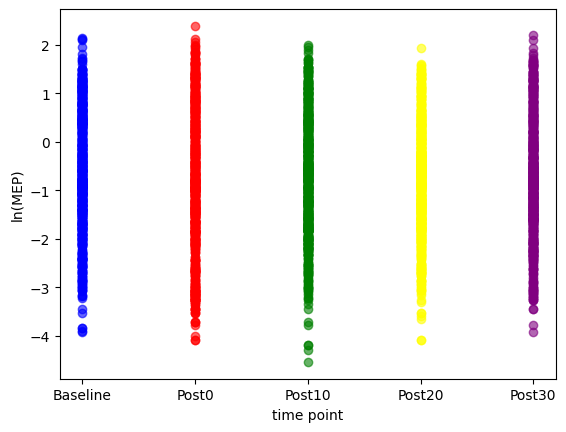

In [ ]:
#plot the MEP at different time points
num_sub = np.zeros((5))
num_sub[0] = np.size(lnmep_baseline)
num_sub[1] = np.size(lnmep_P0)
num_sub[2] = np.size(lnmep_P10)
num_sub[3] = np.size(lnmep_P20)
num_sub[4] = np.size(lnmep_P30)

x_positions = np.array([1, 2, 3, 4, 5])
x_labels = ['Baseline', 'Post0', 'Post10', 'Post20', 'Post30']
plt.scatter(np.repeat(x_positions[0], num_sub[0]), lnmep_baseline, color='blue', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[1], num_sub[1]), lnmep_P0, color='red', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[2], num_sub[2]), lnmep_P10, color='green', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[3], num_sub[3]), lnmep_P20, color='yellow', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[4], num_sub[4]), lnmep_P30, color='purple', label='Baseline', alpha=0.6)
plt.rcParams['figure.dpi'] = 200
plt.xticks(x_positions, x_labels)
plt.xlabel('time point')
plt.ylabel('ln(MEP)')

In [ ]:
df2.head()

Subj_ID      Time Trial rMT MSO aMT         %rMT       MEP         lnMEP
0  BME-01  Baseline     1  61  68  72  111.4754098  3.747559   1.321104695
1  BME-01  Baseline     2  61  68  72  111.4754098  2.542114  0.9329960183
2  BME-01  Baseline     3  61  68  72  111.4754098  1.979065   0.682624511
3  BME-01  Baseline     4  61  68  72  111.4754098  1.550293  0.4384439453
4  BME-01  Baseline     5  61  68  72  111.4754098   1.40686  0.3413602707

In [ ]:
df2.tail()

Subj_ID    Time Trial rMT MSO aMT %rMT           MEP          lnMEP
3856  BME-29  Post30    26  48  53  54  110  0.5828857422  -0.5397640944
3857  BME-29  Post30    27  48  53  54  110   1.106262207   0.1009869519
3858  BME-29  Post30    28  48  53  54  110  0.8666992188  -0.1430632842
3859  BME-29  Post30    29  48  53  54  110  0.6301879883    -0.46173711
3860  BME-29  Post30    30  48  53  54  110   1.573181152    0.453099781

In [ ]:
import seaborn as sns

<Axes: xlabel='Time', ylabel='lnMEP'>

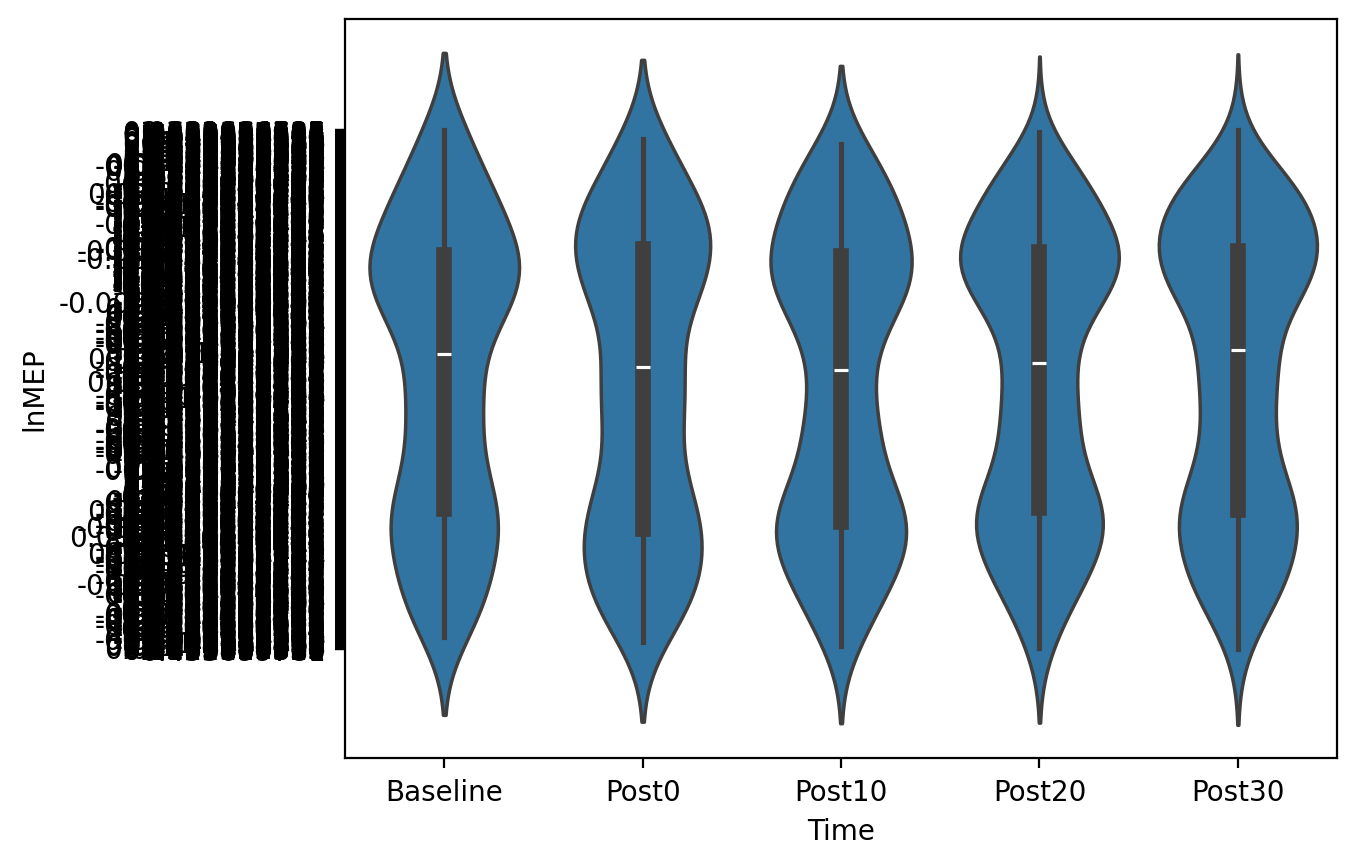

In [ ]:
#SNS plot
sns.violinplot(data=df2,x='Time',y='lnMEP')

In [ ]:
df_comb = pd.merge(df2, df,how='outer')

In [ ]:
df_comb.tail()
#use this for split violinplot by biomarker

Subj_ID Time Trial  rMT  MSO  aMT %rMT  MEP lnMEP RMT  ...  \
3877   BME24  NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  62  ...   
3878   BME25  NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  53  ...   
3879   BME27  NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  71  ...   
3880   BME28  NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  48  ...   
3881   BME29  NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN  46  ...   

                  k              b          RMSE          SE_L        SE_x0  \
3877   0.1911965161   0.4556252601    1.38400271  0.4424319416  2.069428044   
3878  0.09641808277  0.02045112823    1.05842581  0.7232682251  2.852685899   
3879   0.2352499304   0.1744202394  0.5464966631  0.1389019764  1.385224375   
3880   0.1447417775   0.3612949282     0.6059578      4.15E-01     3.93E+00   
3881   0.1548145949   0.1734009403   1.475470609   0.539008209  1.192616602   

               SE_k           SE_b    MEDIAN of raw_MEP at 130% RMT +/- 3%  \
3877  0.05685538583   0.3720446273  1                          5.670928955   
3878  0.02810038367    0.323624766  1                          3.692626953   
3879  0.07711989975  0.09984320786  1                          2.372741699   
3880       5.71E-02       1.03E-01  2                          1.019287109   
3881  0.02694149902   0.2938044535  1                          7.639312744   

     STDEV of raw_MEP at 130% RMT +/- 3%  
3877                        0.6015315146  
3878                         1.159086126  
3879                        0.4674660352  
3880                        0.3376727461  
3881                         1.257338426  

[5 rows x 24 columns]

<Axes: xlabel='Time', ylabel='lnMEP'>

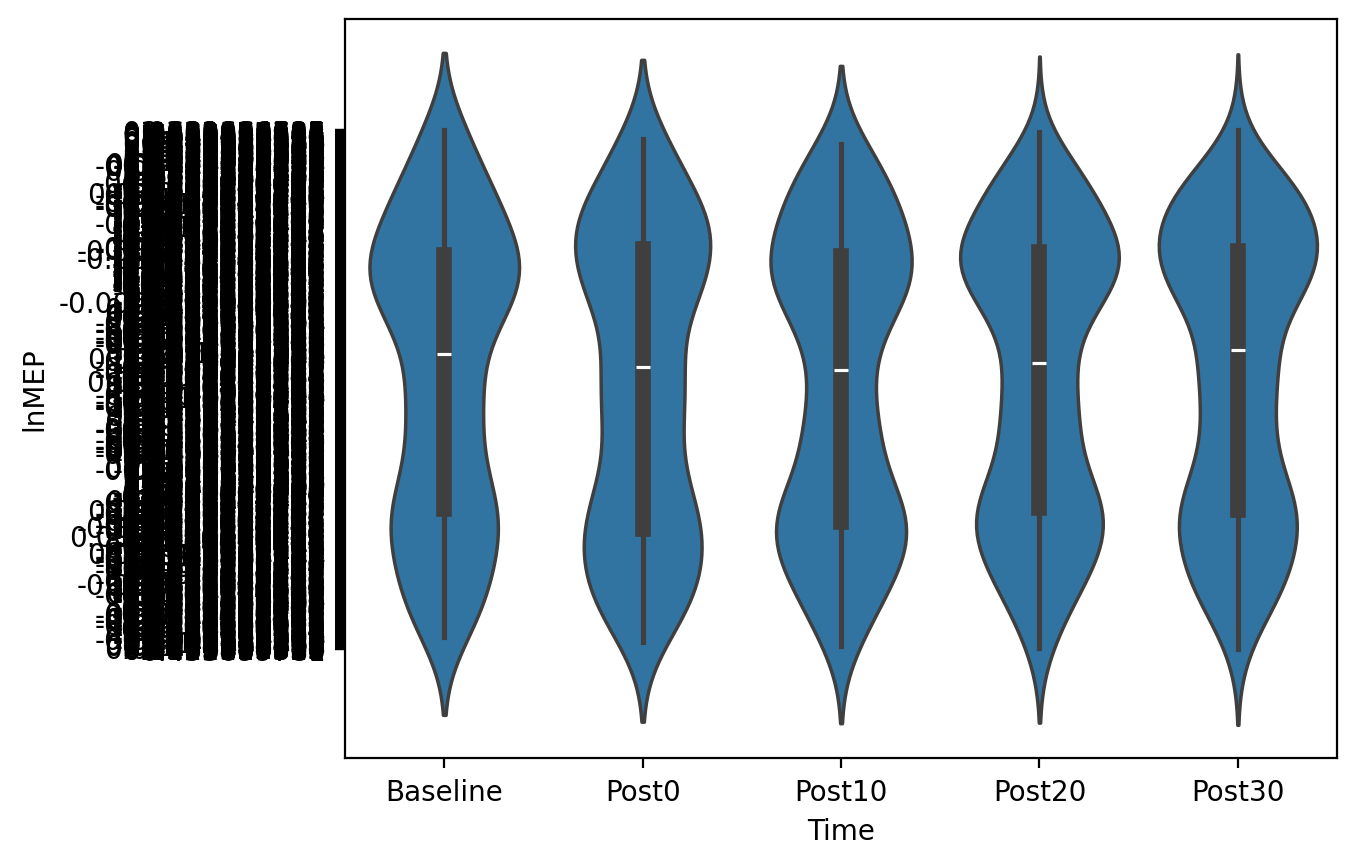

In [ ]:
sns.violinplot(data=df2,x='Time',y='lnMEP')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.5% of the points cannot be plac

Text(0.5, 1.0, 'lnMEP value to different time point')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.7% of the points cannot be plac

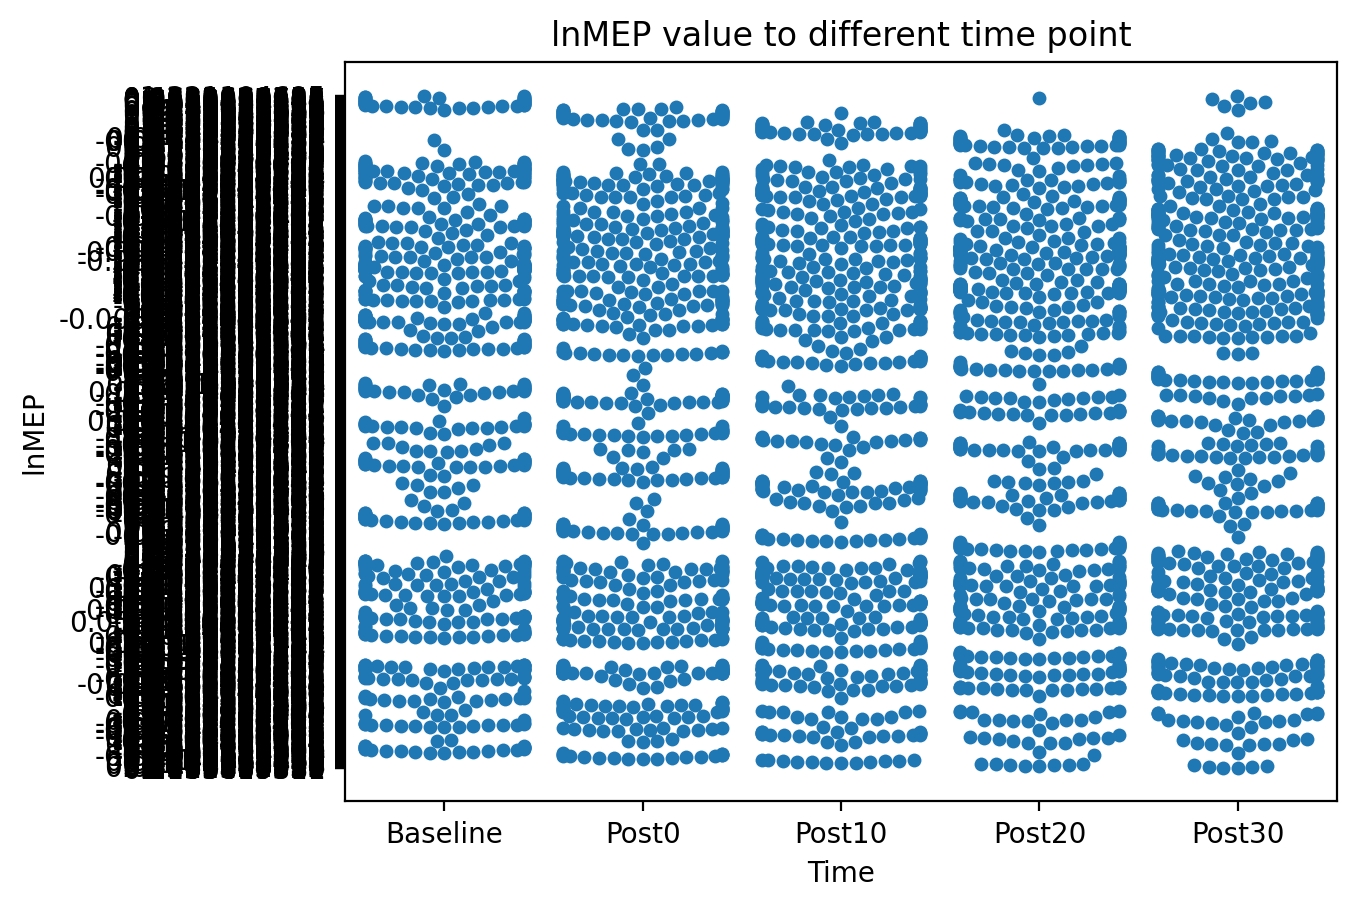

In [ ]:
sns.swarmplot(data=df2,x='Time',y='lnMEP')
plt.title('lnMEP value to different time point')

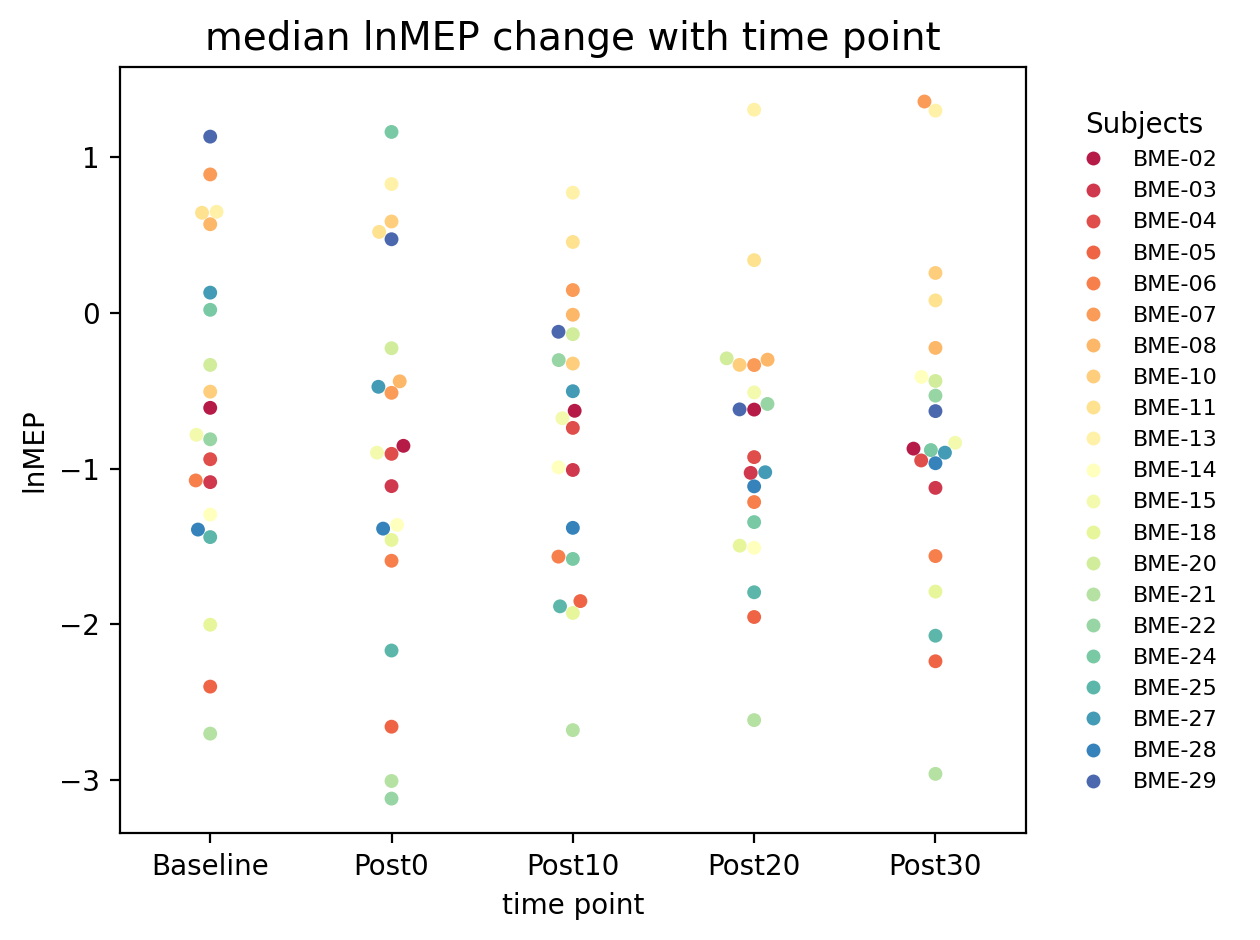

In [ ]:
#median MEP change at different time points
import seaborn as sns
category = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
label = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
#figure plot
plt.figure()
sns.swarmplot( data=df4, x='time_point',y='lnMEP',hue=category, palette="Spectral")
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Subjects',
    fontsize=8,
    borderpad=1,
    borderaxespad=1,
    frameon=False
)



plt.title("median lnMEP change with time point", fontsize=14)
plt.xlabel("time point")
plt.ylabel("lnMEP")
plt.tight_layout()


plt.show()

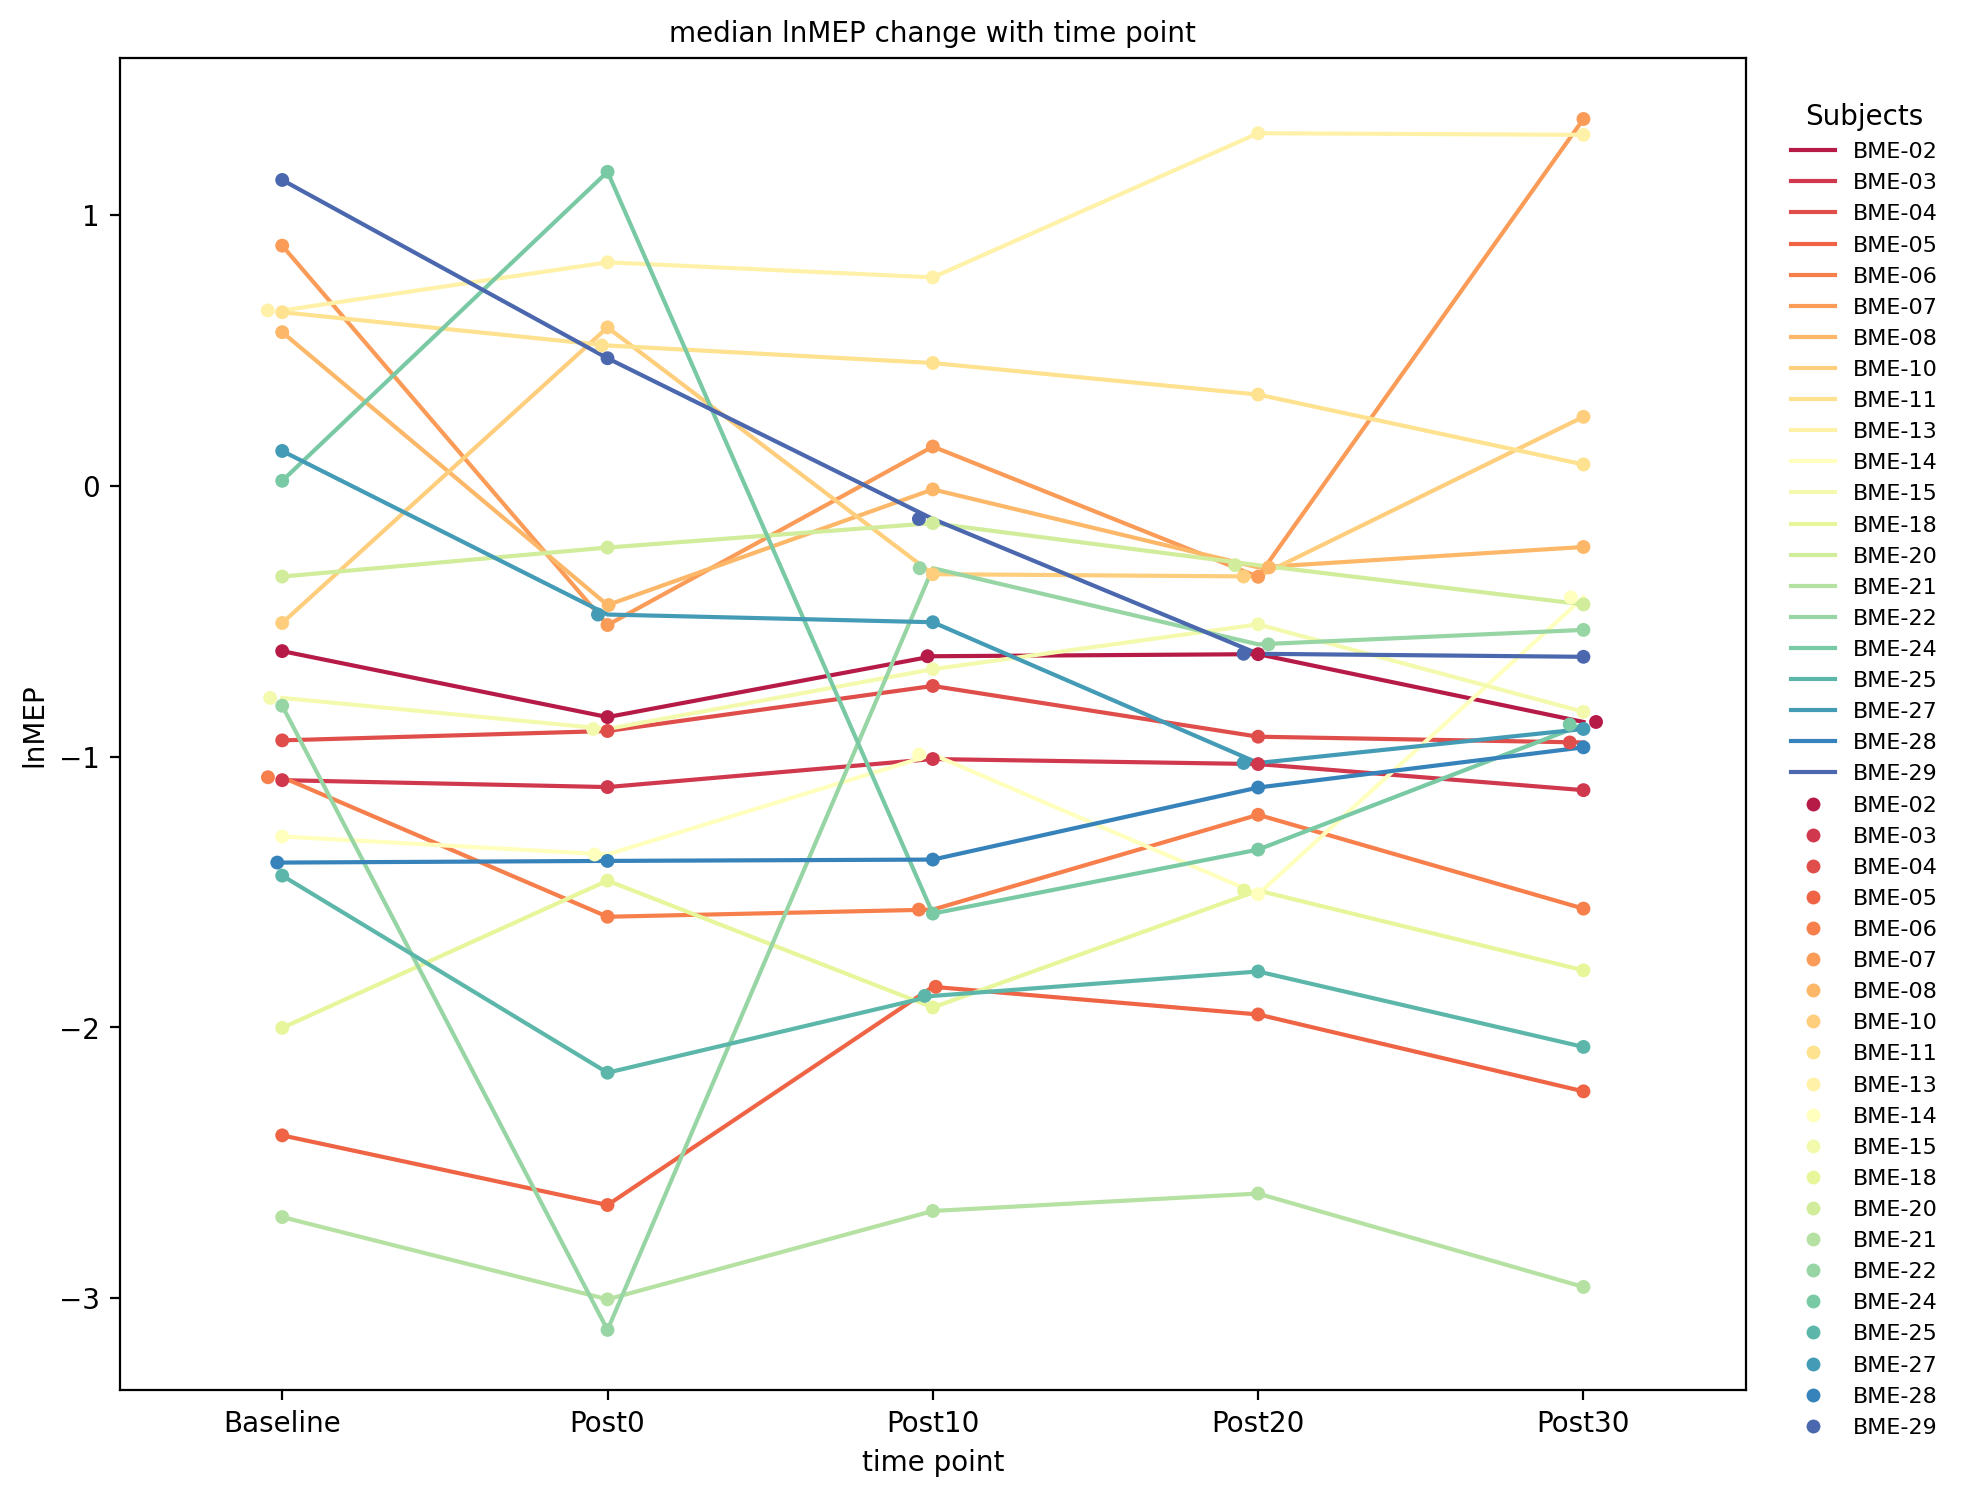

In [ ]:
#median lnMEP change distribution
import seaborn as sns
category = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
label = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
plt.figure(figsize=(10, 8))
sns.lineplot( data=df4, x='time_point',y='lnMEP',hue=category, palette="Spectral")
sns.swarmplot( data=df4, x='time_point',y='lnMEP',hue=category, palette="Spectral")
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Subjects',
    fontsize=8,
    borderpad=1,
    borderaxespad=1,
    frameon=False
)



plt.title("median lnMEP change with time point", fontsize=10)
plt.xlabel("time point")
plt.ylabel("lnMEP")
plt.tight_layout()


plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


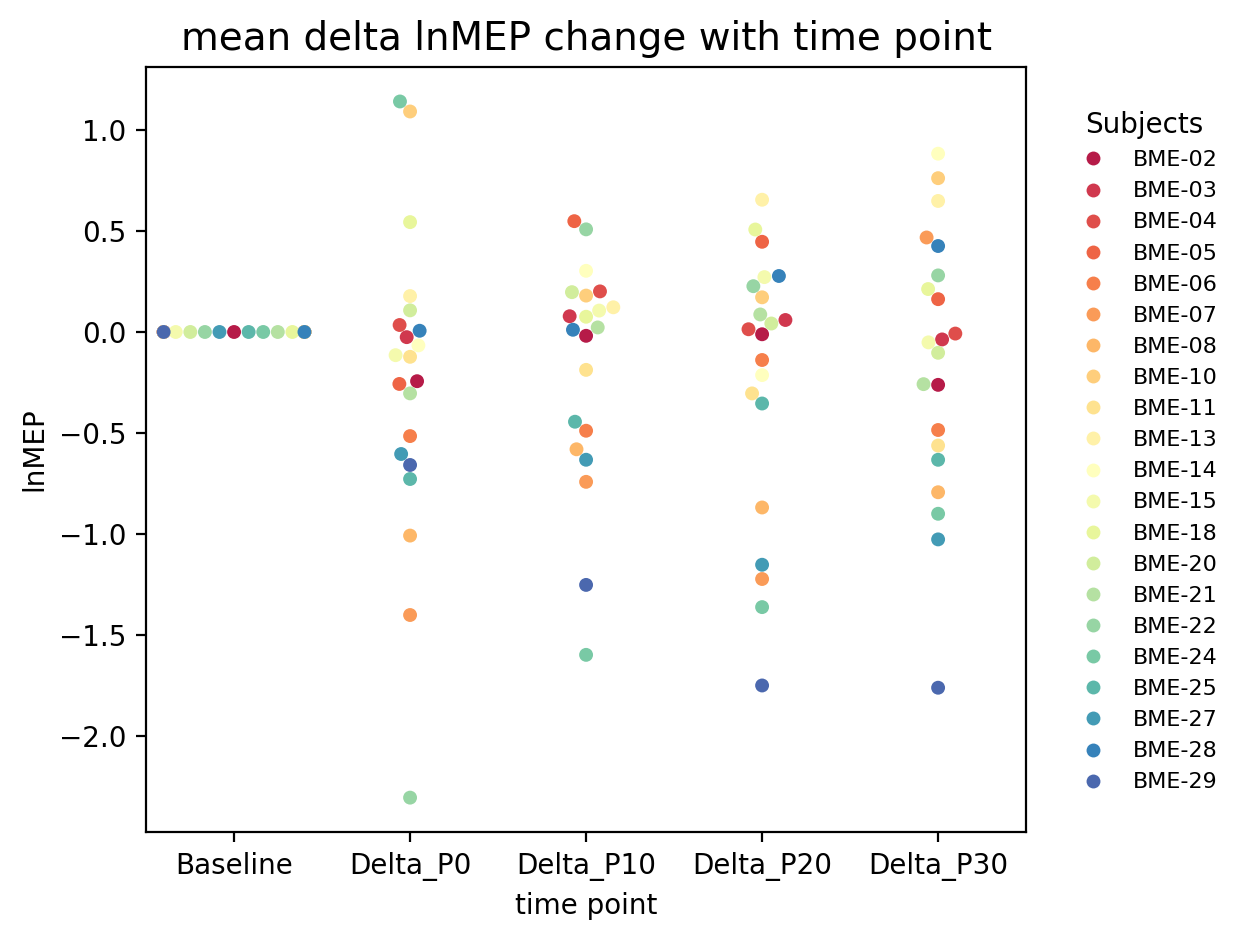

In [ ]:
#lnMEP change with time
#category = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U']
category = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])
label = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
sns.swarmplot(data=df3,x='time_point',y='lnMEP',hue=category, palette="Spectral")
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Subjects',
    fontsize=8,
    borderpad=1,
    borderaxespad=1,
    frameon=False
)

plt.title("mean delta lnMEP change with time point", fontsize=14)
plt.xlabel("time point")
plt.ylabel("lnMEP")


plt.tight_layout()


plt.show()


#mean delta lnMEP

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


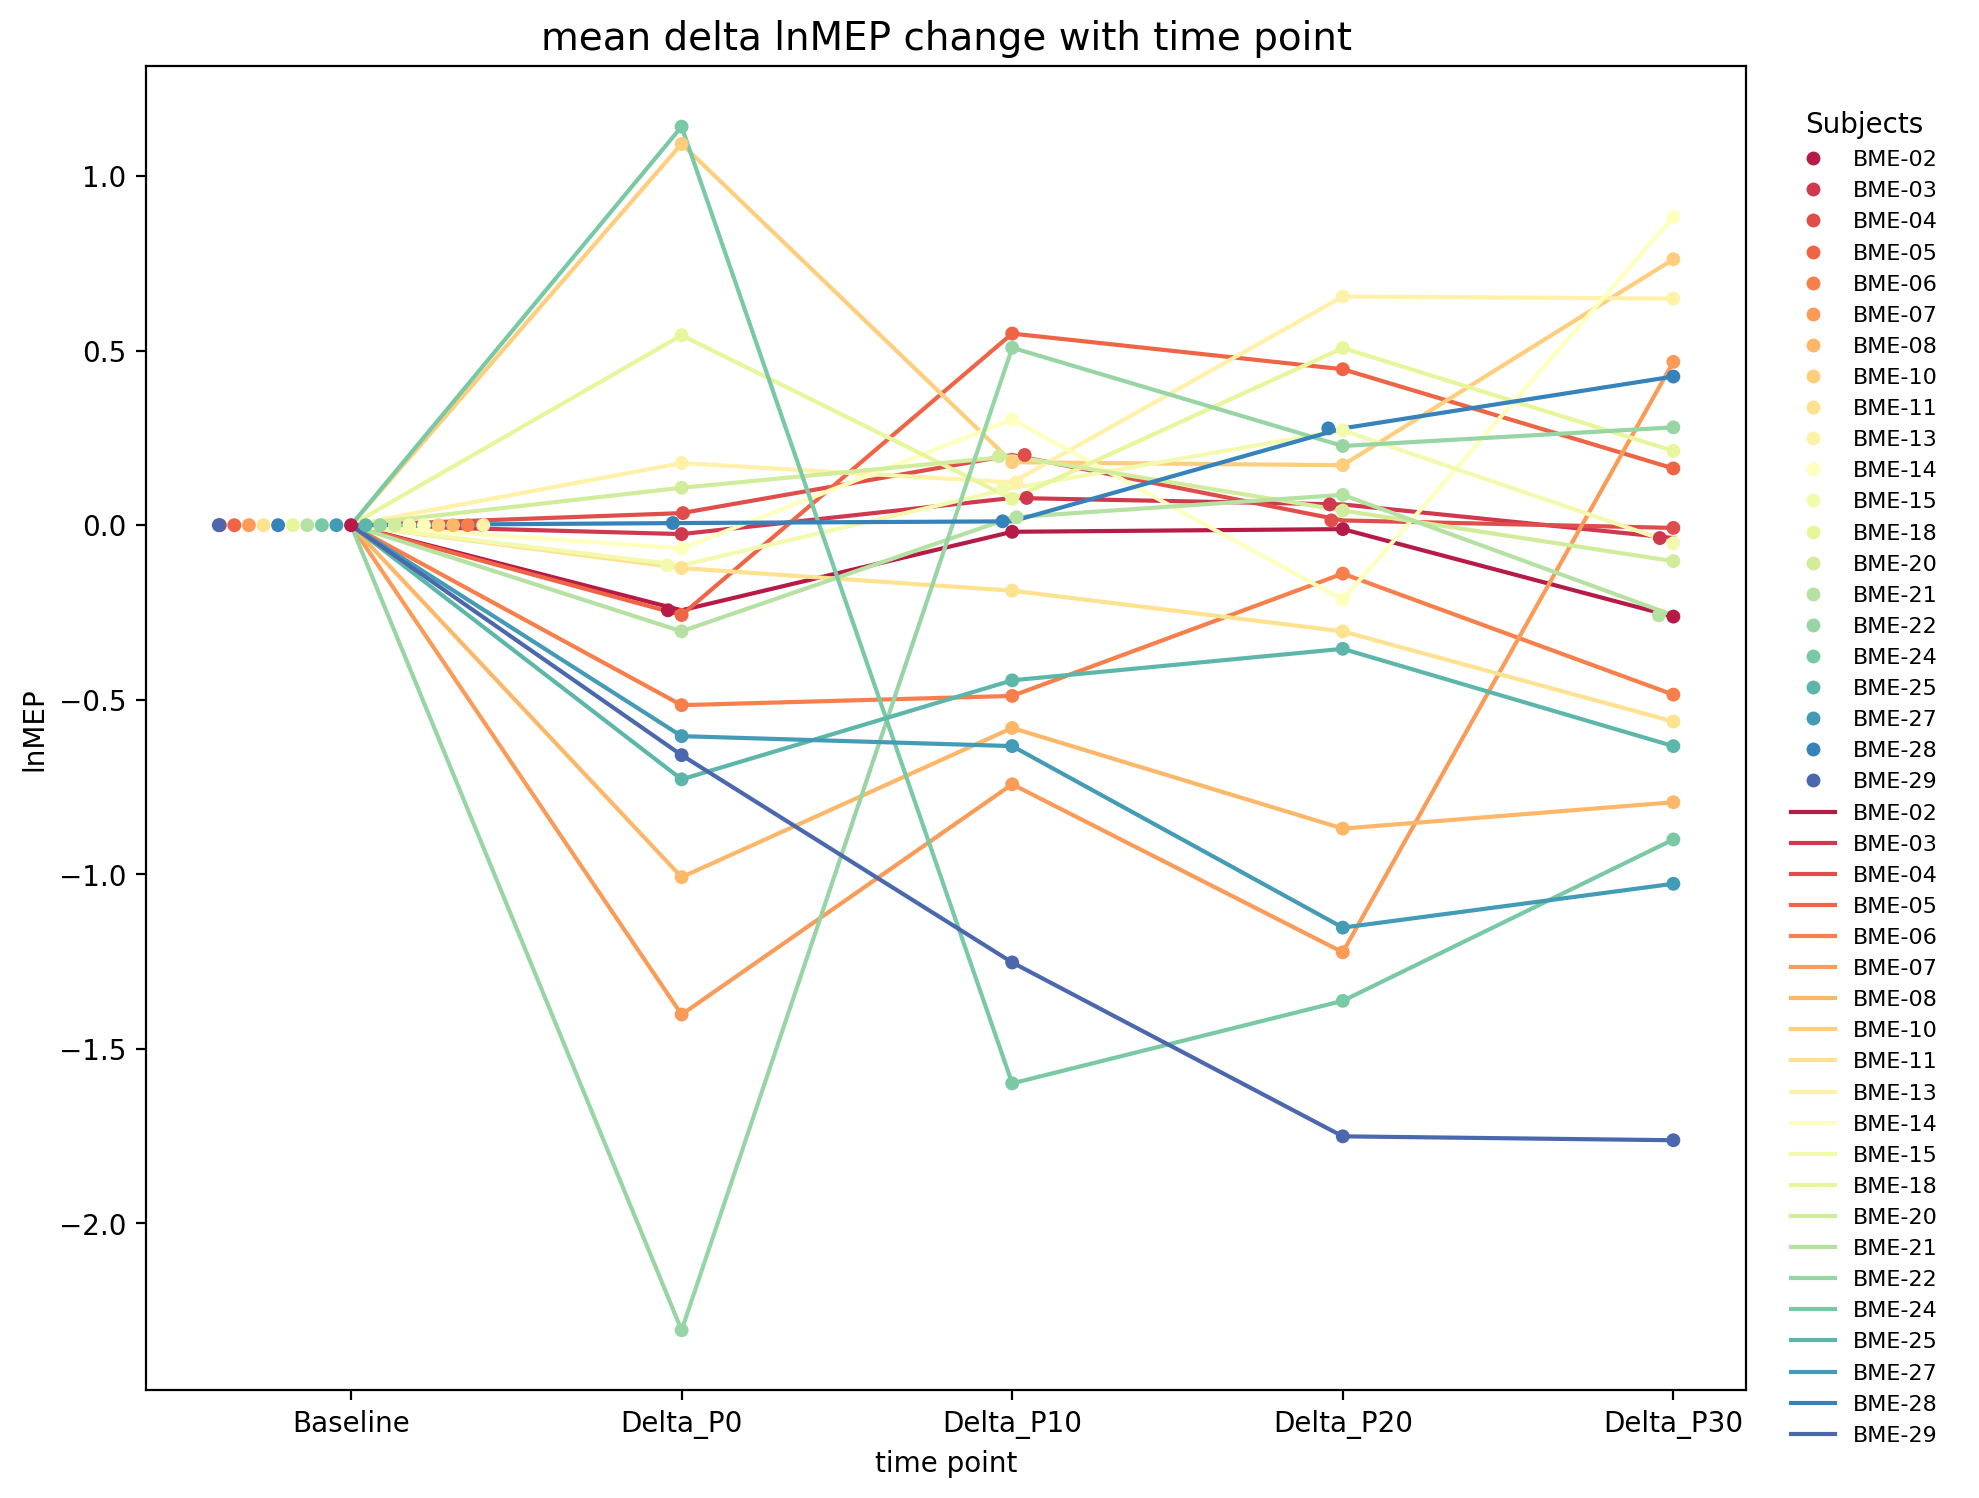

In [ ]:
#category = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U']
category = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])
label = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
plt.figure(figsize = (10,8))
sns.swarmplot(data=df3,x='time_point',y='lnMEP',hue=category, palette="Spectral")
sns.lineplot(data=df3,x='time_point',y='lnMEP',hue=category, palette="Spectral")
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='Subjects',
    fontsize=8,
    borderpad=1,
    borderaxespad=1,
    frameon=False
)

plt.title("mean delta lnMEP change with time point", fontsize=14)
plt.xlabel("time point")
plt.ylabel("lnMEP")


plt.tight_layout()


plt.show()

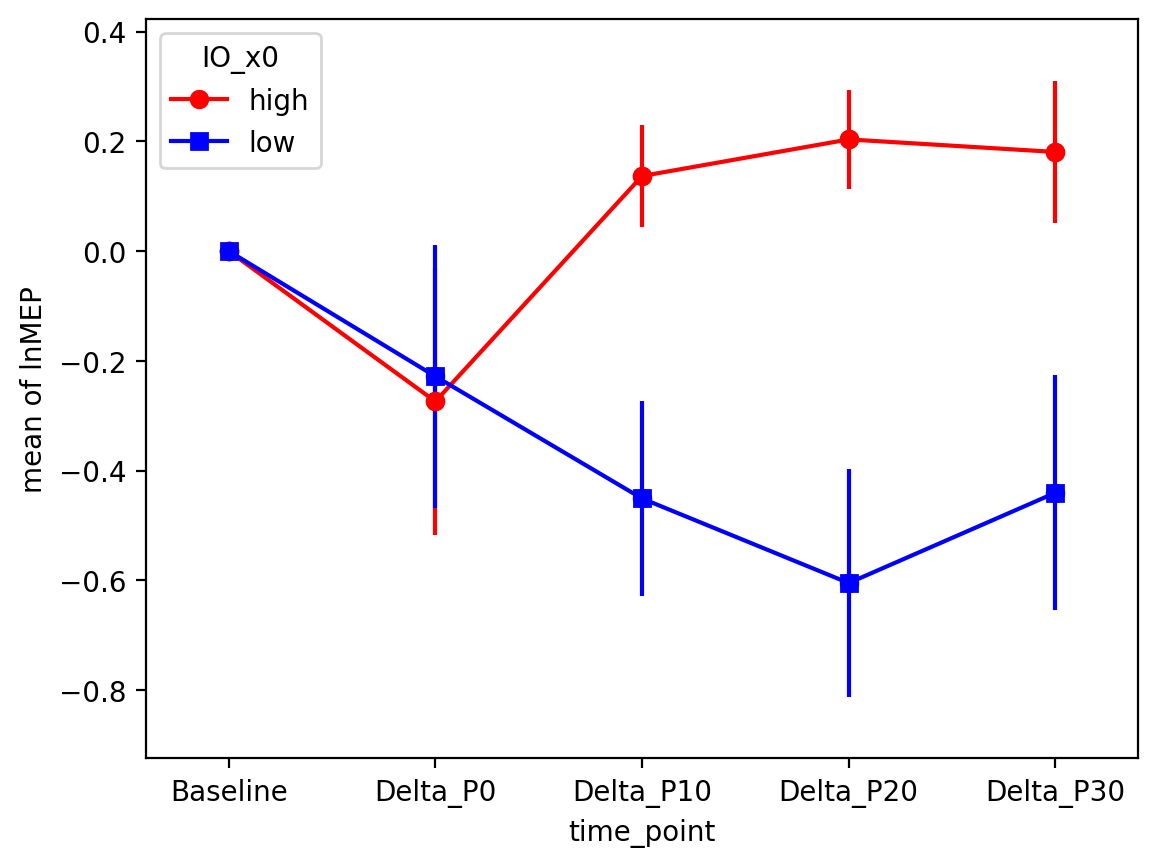

In [ ]:
#interaction plot of mean lnMEP to different time points for x0
from statsmodels.graphics.factorplots import interaction_plot
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])


# Calculate means and standard errors for each combination of factors
means = df3.groupby(['time_point', 'IO_x0'])['lnMEP'].mean().unstack()
errors = df3.groupby(['time_point', 'IO_x0'])['lnMEP'].sem().unstack()  # SEM: Standard Error of the Mean

fig, ax = plt.subplots()
interaction_plot(df3['time_point'], df3['IO_x0'], df3['lnMEP'],ax=ax, markers=['o', 's'], colors=['red', 'blue'])
x_values = [0, 1,2,3,4]  # Corresponding to Factor1 levels 'A' and 'B'
for i, factor2_level in enumerate(errors.columns):
    ax.errorbar(x_values, means[factor2_level], yerr=errors[factor2_level], fmt='o', label=factor2_level, color=['red', 'blue'][i])
plt.show()



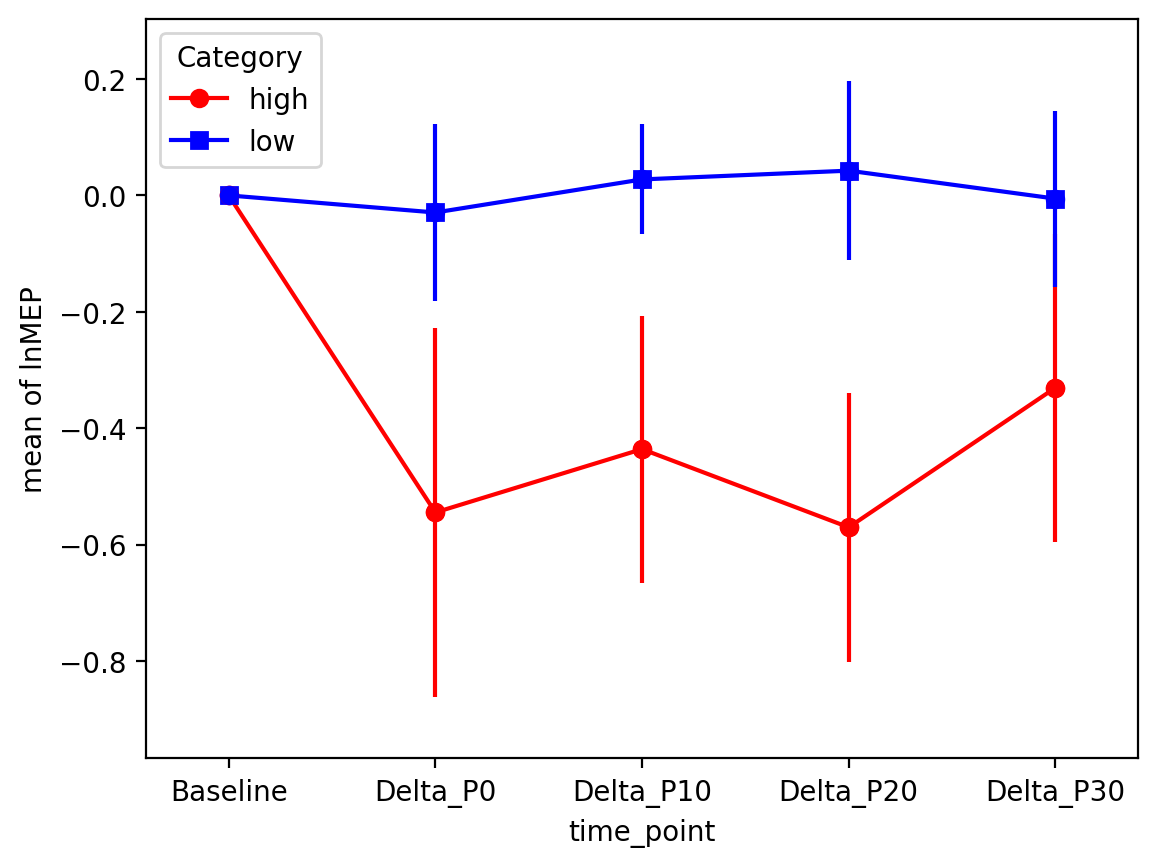

In [ ]:
#interaction plot of mean lnMEP to different time points for L
from statsmodels.graphics.factorplots import interaction_plot
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])


# Calculate means and standard errors for each combination of factors
means = df3.groupby(['time_point', 'IO_L'])['lnMEP'].mean().unstack()
errors = df3.groupby(['time_point', 'IO_L'])['lnMEP'].sem().unstack()  # SEM: Standard Error of the Mean

fig, ax = plt.subplots()
interaction_plot(df3['time_point'], df3['IO_L'], df3['lnMEP'],ax=ax, markers=['o', 's'], colors=['red', 'blue'])

x_values = [0, 1,2,3,4]  # Corresponding to Factor1 levels 'A' and 'B'
for i, factor2_level in enumerate(errors.columns):
    ax.errorbar(x_values, means[factor2_level], yerr=errors[factor2_level], fmt='o', label=factor2_level, color=['red', 'blue'][i])
plt.show()


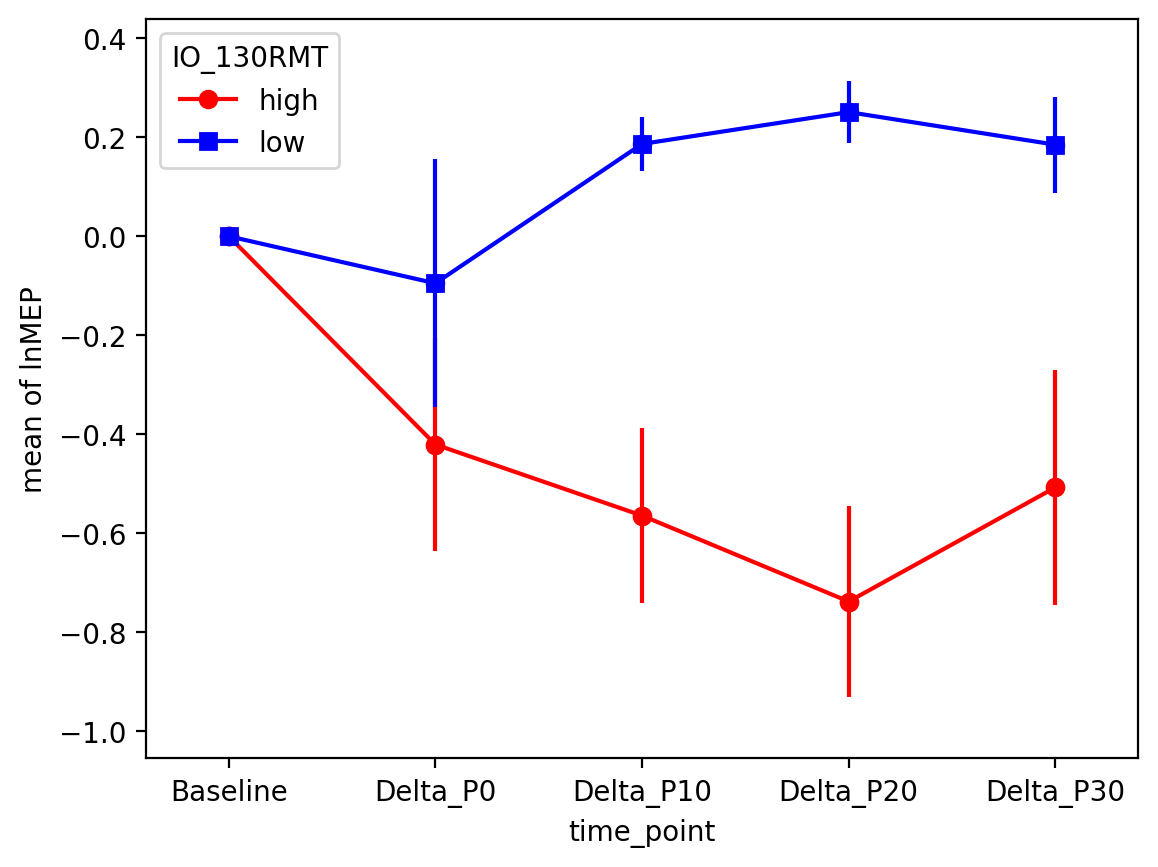

In [ ]:
#interaction plot of mean lnMEP to different time points for 130RMT
from statsmodels.graphics.factorplots import interaction_plot
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])


# Calculate means and standard errors for each combination of factors
means = df3.groupby(['time_point', 'IO_130RMT'])['lnMEP'].mean().unstack()
errors = df3.groupby(['time_point', 'IO_130RMT'])['lnMEP'].sem().unstack()  # SEM: Standard Error of the Mean

fig, ax = plt.subplots()
interaction_plot(df3['time_point'], df3['IO_130RMT'], df3['lnMEP'],ax=ax, markers=['o', 's'], colors=['red', 'blue'])
x_values = [0, 1,2,3,4]  # Corresponding to Factor1 levels 'A' and 'B'
for i, factor2_level in enumerate(errors.columns):
    ax.errorbar(x_values, means[factor2_level], yerr=errors[factor2_level], fmt='o', label=factor2_level, color=['red', 'blue'][i])
plt.show()


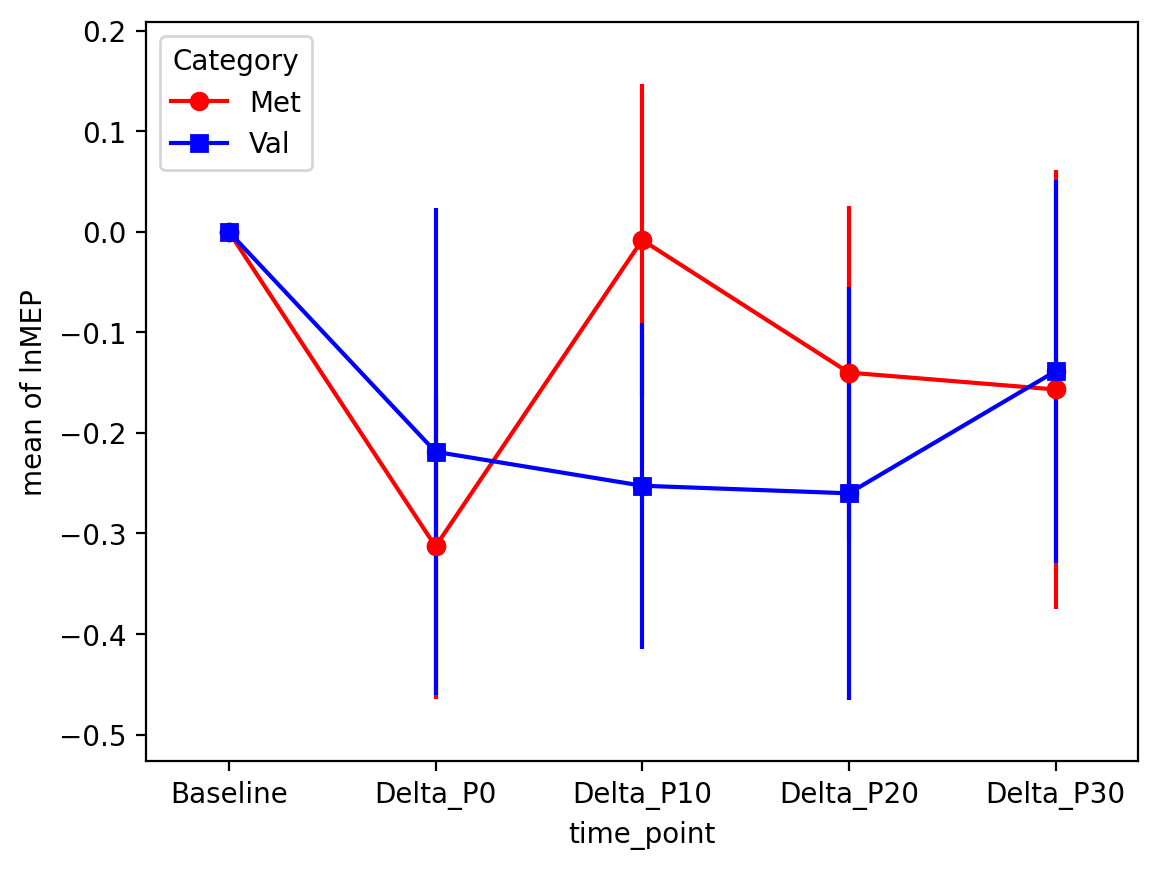

In [ ]:
#interaction plot of mean lnMEP to different time points for BDNF
from statsmodels.graphics.factorplots import interaction_plot
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])


# Calculate means and standard errors for each combination of factors
means = df3.groupby(['time_point', 'BDNF'])['lnMEP'].mean().unstack()
errors = df3.groupby(['time_point', 'BDNF'])['lnMEP'].sem().unstack()  # SEM: Standard Error of the Mean

fig, ax = plt.subplots()
interaction_plot(df3['time_point'], df3['BDNF'], df3['lnMEP'],ax=ax, markers=['o', 's'], colors=['red', 'blue'])
plt.legend(
    title="Category",
    loc="upper left",

)
x_values = [0, 1,2,3,4]  # Corresponding to Factor1 levels 'A' and 'B'
for i, factor2_level in enumerate(errors.columns):
    ax.errorbar(x_values, means[factor2_level], yerr=errors[factor2_level], fmt='o', label=factor2_level, color=['red', 'blue'][i])
plt.show()

In [ ]:
#one-way anova for raw median of lnMEP to IO_x0，IO_L,IO_130RMT and time_point
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ time_point'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('one-way anova for raw median of lnMEP to time_point')
print(aov_table)



one-way anova for raw median of lnMEP to time_point
               df      sum_sq   mean_sq         F    PR(>F)
time_point    4.0    0.790668  0.197667  0.190267  0.942983
Residual    100.0  103.889436  1.038894       NaN       NaN


In [ ]:
#one-way anova for raw median of lnMEP to IO_x0，IO_L,IO_130RMT and time_point
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ IO_x0'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('one-way anova for raw median of lnMEP to IO_x0')
print(aov_table)


one-way anova for raw median of lnMEP to IO_x0
             df     sum_sq   mean_sq         F    PR(>F)
IO_x0       1.0   4.773414  4.773414  4.921208  0.028724
Residual  103.0  99.906691  0.969968       NaN       NaN


In [ ]:
#one-way anova for raw median of lnMEP to IO_x0，IO_L,IO_130RMT and time_point
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ IO_L'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('one-way anova for raw median of lnMEP to IO_L')
print(aov_table)


one-way anova for raw median of lnMEP to IO_L
             df      sum_sq   mean_sq         F    PR(>F)
IO_L        1.0    1.395511  1.395511  1.391665  0.240842
Residual  103.0  103.284594  1.002763       NaN       NaN


In [ ]:
#one-way anova for raw median of lnMEP to IO_x0，IO_L,IO_130RMT and time_point
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ IO_130RMT'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('one-way anova for raw median of lnMEP to IO_130RMT')
print(aov_table)


one-way anova for raw median of lnMEP to IO_130RMT
              df     sum_sq   mean_sq         F    PR(>F)
IO_130RMT    1.0   5.612755  5.612755  5.835563  0.017466
Residual   103.0  99.067349  0.961819       NaN       NaN


In [ ]:
#two-way anova for raw median of lnMEP to IO_x0
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ time_point + IO_x0 + time_point:IO_x0'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for raw median of lnMEP to IO_x0')
print(aov_table)

two-way anova for raw median of lnMEP to IO_x0
                    df     sum_sq   mean_sq         F    PR(>F)
time_point         4.0   0.790668  0.197667  0.195765  0.940048
IO_x0              1.0   4.773414  4.773414  4.727493  0.032168
time_point:IO_x0   4.0   3.193226  0.798306  0.790627  0.534106
Residual          95.0  95.922796  1.009714       NaN       NaN


In [ ]:
#two-way anova for raw median of lnMEP to IO_L
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ time_point + IO_L + time_point:IO_x0'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for raw median of lnMEP to IO_L')
print(aov_table)

two-way anova for raw median of lnMEP to IO_L
                    df     sum_sq   mean_sq         F    PR(>F)
time_point         4.0   0.790668  0.197667  0.196012  0.939909
IO_L               1.0   1.395511  1.395511  1.383828  0.242421
time_point:IO_x0   5.0   7.700372  1.540074  1.527182  0.188792
Residual          94.0  94.793553  1.008442       NaN       NaN


In [ ]:
#two-way anova for lnMEP of Baseline to IO_130RMT
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df4['lnMEP'] = pd.to_numeric(df4['lnMEP'])
formula = 'lnMEP ~ time_point + IO_130RMT + time_point:IO_130RMT'
model = ols(formula, df4).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for lnMEP of Baseline to IO_130RMT')
print(aov_table)

two-way anova for lnMEP of Baseline to IO_130RMT
                        df     sum_sq   mean_sq         F    PR(>F)
time_point             4.0   0.790668  0.197667  0.197453  0.939147
IO_130RMT              1.0   5.612755  5.612755  5.606663  0.019919
time_point:IO_130RMT   4.0   3.173446  0.793361  0.792500  0.532910
Residual              95.0  95.103235  1.001087       NaN       NaN


In [ ]:
#two-way anova for ln(delta time point) to IO_x0
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])
formula = 'lnMEP ~ time_point + IO_x0 + time_point:IO_x0'
model = ols(formula, df3).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for ln(delta time point) to IO_x0')
print(aov_table)

two-way anova for ln(delta time point) to IO_x0
                    df     sum_sq   mean_sq          F    PR(>F)
time_point         4.0   0.790668  0.197667   0.671673  0.613231
IO_x0              1.0   4.073333  4.073333  13.841180  0.000337
time_point:IO_x0   4.0   3.193226  0.798306   2.712645  0.034476
Residual          95.0  27.957630  0.294291        NaN       NaN


In [ ]:
#two-way anova for ln(delta time point) to IO_L
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])
formula = 'lnMEP ~ time_point + IO_L + time_point:IO_L'
model = ols(formula, df3).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for ln(delta time point) to IO_L')
print(aov_table)

two-way anova for ln(delta time point) to IO_L
                   df     sum_sq   mean_sq          F    PR(>F)
time_point        4.0   0.790668  0.197667   0.620091  0.649276
IO_L              1.0   3.775079  3.775079  11.842603  0.000862
time_point:IO_L   4.0   1.165861  0.291465   0.914341  0.458954
Residual         95.0  30.283249  0.318771        NaN       NaN


In [ ]:
#two-way anova for ln(delta time point) to IO_130RMT
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
df3['lnMEP'] = pd.to_numeric(df3['lnMEP'])
formula = 'lnMEP ~ time_point + IO_130RMT + time_point:IO_130RMT'
model = ols(formula, df3).fit()
aov_table = sm.stats.anova_lm(model,type=1)
print('two-way anova for ln(delta time point) to IO_130RMT')
print(aov_table)

two-way anova for ln(delta time point) to IO_130RMT
                        df     sum_sq   mean_sq          F        PR(>F)
time_point             4.0   0.790668  0.197667   0.779672  5.411275e-01
IO_130RMT              1.0   7.965781  7.965781  31.419986  2.028756e-07
time_point:IO_130RMT   4.0   3.173446  0.793361   3.129311  1.826302e-02
Residual              95.0  24.084962  0.253526        NaN           NaN


<ipython-input-108-a59af055fbb9>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().remove()
<ipython-input-108-a59af055fbb9>:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()
<ipython-input-108-a59af055fbb9>:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend().remove()


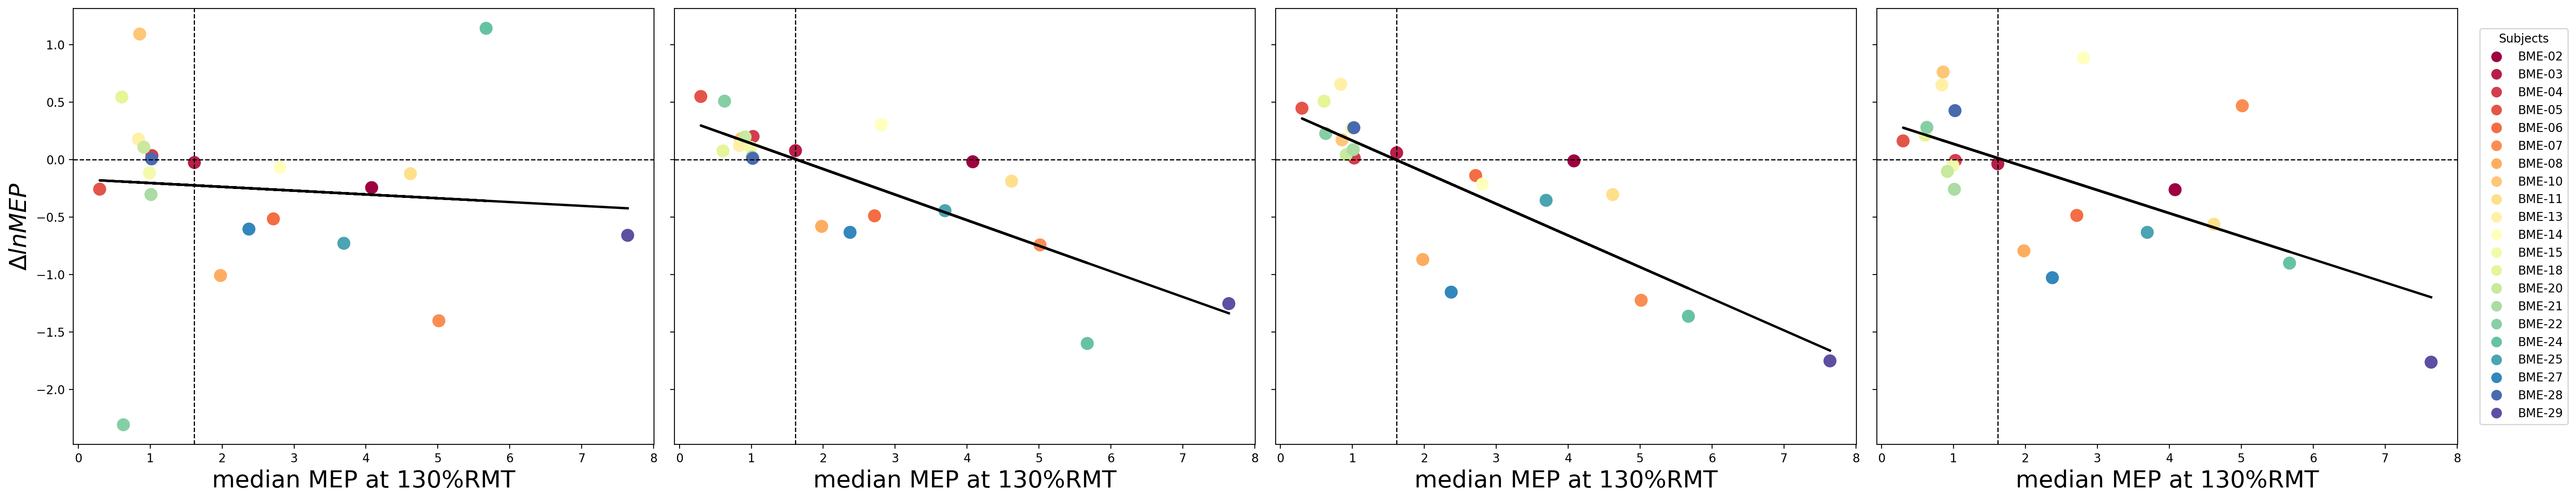

In [ ]:
#plot the change of median MEP at 130%RMT with different time point
import matplotlib.pyplot as plt
import numpy as np

diabetes = datasets.load_diabetes()
labels = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']

# for subject P0
x1 = median_mep.reshape(-1,1)
y1 = P0.reshape(-1,1)
reg = LinearRegression().fit(x1, y1)
reg.score(x1, y1)
X2 = sm.add_constant(x1)
est = sm.OLS(y1, X2)
est2 = est.fit()
y_predict1 = reg.predict(x1)

# for subject P10
x2 = x1
y2 = P10.reshape(-1,1)
reg = LinearRegression().fit(x2, y2)
reg.score(x2, y2)
X2 = sm.add_constant(x2)
est = sm.OLS(y2, X2)
est2 = est.fit()
y_predict2 = reg.predict(x2)

x3 = x1
y3 = P20.reshape(-1,1)
reg = LinearRegression().fit(x3, y3)
reg.score(x3, y3)
X3 = sm.add_constant(x3)
est = sm.OLS(y3, X3)
est2 = est.fit()
y_predict3 = reg.predict(x3)

x4 = x1
y4 = P30.reshape(-1,1)
reg = LinearRegression().fit(x4, y4)
reg.score(x4, y4)
X4 = sm.add_constant(x4)
est = sm.OLS(y4, X4)
est2 = est.fit()
y_predict4 = reg.predict(x4)


fig, axes = plt.subplots(1, 4, figsize=(30, 6), sharey=True)

# for P0
axes[0].plot(x1,y_predict1,color='black',linewidth=2)
axes[0].set_xlabel("median MEP at 130%RMT",fontsize=20)
axes[0].set_ylabel(r"$\Delta lnMEP$",fontsize=20)
median = np.median(x1)
axes[0].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[0].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[0].scatter(x1, y1, c=colors, s=100)
axes[0].legend().remove()



# for P10
axes[1].plot(x2, y_predict2,color='black',linewidth=2)
axes[1].set_xlabel("median MEP at 130%RMT",fontsize=20)
axes[1].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[1].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[1].scatter(x2, y2, c=colors, s=100)
axes[1].legend().remove()



# for P20
axes[2].plot(x3, y_predict3,color='black',linewidth=2)
axes[2].set_xlabel("median MEP at 130%RMT",fontsize=20)
axes[2].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[2].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[2].scatter(x3, y3, c=colors, s=100)
axes[2].legend().remove()


# for P30
axes[3].plot(x4, y_predict4,color='black',linewidth=2)
axes[3].set_xlabel("median MEP at 130%RMT",fontsize=20)
axes[3].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[3].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[3].scatter(x4, y4, c=colors, s=100)

legend_elements = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
axes[3].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 0.5), title="Subjects")

# modify the figure
plt.tight_layout()
plt.show()


R-squared: 0.00760207956076131
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.1455
Date:                Sun, 26 Jan 2025   Prob (F-statistic):              0.707
Time:                        21:46:43   Log-Likelihood:                -23.544
No. Observations:                  21   AIC:                             51.09
Df Residuals:                      19   BIC:                             53.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1708

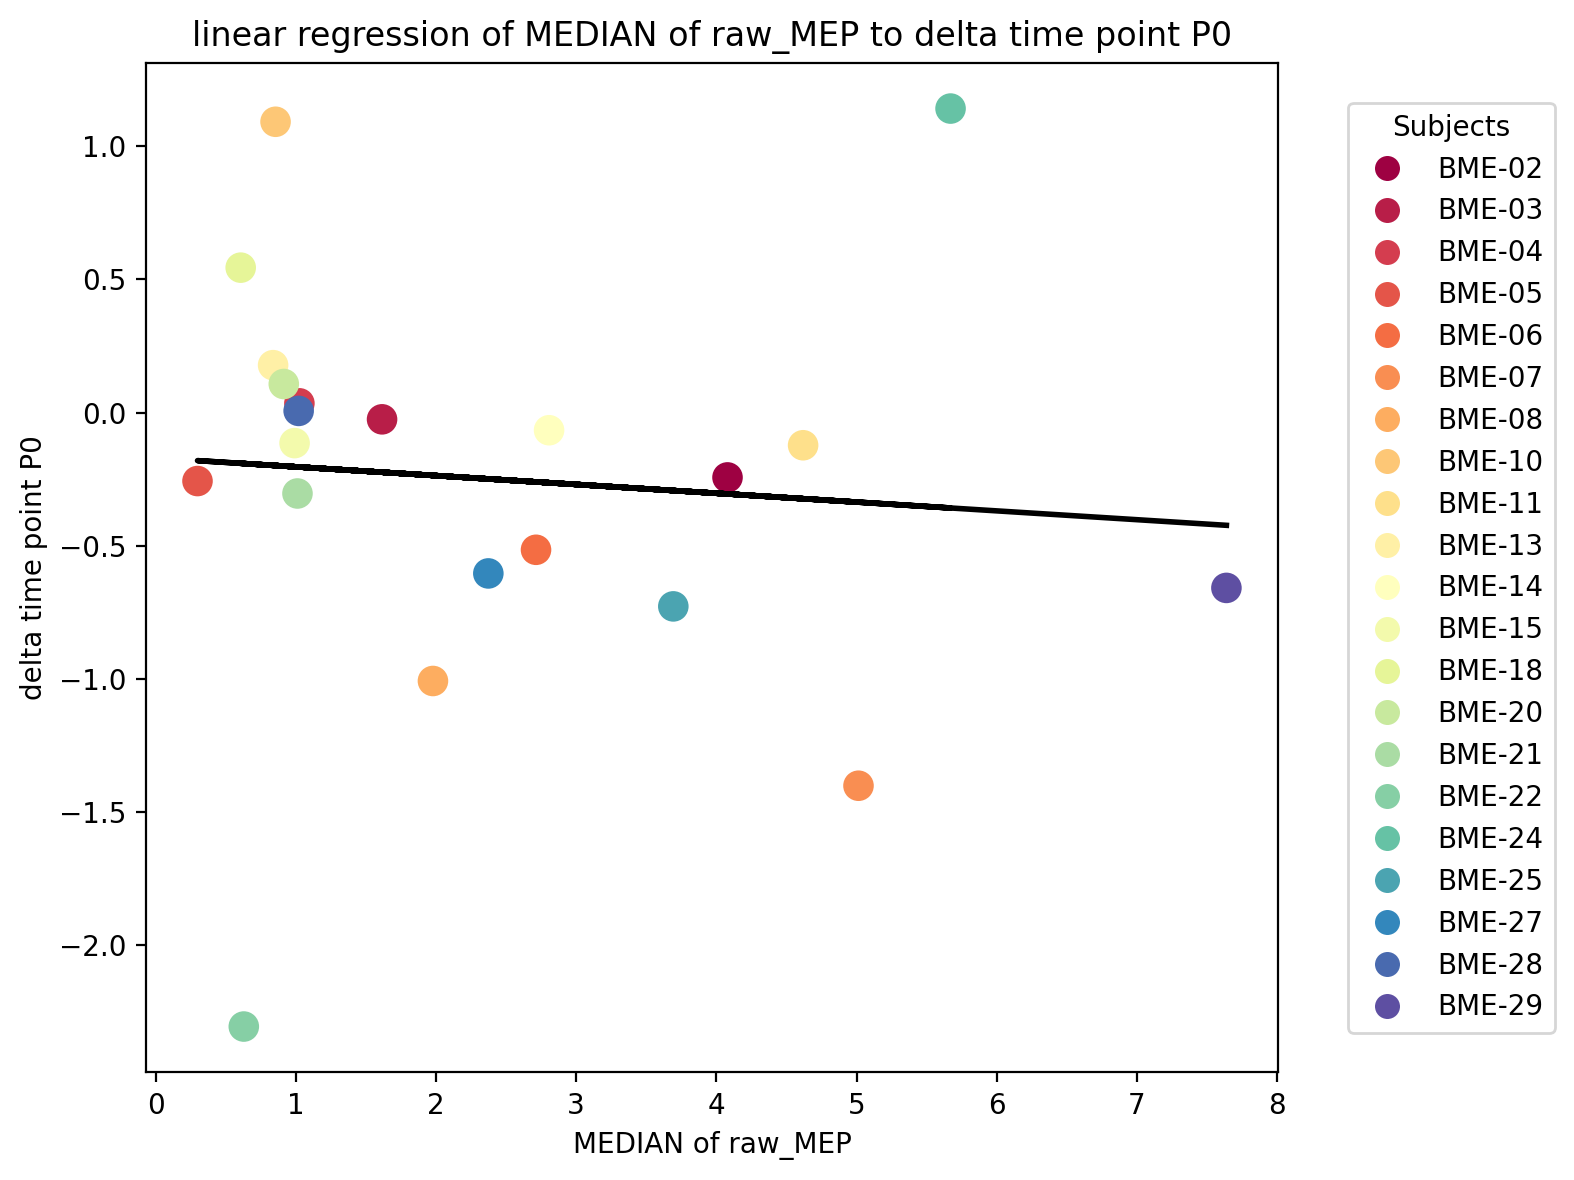

In [ ]:
#linear fit of median MEP at 130%RMT to P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

diabetes = datasets.load_diabetes()

x = median_mep
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
labels = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")


plt.xlabel('MEDIAN of raw_MEP')
plt.ylabel('delta time point P0')
plt.title('linear regression of MEDIAN of raw_MEP to delta time point P0')
plt.tight_layout()
plt.show()

R-squared: 0.00760207956076131
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.1455
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.707
Time:                        03:32:02   Log-Likelihood:                -23.544
No. Observations:                  21   AIC:                             51.09
Df Residuals:                      19   BIC:                             53.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1708

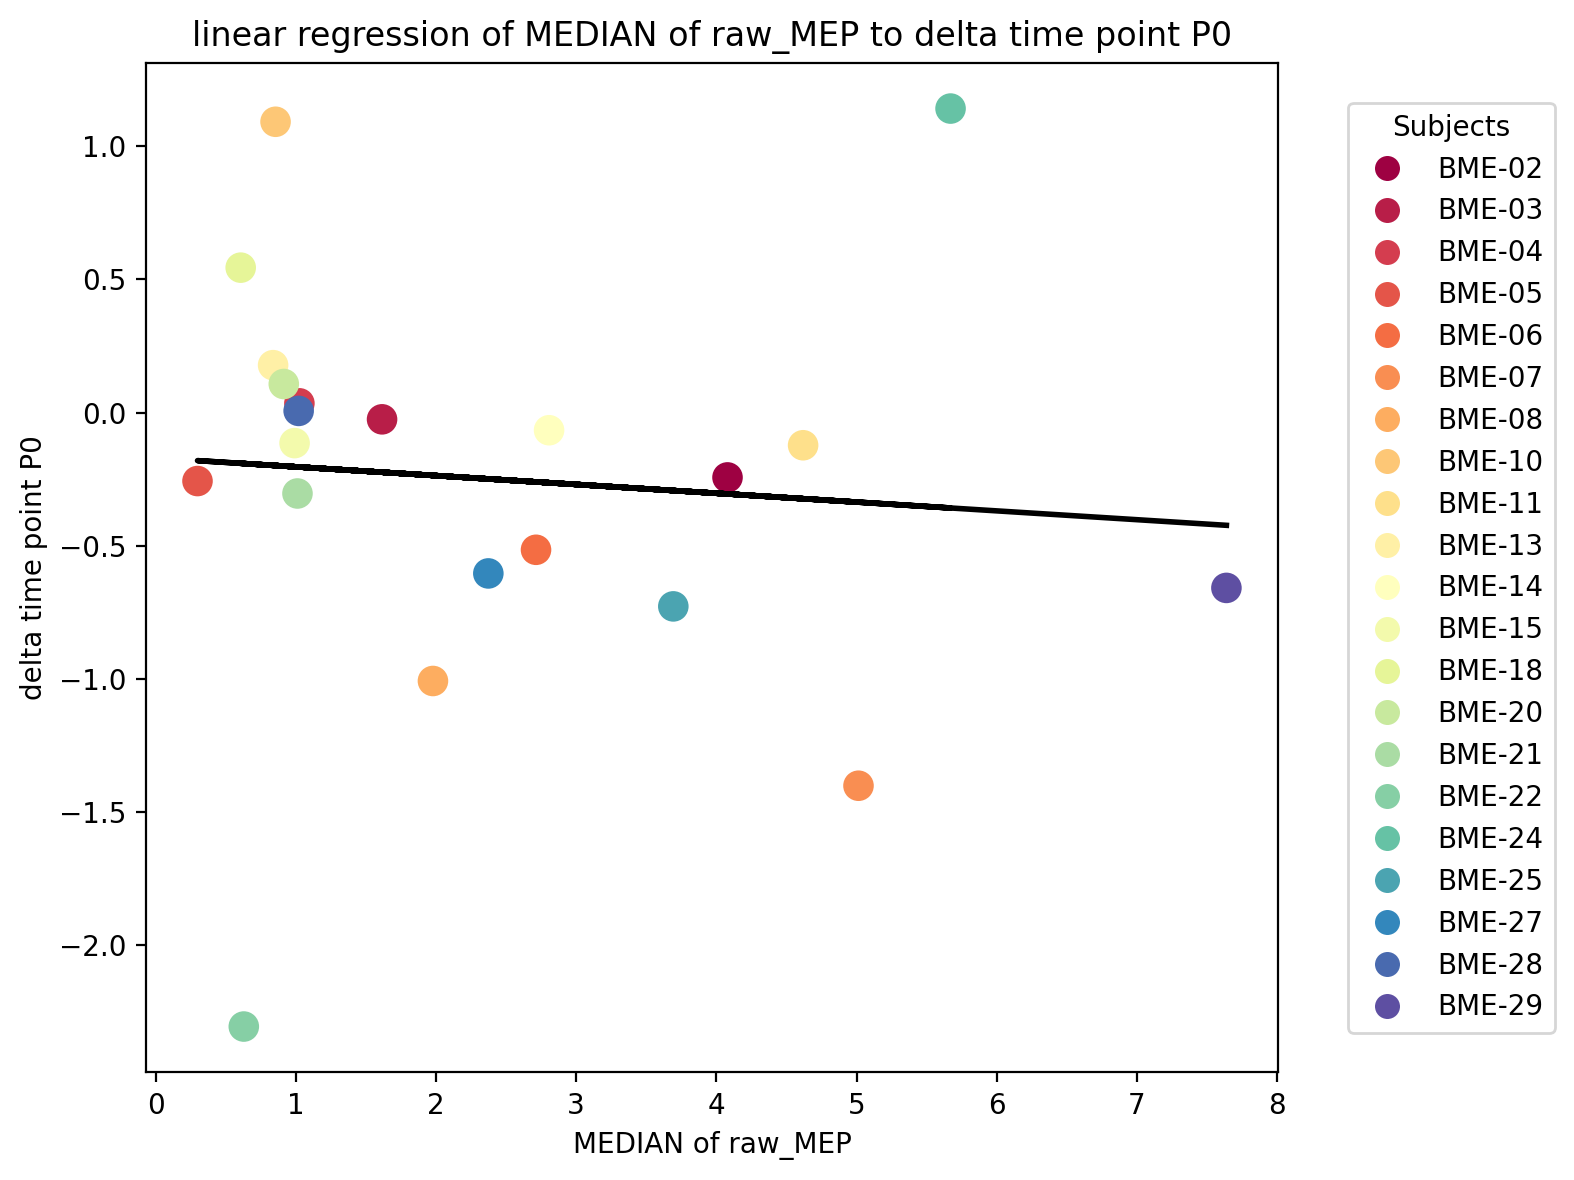

In [ ]:
#linear fit of median MEP at 130%RMT to P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

diabetes = datasets.load_diabetes()

x = median_mep
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
labels = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")


plt.xlabel('MEDIAN of raw_MEP')
plt.ylabel('delta time point P0')
plt.title('linear regression of MEDIAN of raw_MEP at 130%RMT to delta time point P0')
plt.tight_layout()
plt.show()



R-squared: 0.6596233204046239
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     36.82
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           7.77e-06
Time:                        03:28:52   Log-Likelihood:                -5.4530
No. Observations:                  21   AIC:                             14.91
Df Residuals:                      19   BIC:                             16.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3624 

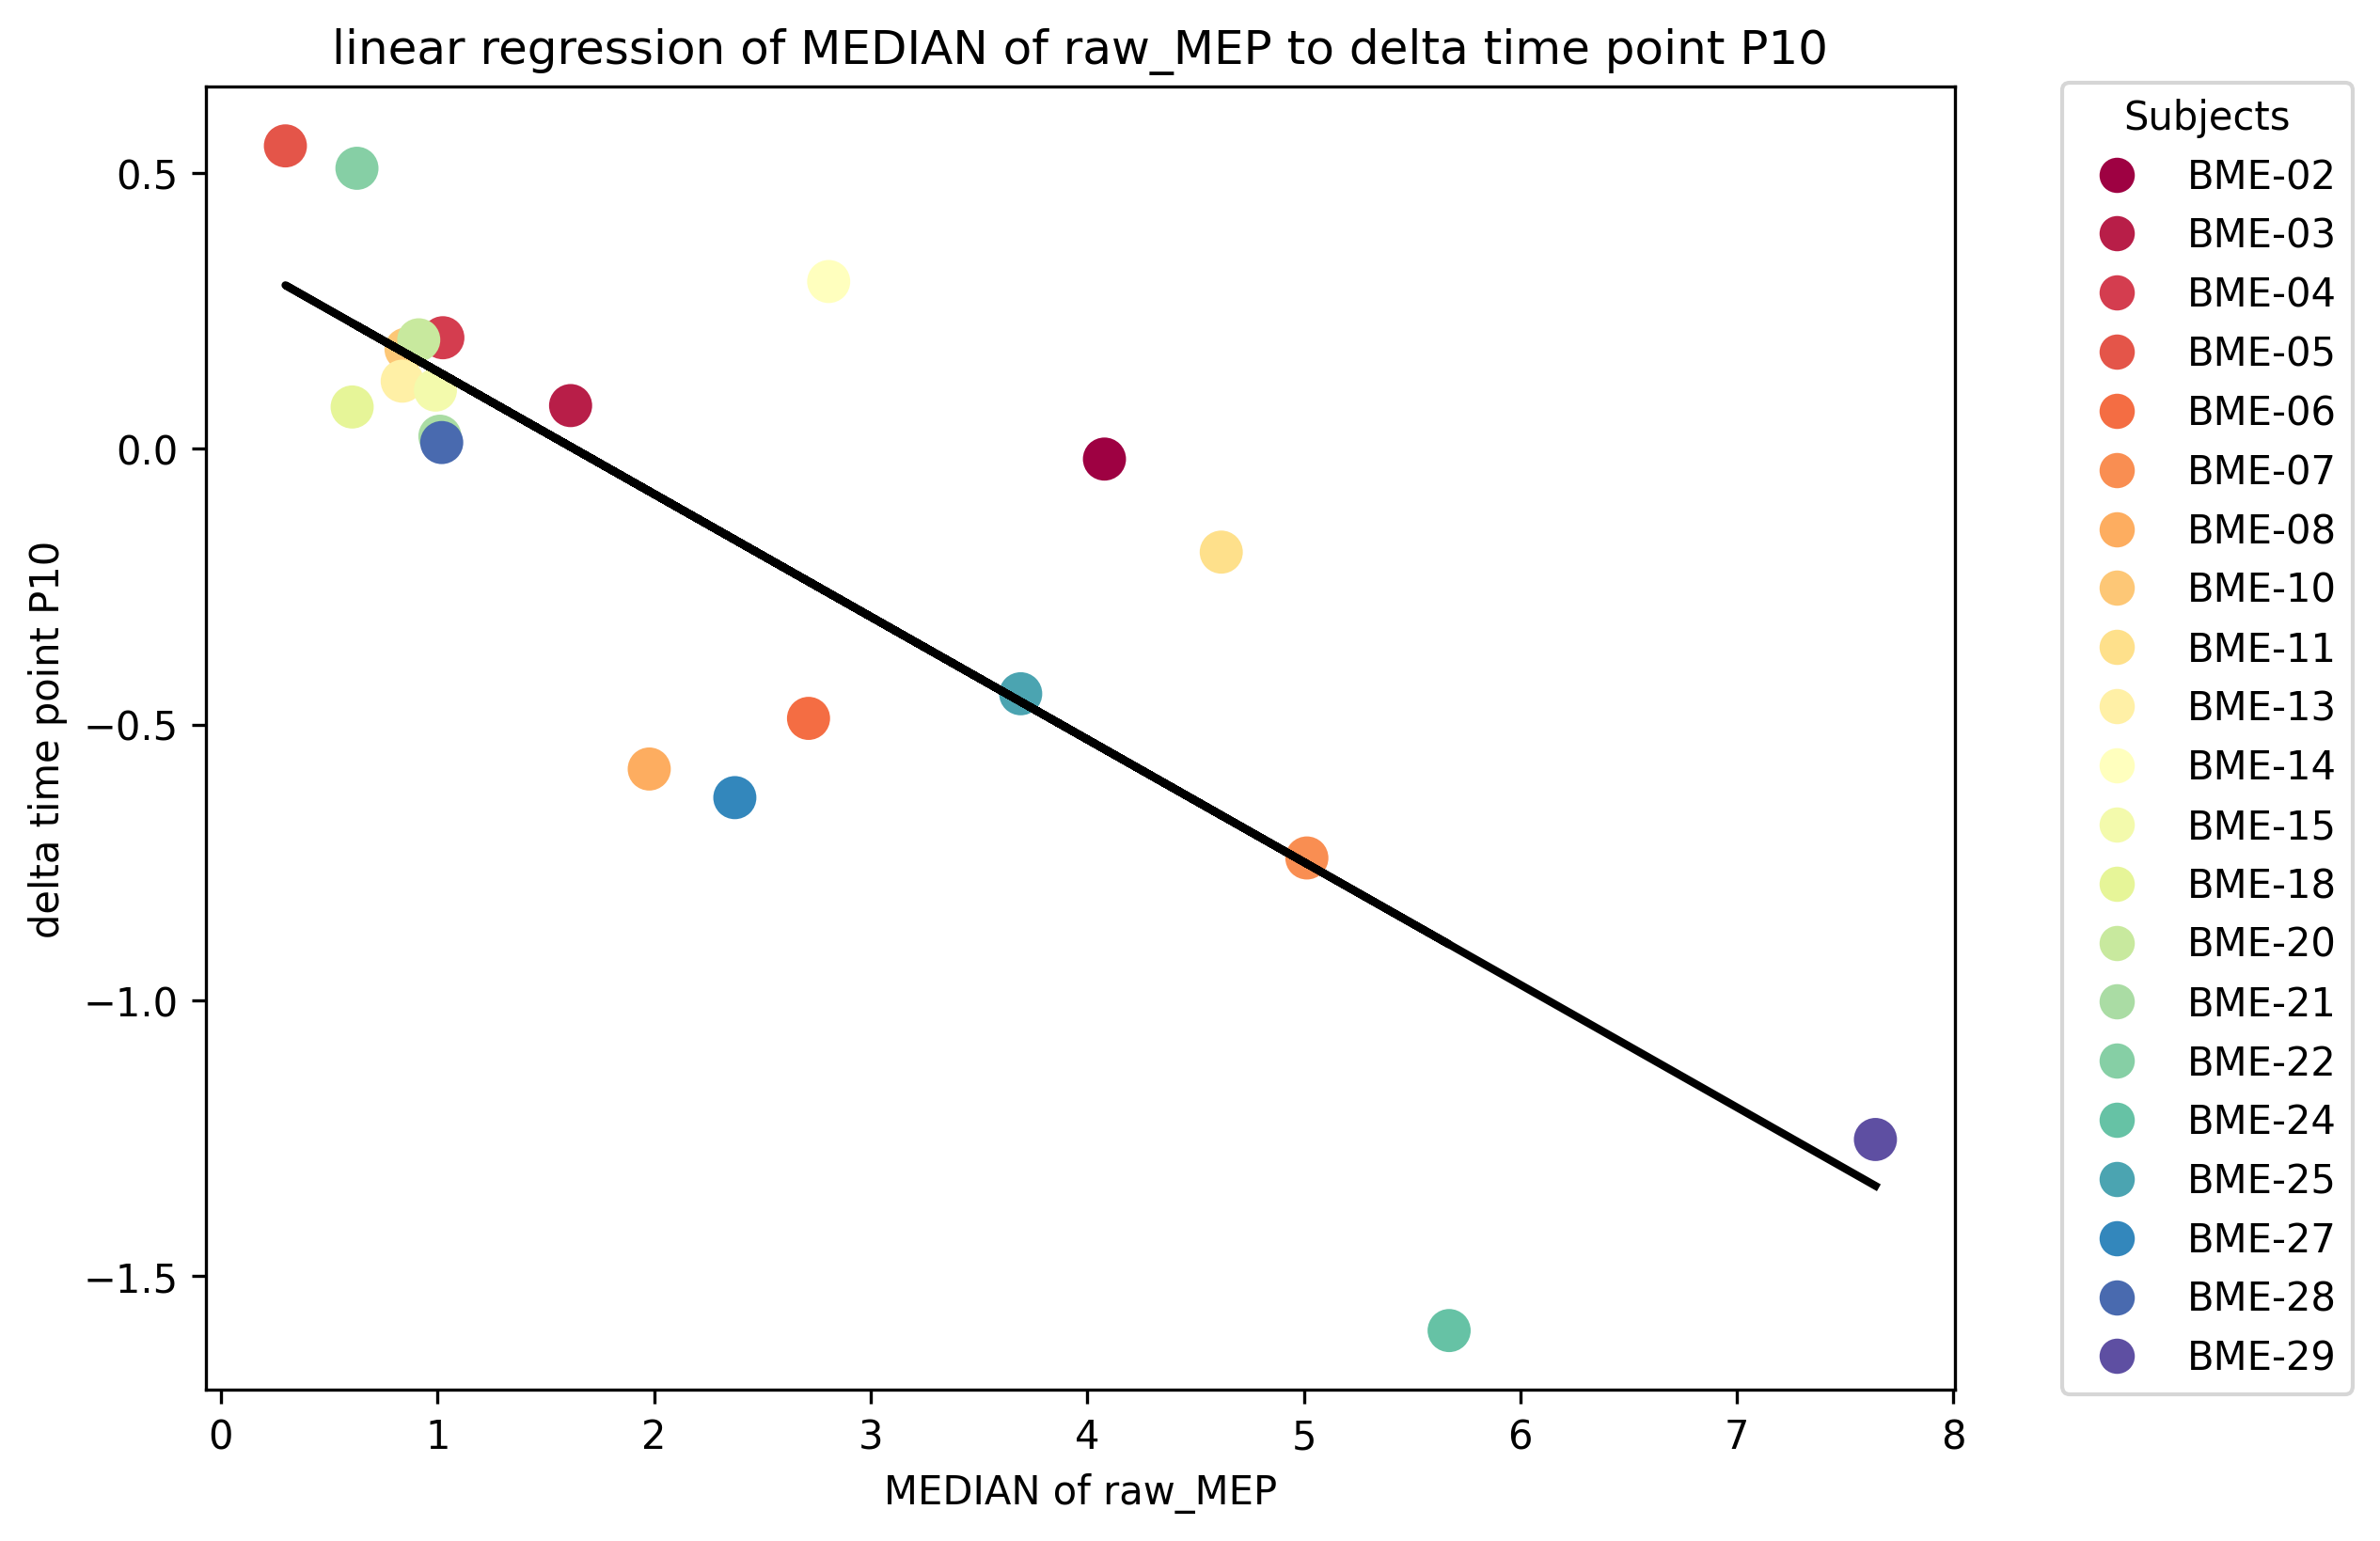

In [ ]:
#linear fit of median MEP at 130%RMT to P10
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = median_mep
y = P10
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")


plt.xlabel('MEDIAN of raw_MEP')
plt.ylabel('delta time point P10')
plt.title('linear regression of MEDIAN of raw_MEP at 130%RMT to delta time point P10')

plt.show()

R-squared: 0.6881101326017756
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     41.92
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           3.33e-06
Time:                        03:28:53   Log-Likelihood:                -8.5460
No. Observations:                  21   AIC:                             21.09
Df Residuals:                      19   BIC:                             23.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4395 

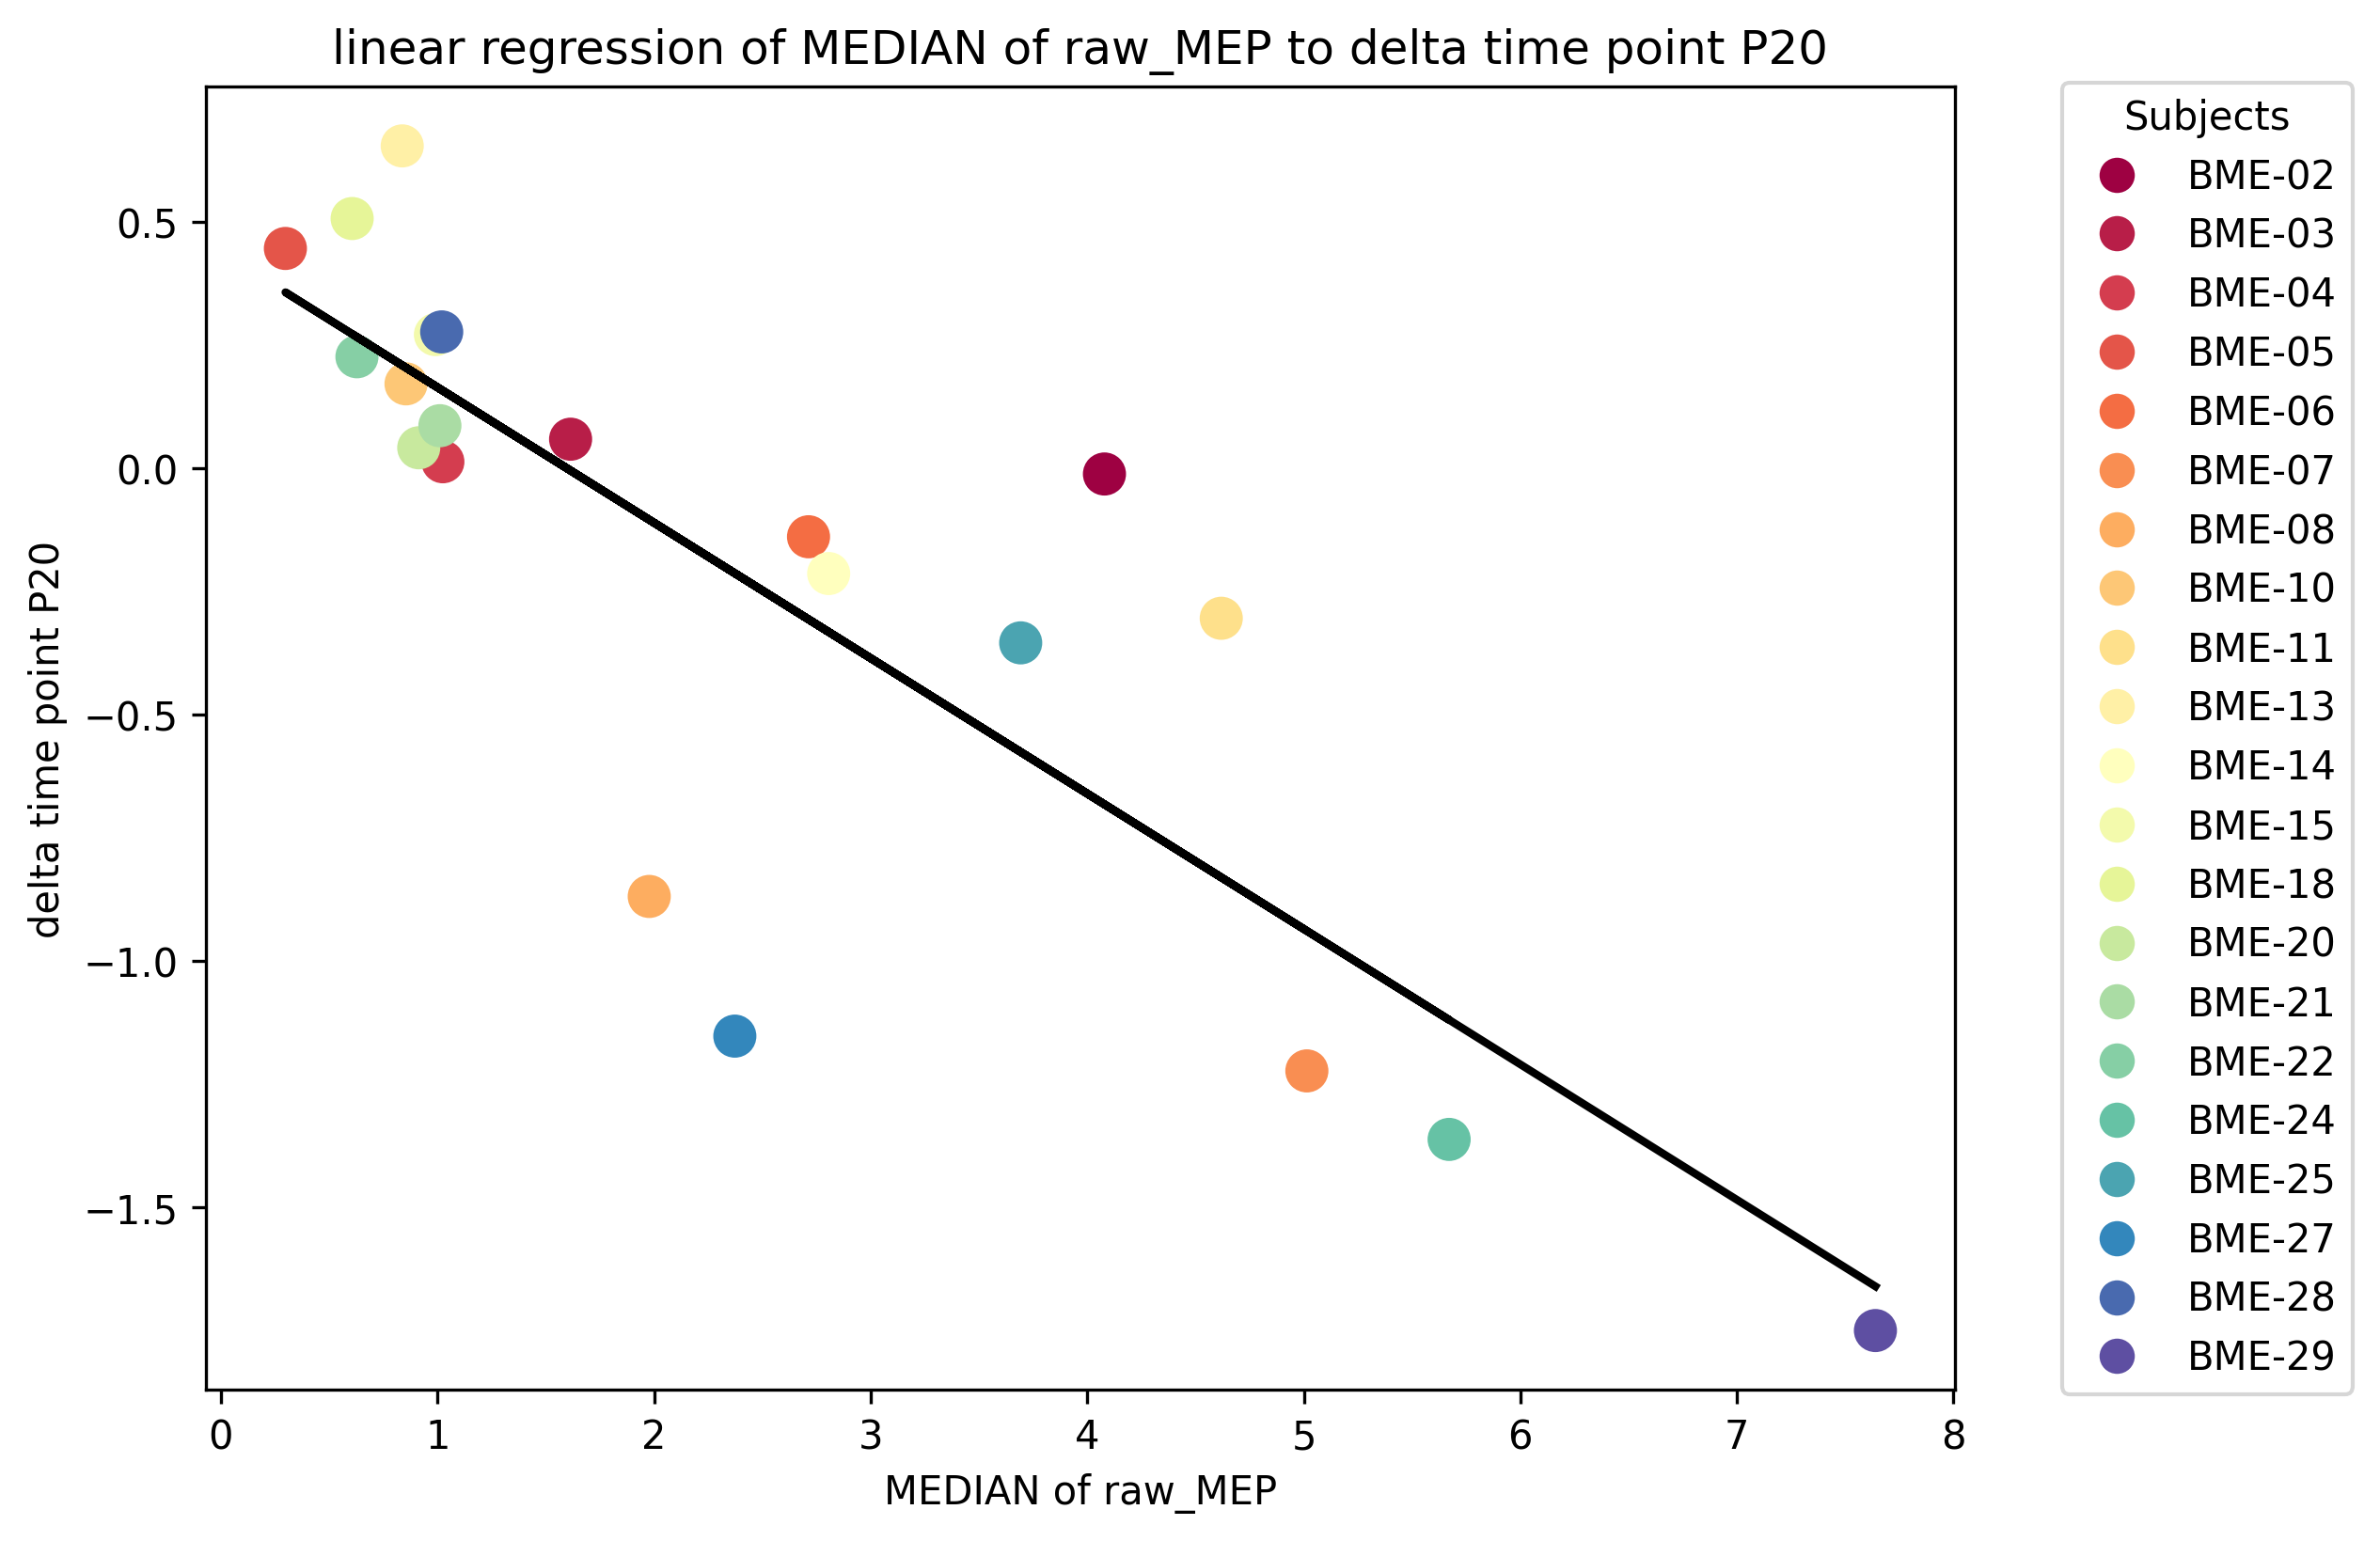

In [ ]:
#linear fit of median MEP at 130%RMT to P20
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = median_mep
y = P20
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('MEDIAN of raw_MEP')
plt.ylabel('delta time point P20')
plt.title('linear regression of MEDIAN of raw_MEP at 130%RMT to delta time point P20')

plt.show()

R-squared: 0.38013143710568986
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     11.65
Date:                Sat, 14 Dec 2024   Prob (F-statistic):            0.00291
Time:                        03:28:53   Log-Likelihood:                -15.391
No. Observations:                  21   AIC:                             34.78
Df Residuals:                      19   BIC:                             36.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3370

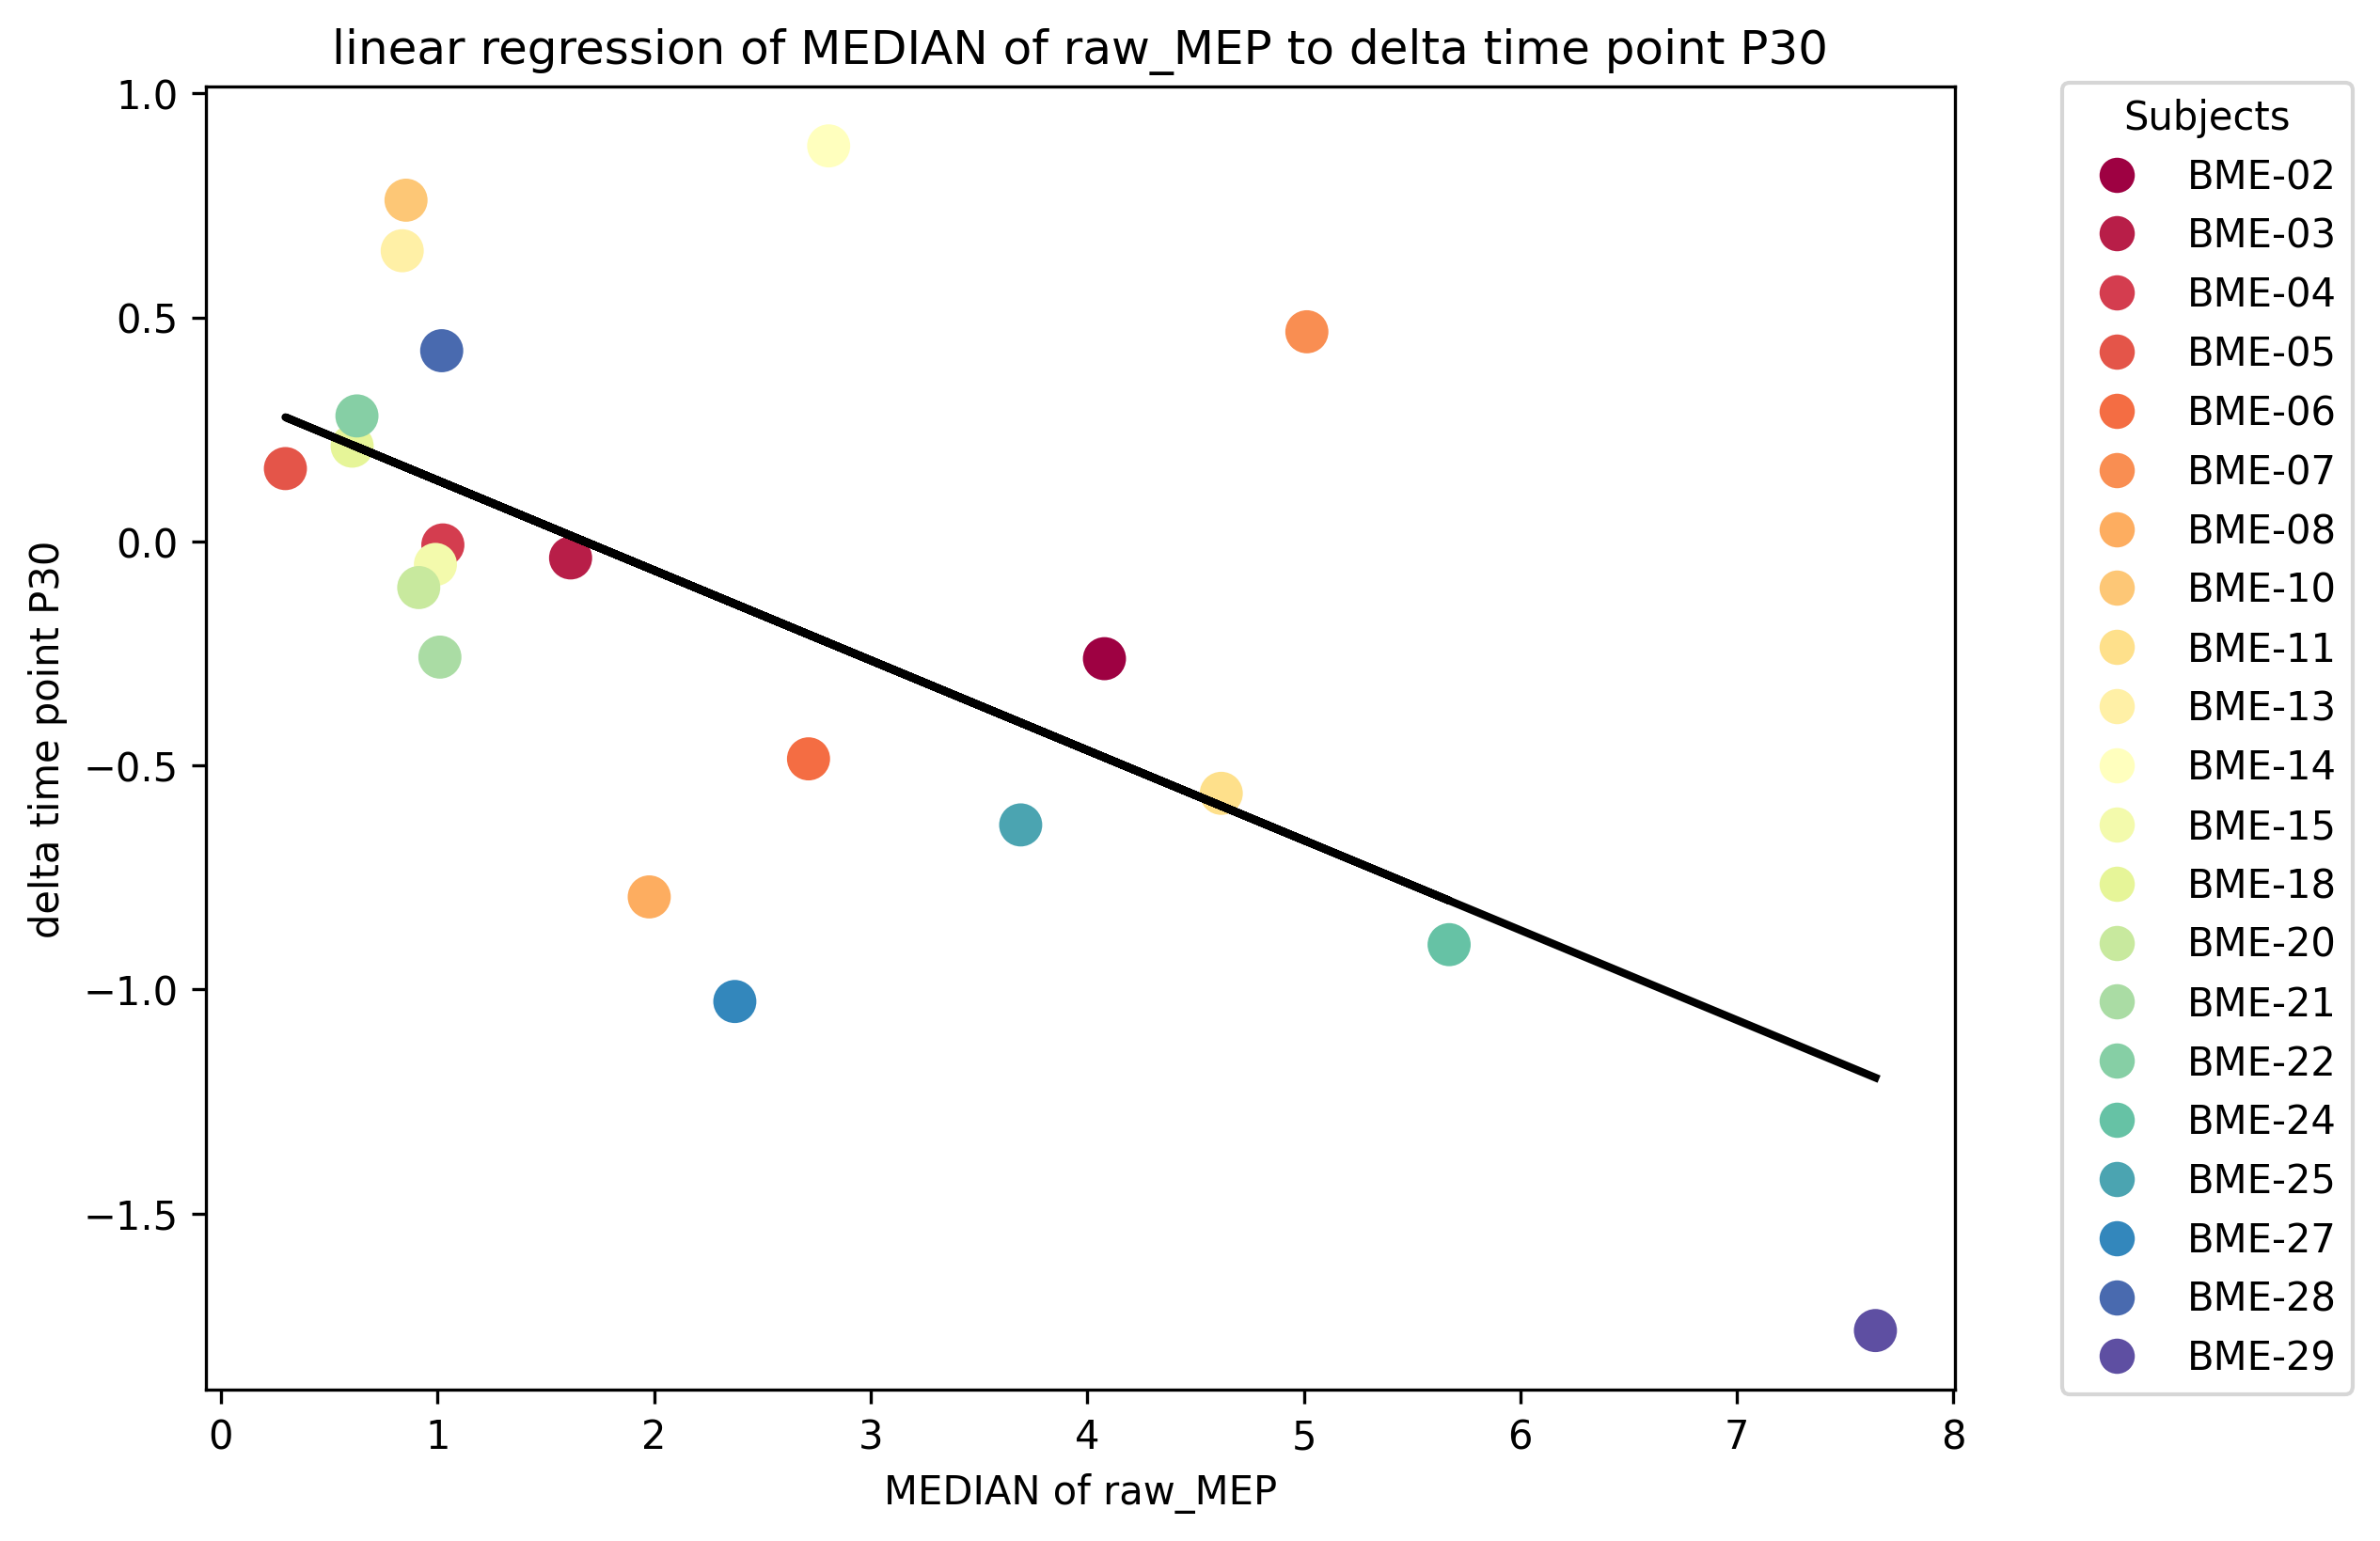

In [ ]:
#linear fit of median MEP at 130%RMT to P30
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = median_mep
y = P30
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('MEDIAN of raw_MEP')
plt.ylabel('delta time point P30')
plt.title('linear regression of MEDIAN of raw_MEP at 130%RMT to delta time point P30')

plt.show()

<ipython-input-107-90ff39fe4b51>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().remove()
<ipython-input-107-90ff39fe4b51>:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()
<ipython-input-107-90ff39fe4b51>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend().remove()


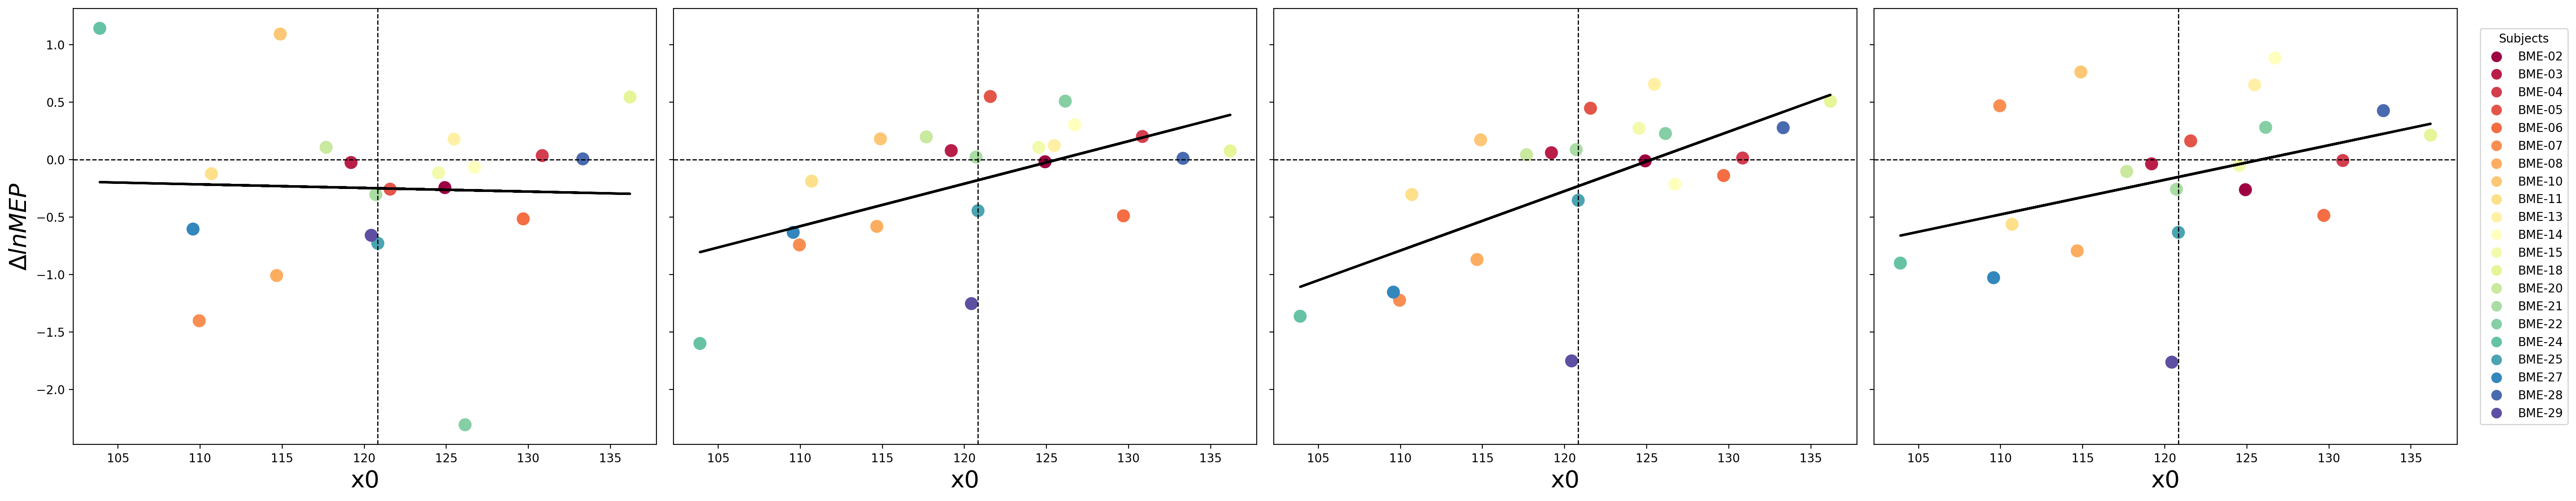

In [ ]:
#plot the change of x0 with different time point
import matplotlib.pyplot as plt
import numpy as np

diabetes = datasets.load_diabetes()
labels = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']

# for subject P0
x1 = x0.reshape(-1,1)
y1 = P0.reshape(-1,1)
reg = LinearRegression().fit(x1, y1)
reg.score(x1, y1)
X2 = sm.add_constant(x1)
est = sm.OLS(y1, X2)
est2 = est.fit()
y_predict1 = reg.predict(x1)

# for subject P10
x2 = x1
y2 = P10.reshape(-1,1)
reg = LinearRegression().fit(x2, y2)
reg.score(x2, y2)
X2 = sm.add_constant(x2)
est = sm.OLS(y2, X2)
est2 = est.fit()
y_predict2 = reg.predict(x2)

x3 = x1
y3 = P20.reshape(-1,1)
reg = LinearRegression().fit(x3, y3)
reg.score(x3, y3)
X3 = sm.add_constant(x3)
est = sm.OLS(y3, X3)
est2 = est.fit()
y_predict3 = reg.predict(x3)

x4 = x1
y4 = P30.reshape(-1,1)
reg = LinearRegression().fit(x4, y4)
reg.score(x4, y4)
X4 = sm.add_constant(x4)
est = sm.OLS(y4, X4)
est2 = est.fit()
y_predict4 = reg.predict(x4)


fig, axes = plt.subplots(1, 4, figsize=(30, 6), sharey=True)
median = np.median(x1)
# plot all the figures
axes[0].plot(x1,y_predict1,color='black',linewidth=2)
axes[0].set_xlabel("x0",fontsize=20)
axes[0].set_ylabel(r"$\Delta lnMEP$",fontsize=20)
axes[0].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[0].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[0].scatter(x1, y1, c=colors, s=100)
axes[0].legend().remove()


axes[1].plot(x2, y_predict2,color='black',linewidth=2)
axes[1].set_xlabel("x0",fontsize=20)
axes[1].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[1].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[1].scatter(x2, y2, c=colors, s=100)
axes[1].legend().remove()


axes[2].plot(x3, y_predict3,color='black',linewidth=2)
axes[2].set_xlabel("x0",fontsize=20)
axes[2].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[2].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[2].scatter(x3, y3, c=colors, s=100)
axes[2].legend().remove()


axes[3].plot(x4, y_predict4,color='black',linewidth=2)
axes[3].set_xlabel("x0",fontsize=20)
axes[3].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[3].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[3].scatter(x4, y4, c=colors, s=100)

legend_elements = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
axes[3].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 0.5), title="Subjects")

# modify the plot
plt.tight_layout()
plt.show()

R-squared: 0.0011850421838264236
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.02254
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.882
Time:                        03:28:54   Log-Likelihood:                -23.612
No. Observations:                  21   AIC:                             51.22
Df Residuals:                      19   BIC:                             53.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.12

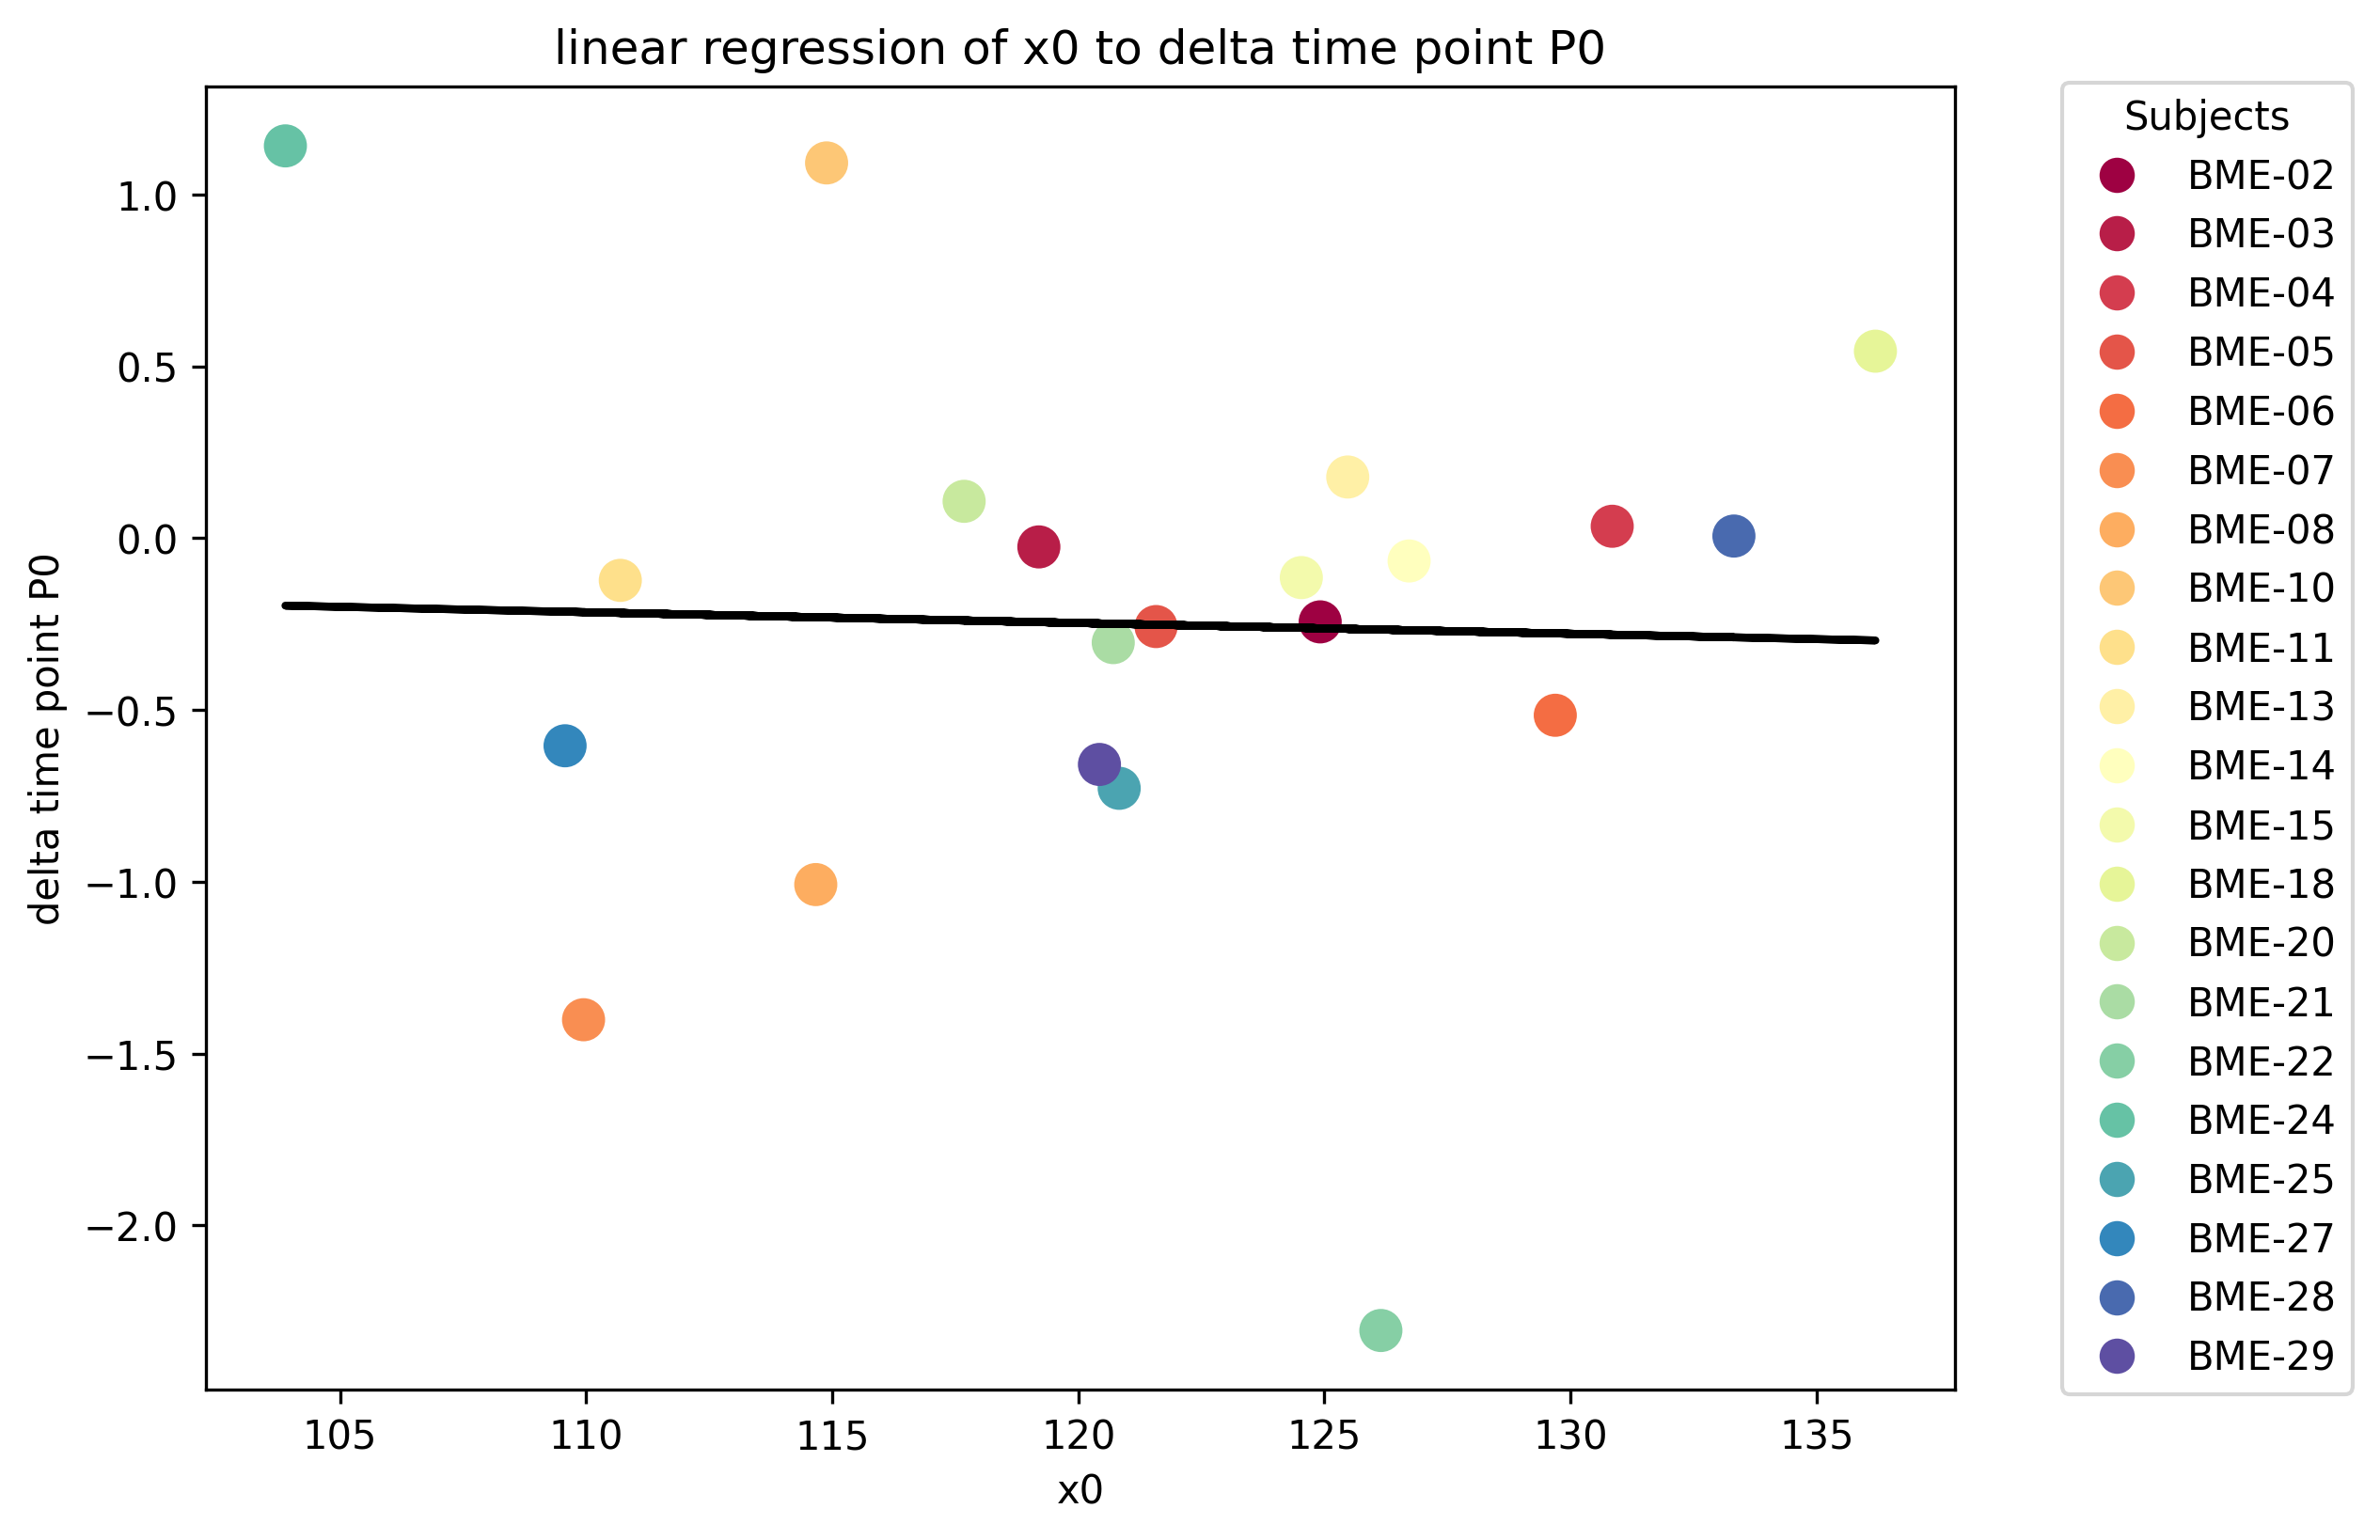

In [ ]:
#plot the linear fit of x0 with P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = x0
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('x0')
plt.ylabel('delta time point P0')
plt.title('linear regression of x0 to delta time point P0')

plt.show()


R-squared: 0.3162669435558225
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     8.789
Date:                Sat, 14 Dec 2024   Prob (F-statistic):            0.00796
Time:                        03:28:55   Log-Likelihood:                -12.777
No. Observations:                  21   AIC:                             29.55
Df Residuals:                      19   BIC:                             31.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6436 

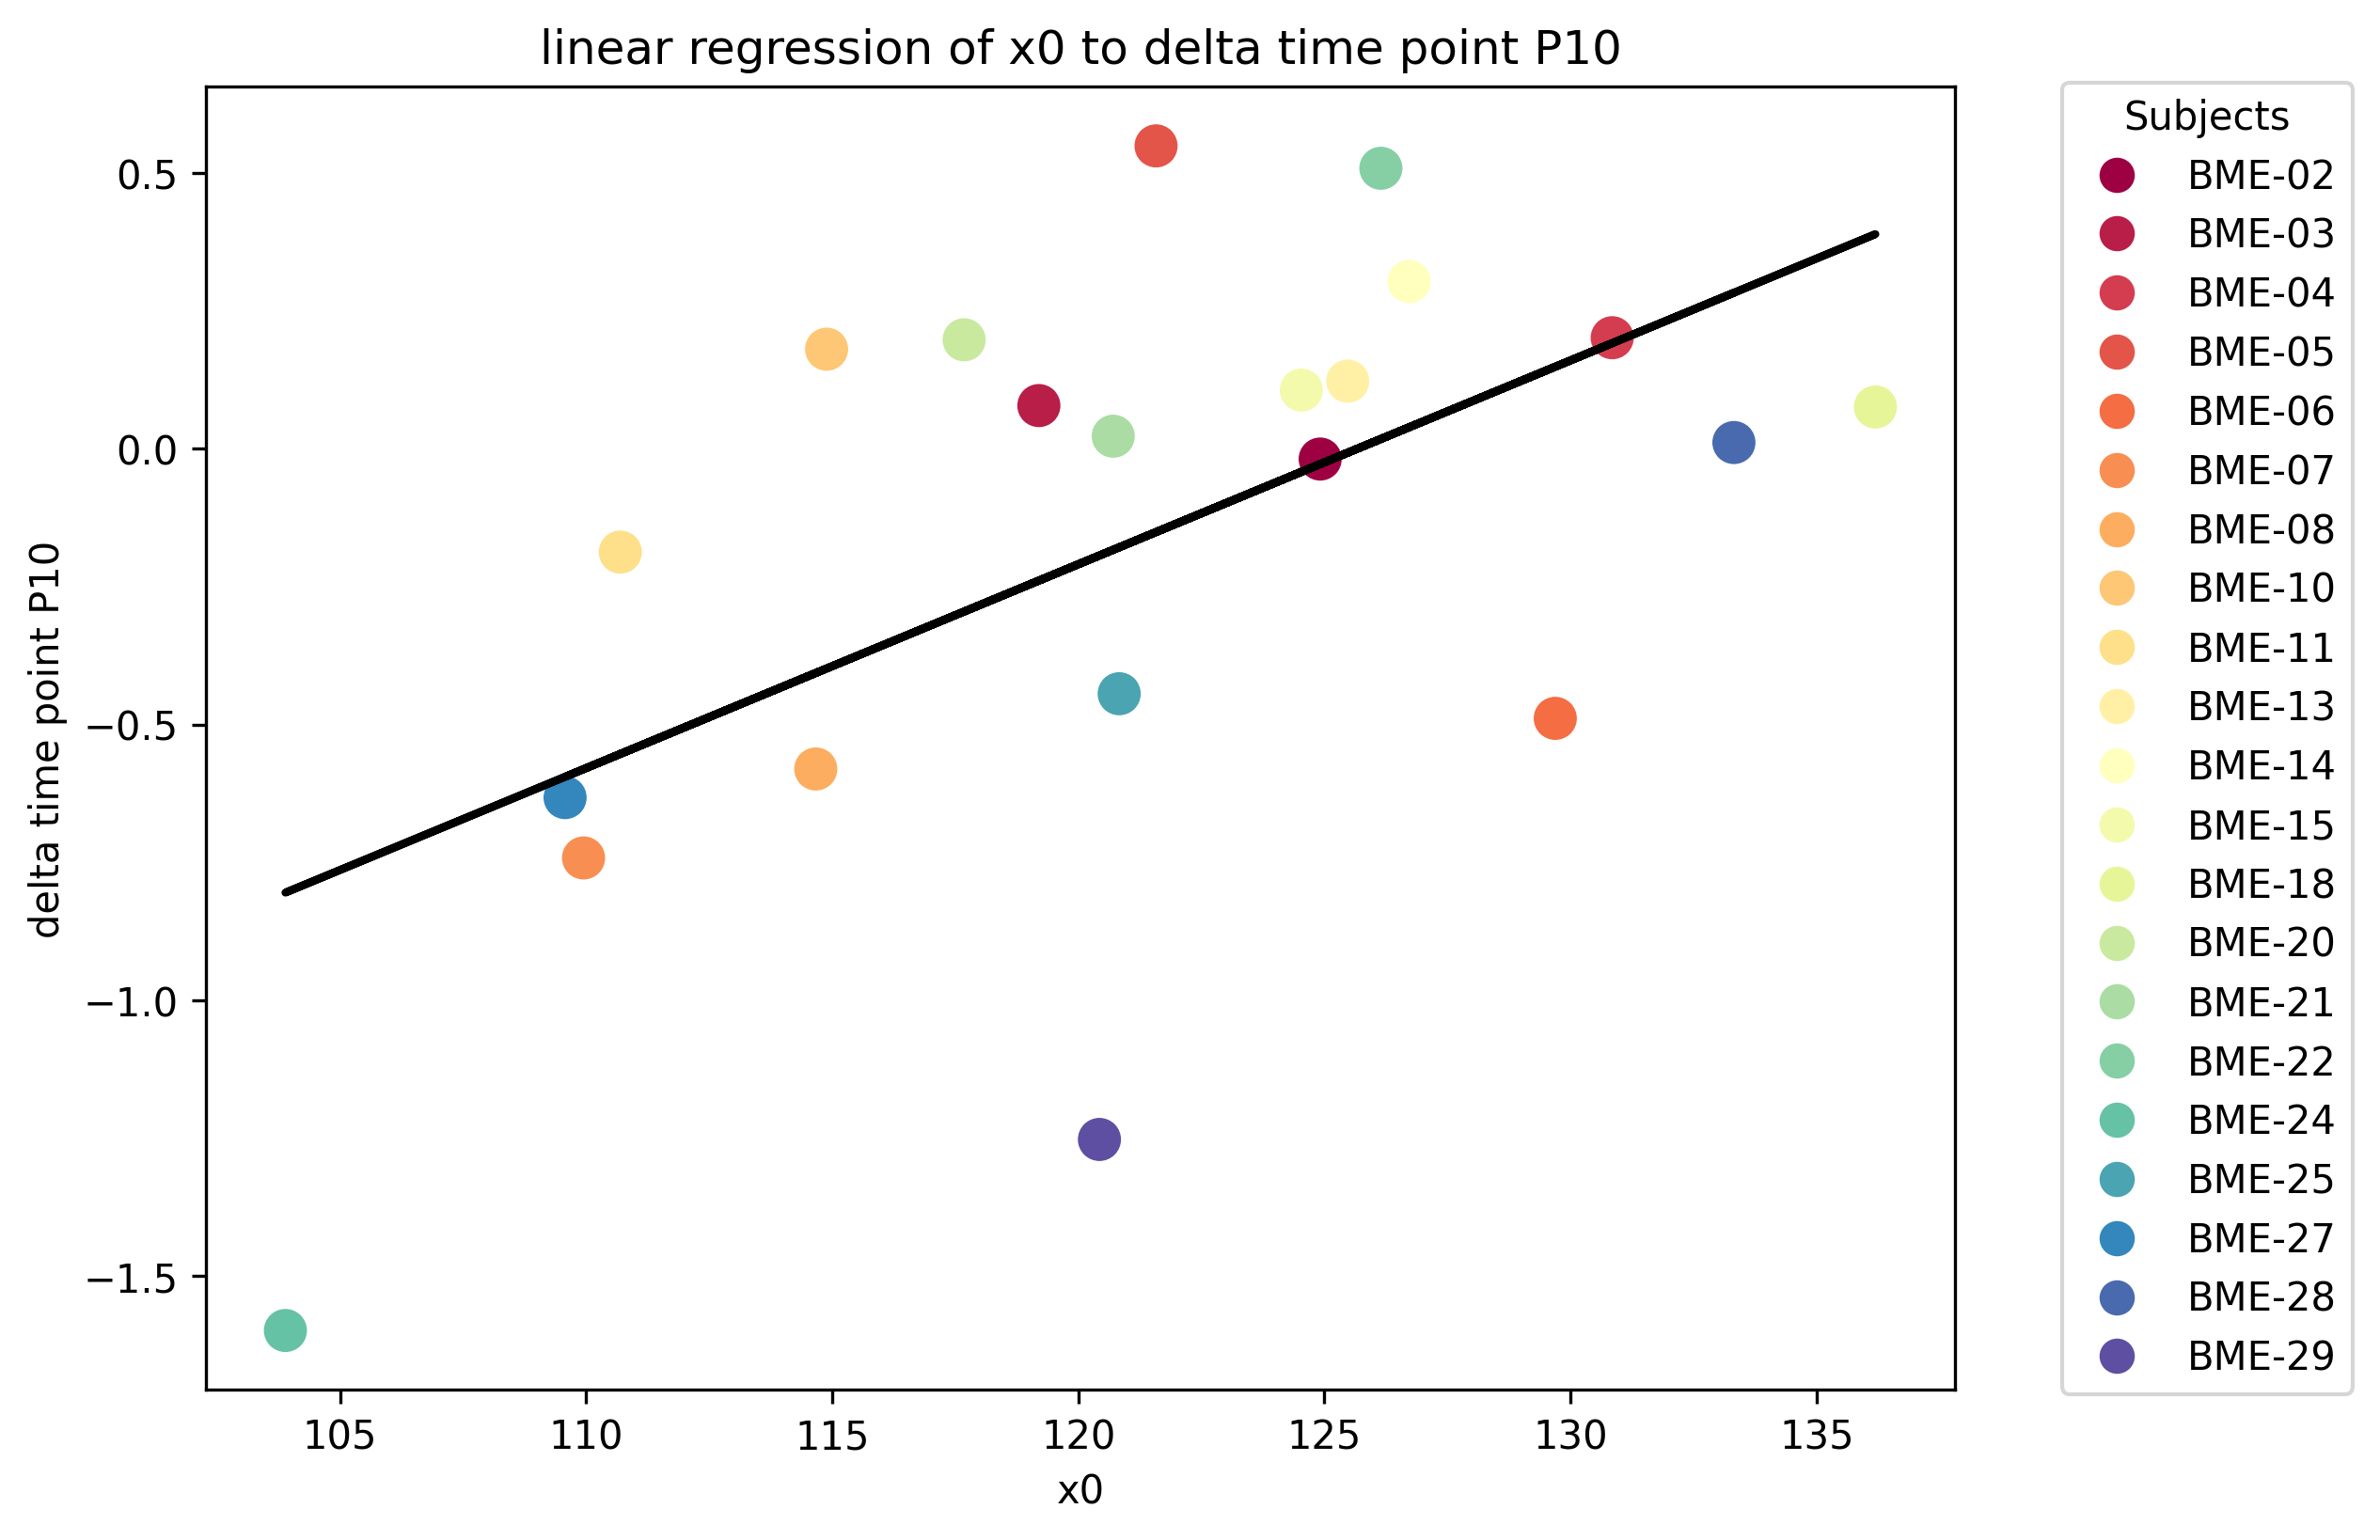

In [ ]:
#plot the linear fit of x0 with P10
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = x0
y = P10
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('x0')
plt.ylabel('delta time point P10')
plt.title('linear regression of x0 to delta time point P10')

plt.show()

R-squared: 0.42225316867652063
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sat, 14 Dec 2024   Prob (F-statistic):            0.00143
Time:                        03:28:56   Log-Likelihood:                -15.019
No. Observations:                  21   AIC:                             34.04
Df Residuals:                      19   BIC:                             36.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4755

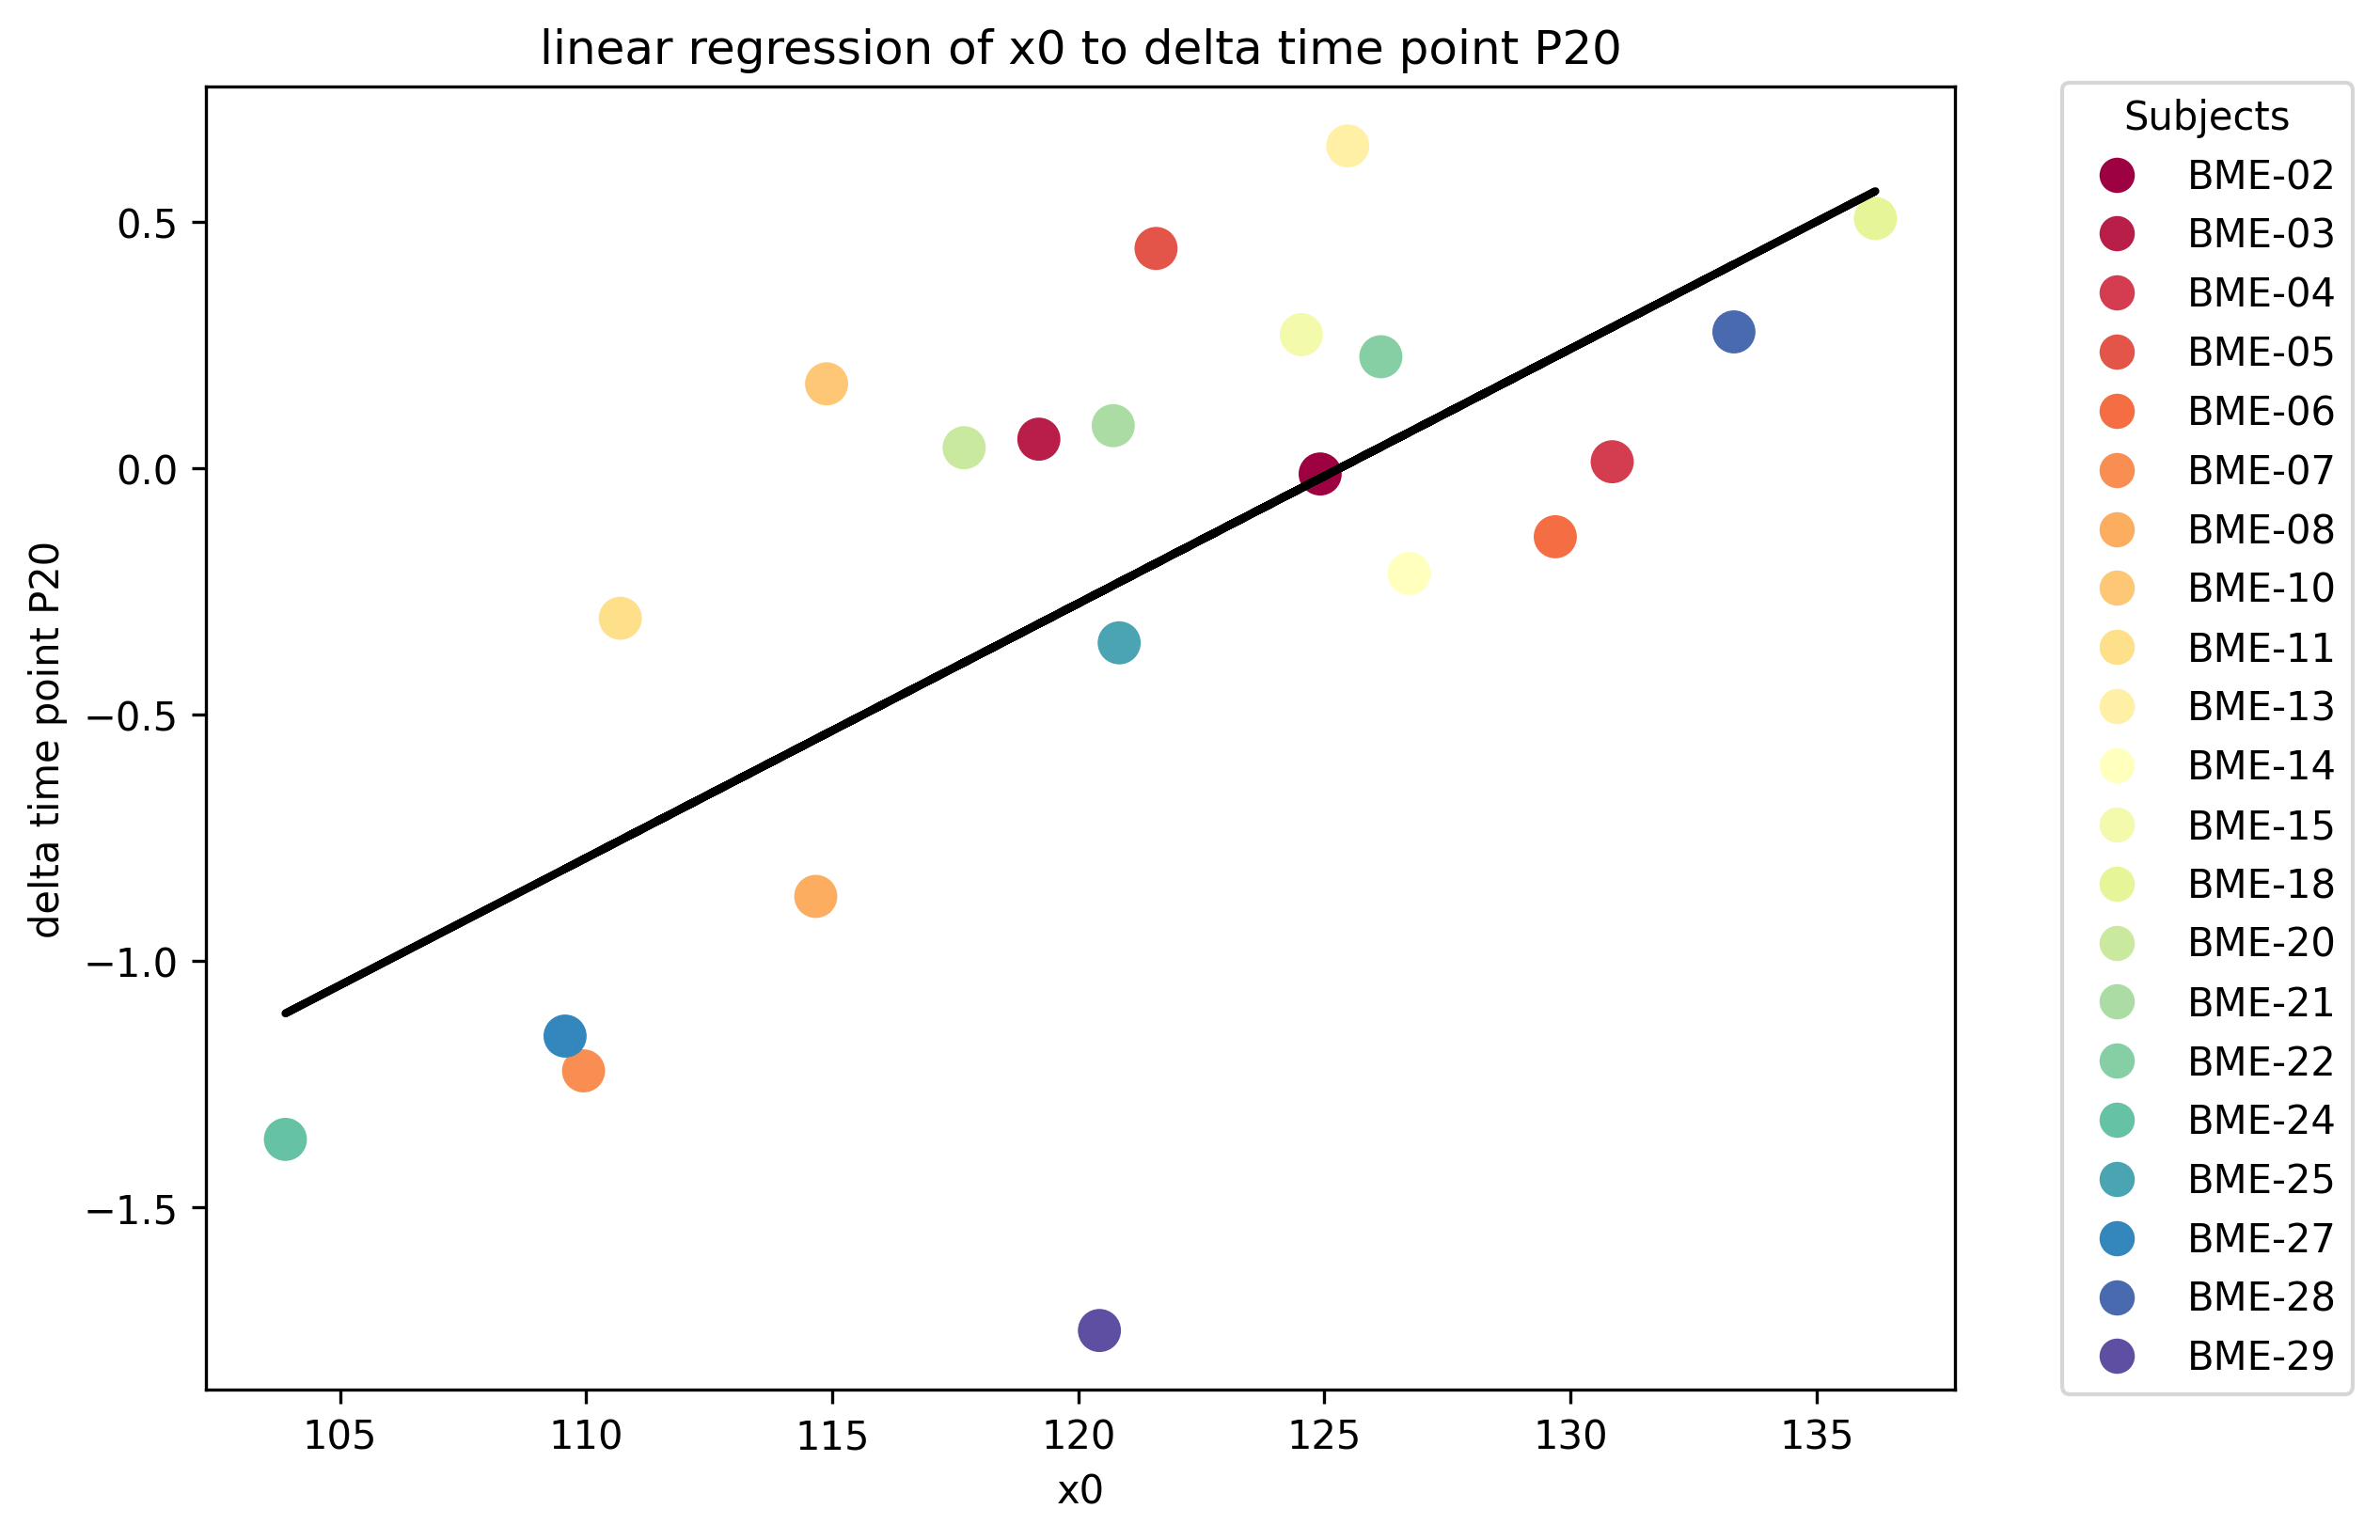

In [ ]:
#plot the linear fit of x0 with P20
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = x0
y = P20
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('x0')
plt.ylabel('delta time point P20')
plt.title('linear regression of x0 to delta time point P20')
plt.show()

R-squared: 0.1482653688550456
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.307
Date:                Sat, 14 Dec 2024   Prob (F-statistic):             0.0848
Time:                        03:28:56   Log-Likelihood:                -18.728
No. Observations:                  21   AIC:                             41.46
Df Residuals:                      19   BIC:                             43.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7873 

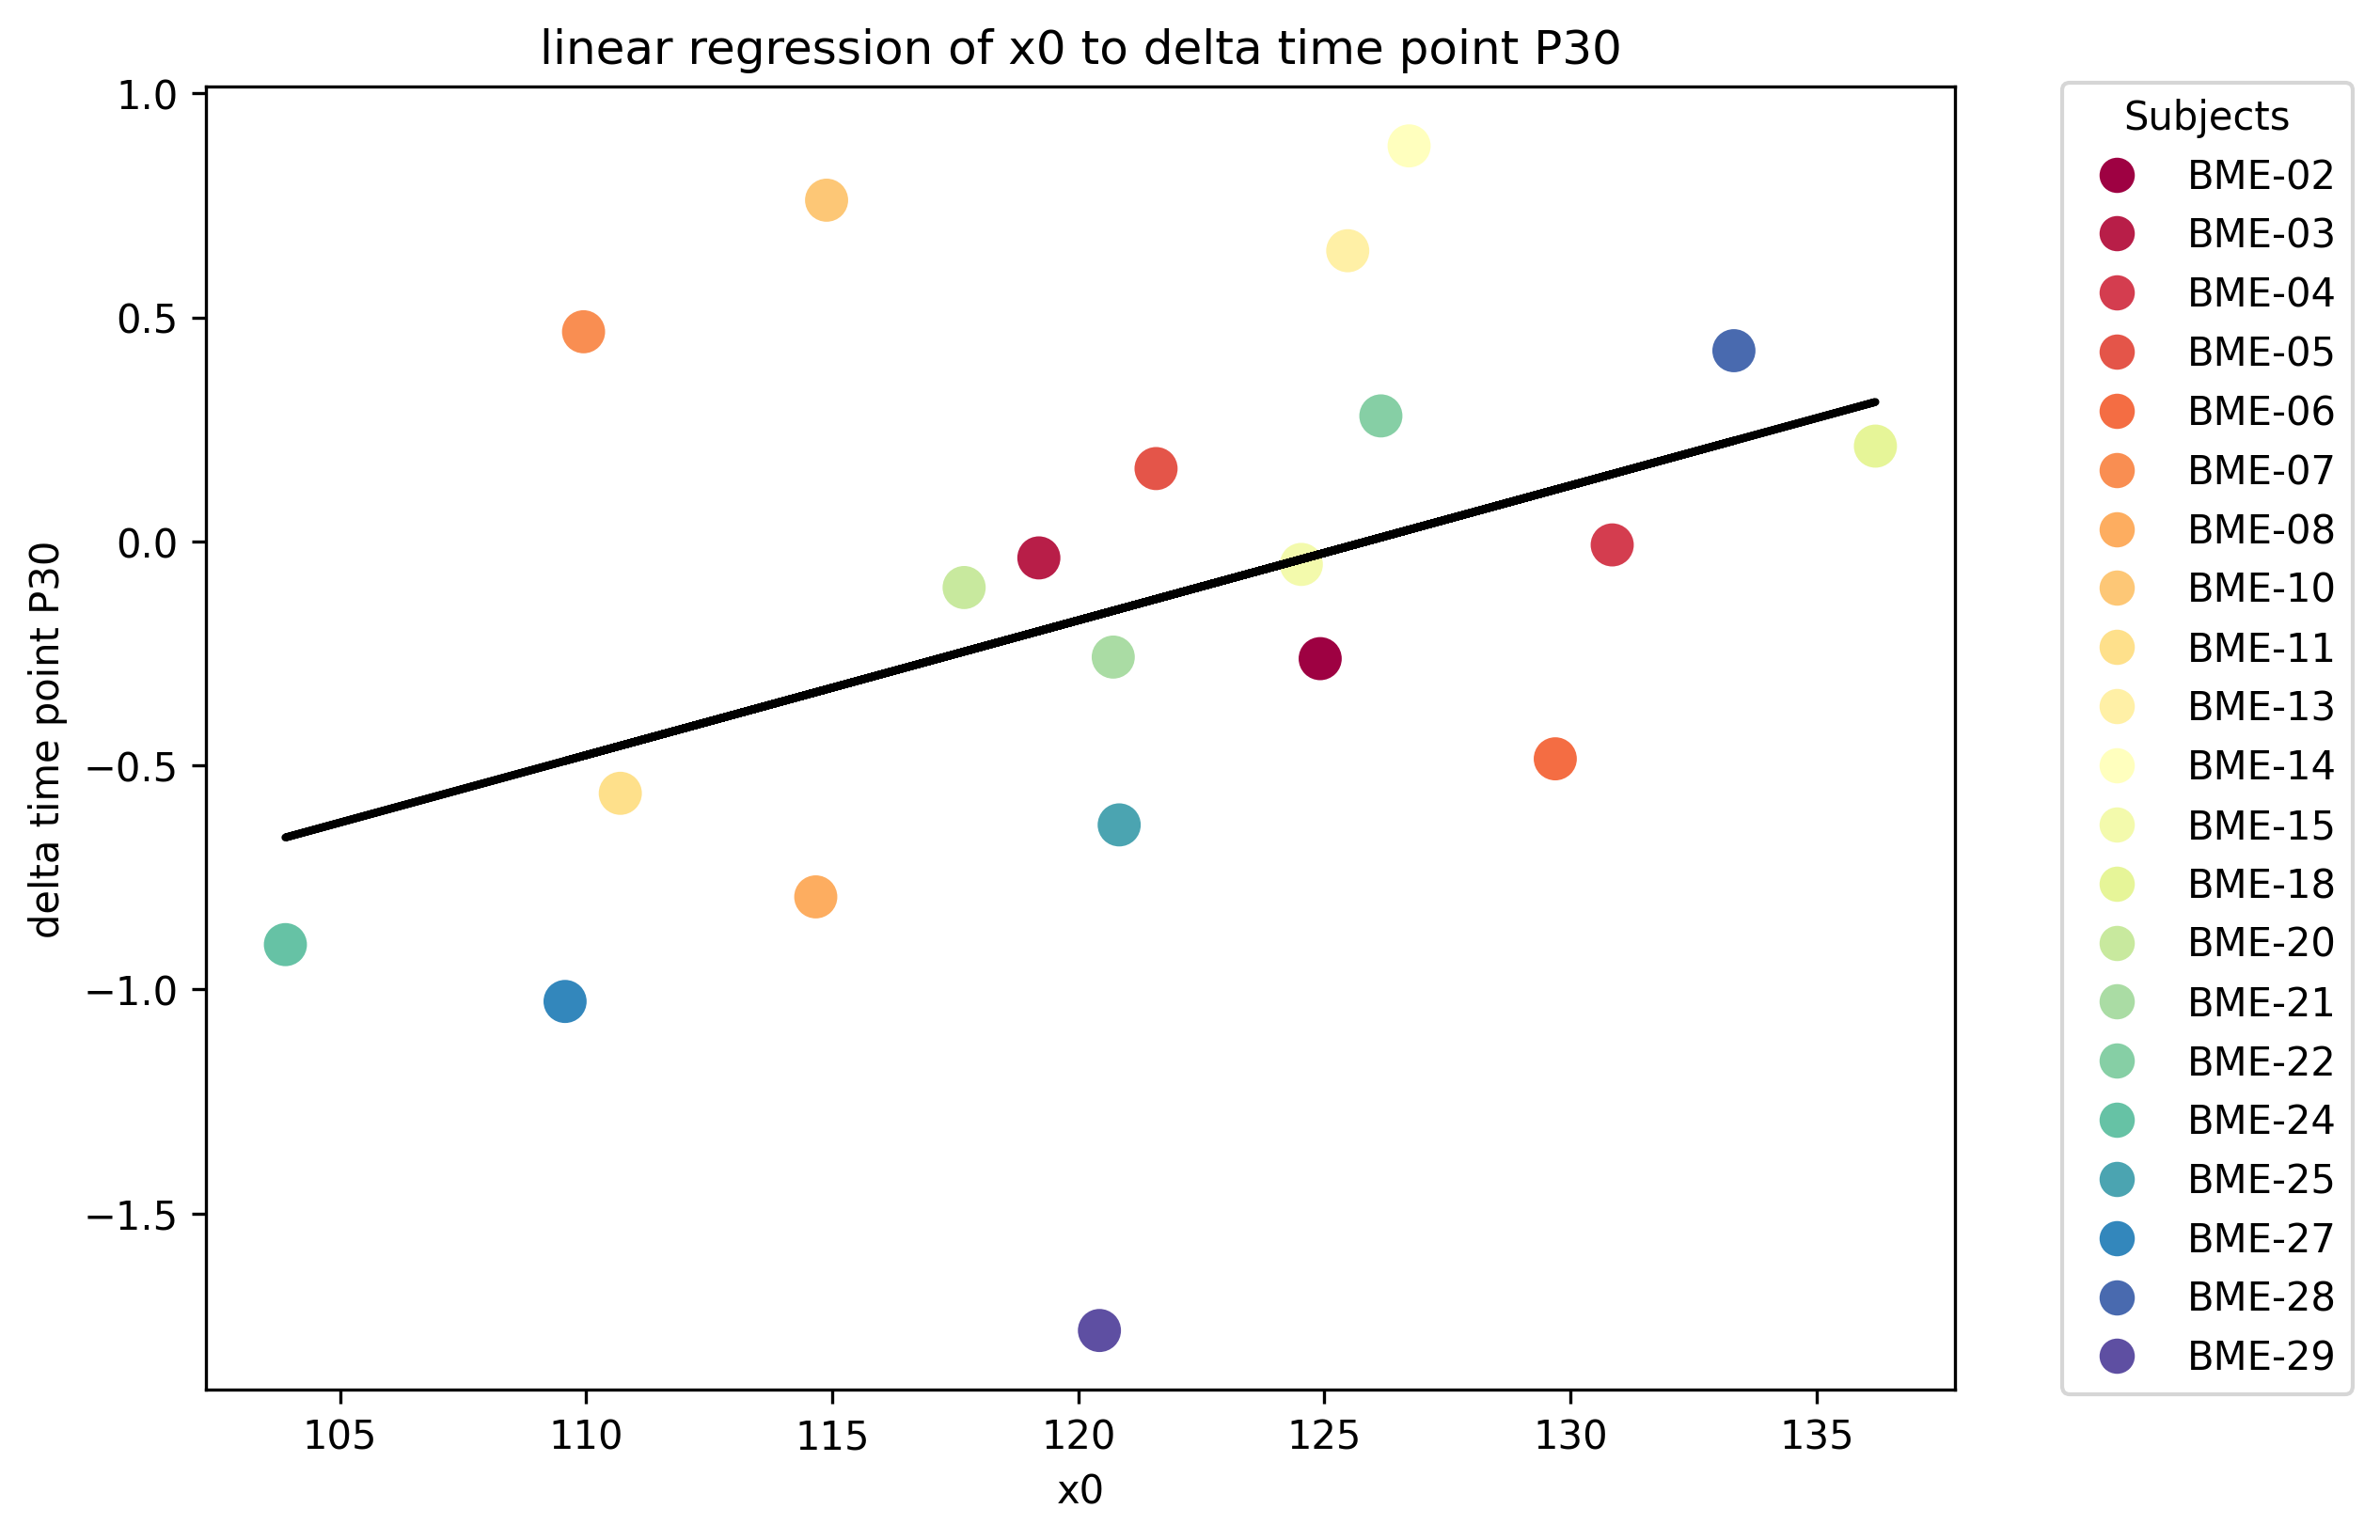

In [ ]:
#plot the linear fit of x0 with P30
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = x0
y = P30
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('x0')
plt.ylabel('delta time point P30')
plt.title('linear regression of x0 to delta time point P30')
plt.show()

<ipython-input-110-2fa04c3384c1>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().remove()
<ipython-input-110-2fa04c3384c1>:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()
<ipython-input-110-2fa04c3384c1>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend().remove()


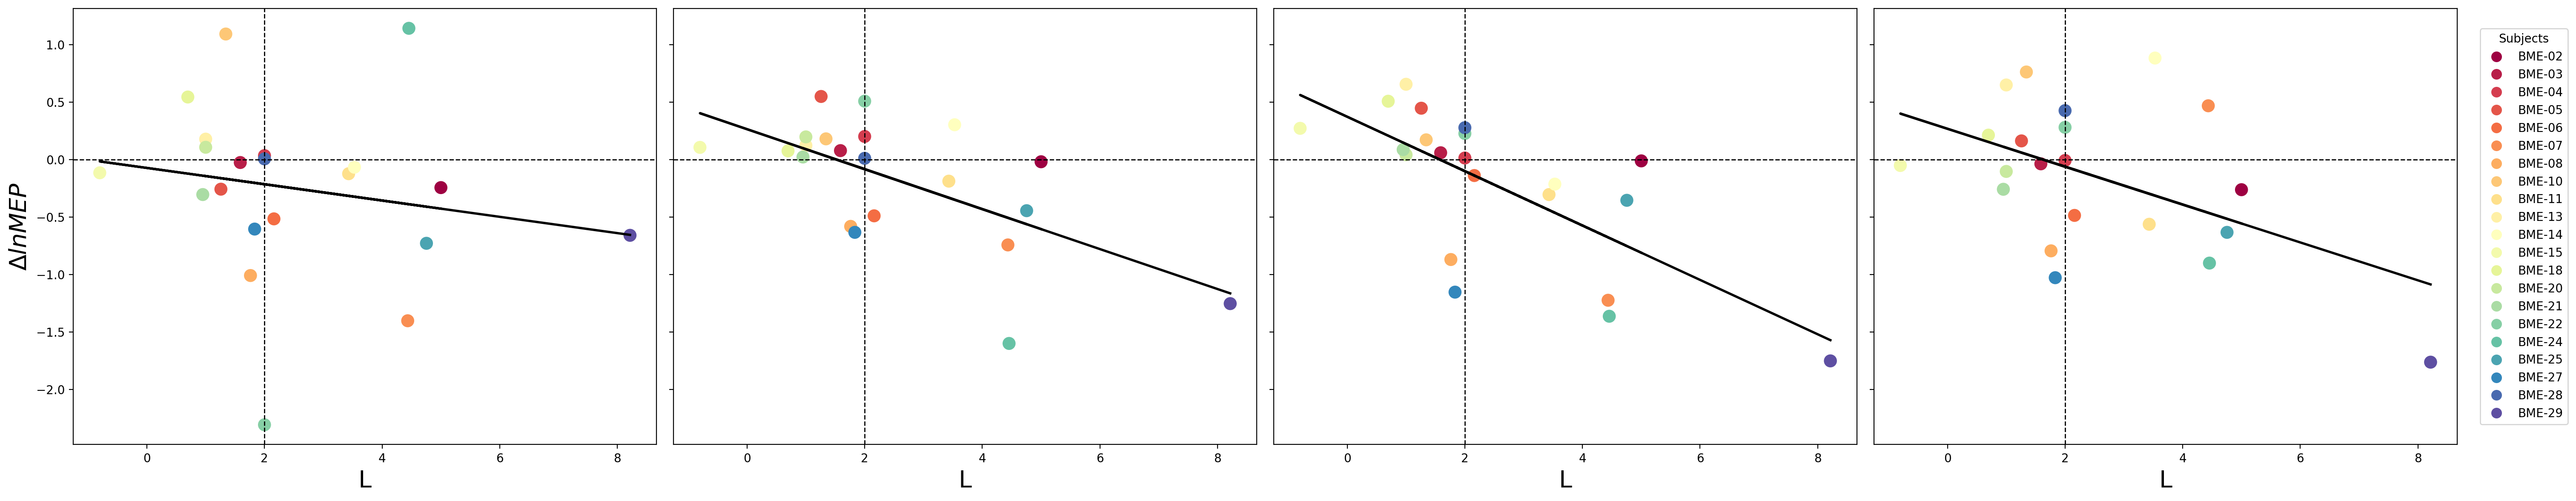

In [ ]:
#plot the change of L with different time point
import matplotlib.pyplot as plt
import numpy as np

diabetes = datasets.load_diabetes()
labels = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']

# for subject P0
x1 = L.reshape(-1,1)
y1 = P0.reshape(-1,1)
reg = LinearRegression().fit(x1, y1)
reg.score(x1, y1)
X2 = sm.add_constant(x1)
est = sm.OLS(y1, X2)
est2 = est.fit()
y_predict1 = reg.predict(x1)

# for subject P10
x2 = x1
y2 = P10.reshape(-1,1)
reg = LinearRegression().fit(x2, y2)
reg.score(x2, y2)
X2 = sm.add_constant(x2)
est = sm.OLS(y2, X2)
est2 = est.fit()
y_predict2 = reg.predict(x2)

x3 = x1
y3 = P20.reshape(-1,1)
reg = LinearRegression().fit(x3, y3)
reg.score(x3, y3)
X3 = sm.add_constant(x3)
est = sm.OLS(y3, X3)
est2 = est.fit()
y_predict3 = reg.predict(x3)

x4 = x1
y4 = P30.reshape(-1,1)
reg = LinearRegression().fit(x4, y4)
reg.score(x4, y4)
X4 = sm.add_constant(x4)
est = sm.OLS(y4, X4)
est2 = est.fit()
y_predict4 = reg.predict(x4)


fig, axes = plt.subplots(1, 4, figsize=(30, 6), sharey=True)
median=np.median(x1)
# plot all the figures
axes[0].plot(x1,y_predict1,color='black',linewidth=2)
axes[0].set_xlabel("L",fontsize=20)
axes[0].set_ylabel(r"$\Delta lnMEP$",fontsize=20)
axes[0].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[0].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[0].scatter(x1, y1, c=colors, s=100)
axes[0].legend().remove()




axes[1].plot(x2, y_predict2,color='black',linewidth=2)
axes[1].set_xlabel("L",fontsize=20)
axes[1].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[1].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[1].scatter(x2, y2, c=colors, s=100)
axes[1].legend().remove()




axes[2].plot(x3, y_predict3,color='black',linewidth=2)
axes[2].set_xlabel("L",fontsize=20)
axes[2].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[2].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[2].scatter(x3, y3, c=colors, s=100)
axes[2].legend().remove()



axes[3].plot(x4, y_predict4,color='black',linewidth=2)
axes[3].set_xlabel("L",fontsize=20)
axes[3].axhline(y=0, color='black', linestyle='--',linewidth=1)
axes[3].axvline(x=median, color='black', linestyle='--',linewidth=1)
colors = plt.cm.Spectral(np.linspace(0, 1, 21))
scatter = axes[3].scatter(x4, y4, c=colors, s=100)

legend_elements = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
axes[3].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 0.5), title="Subjects")

# modify the figure
plt.tight_layout()
plt.show()

R-squared: 0.034465461215475335
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6782
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.420
Time:                        03:28:57   Log-Likelihood:                -23.256
No. Observations:                  21   AIC:                             50.51
Df Residuals:                      19   BIC:                             52.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.072

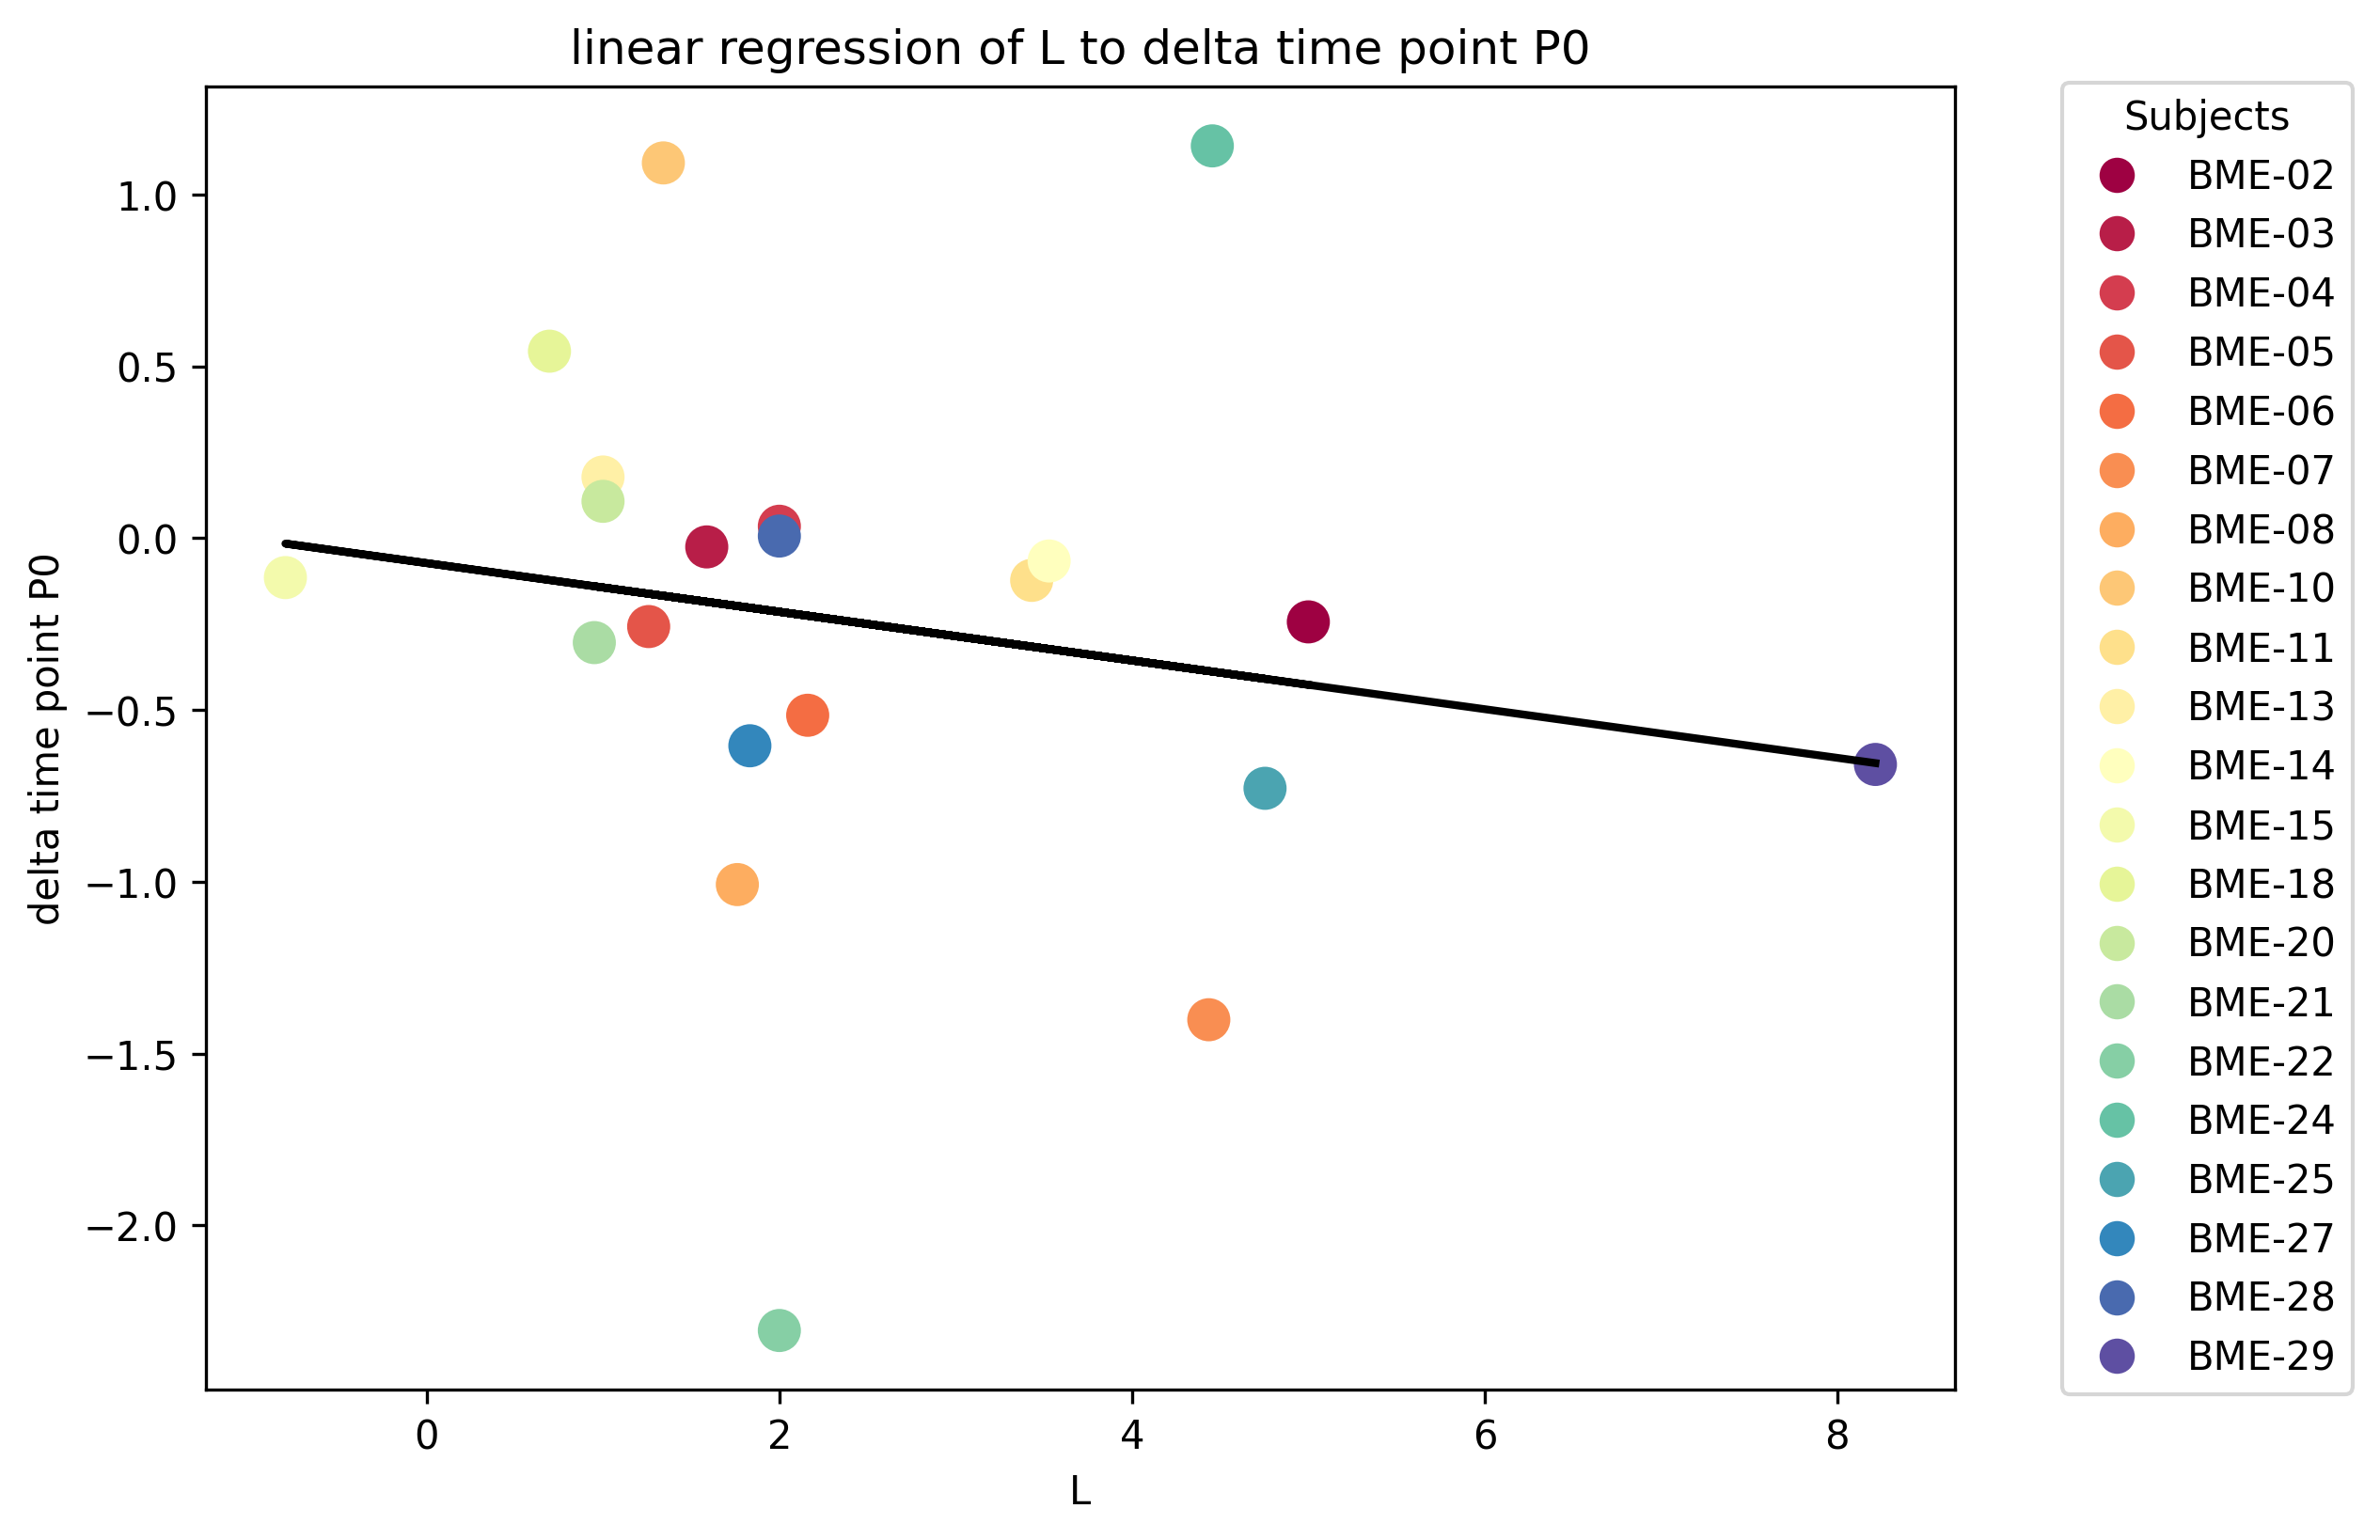

In [ ]:
#plot the linear fit of L with P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = L
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('L')
plt.ylabel('delta time point P0')
plt.title('linear regression of L to delta time point P0')
plt.show()

R-squared: 0.3982183381608775
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     12.57
Date:                Sat, 14 Dec 2024   Prob (F-statistic):            0.00216
Time:                        03:28:58   Log-Likelihood:                -11.436
No. Observations:                  21   AIC:                             26.87
Df Residuals:                      19   BIC:                             28.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642 

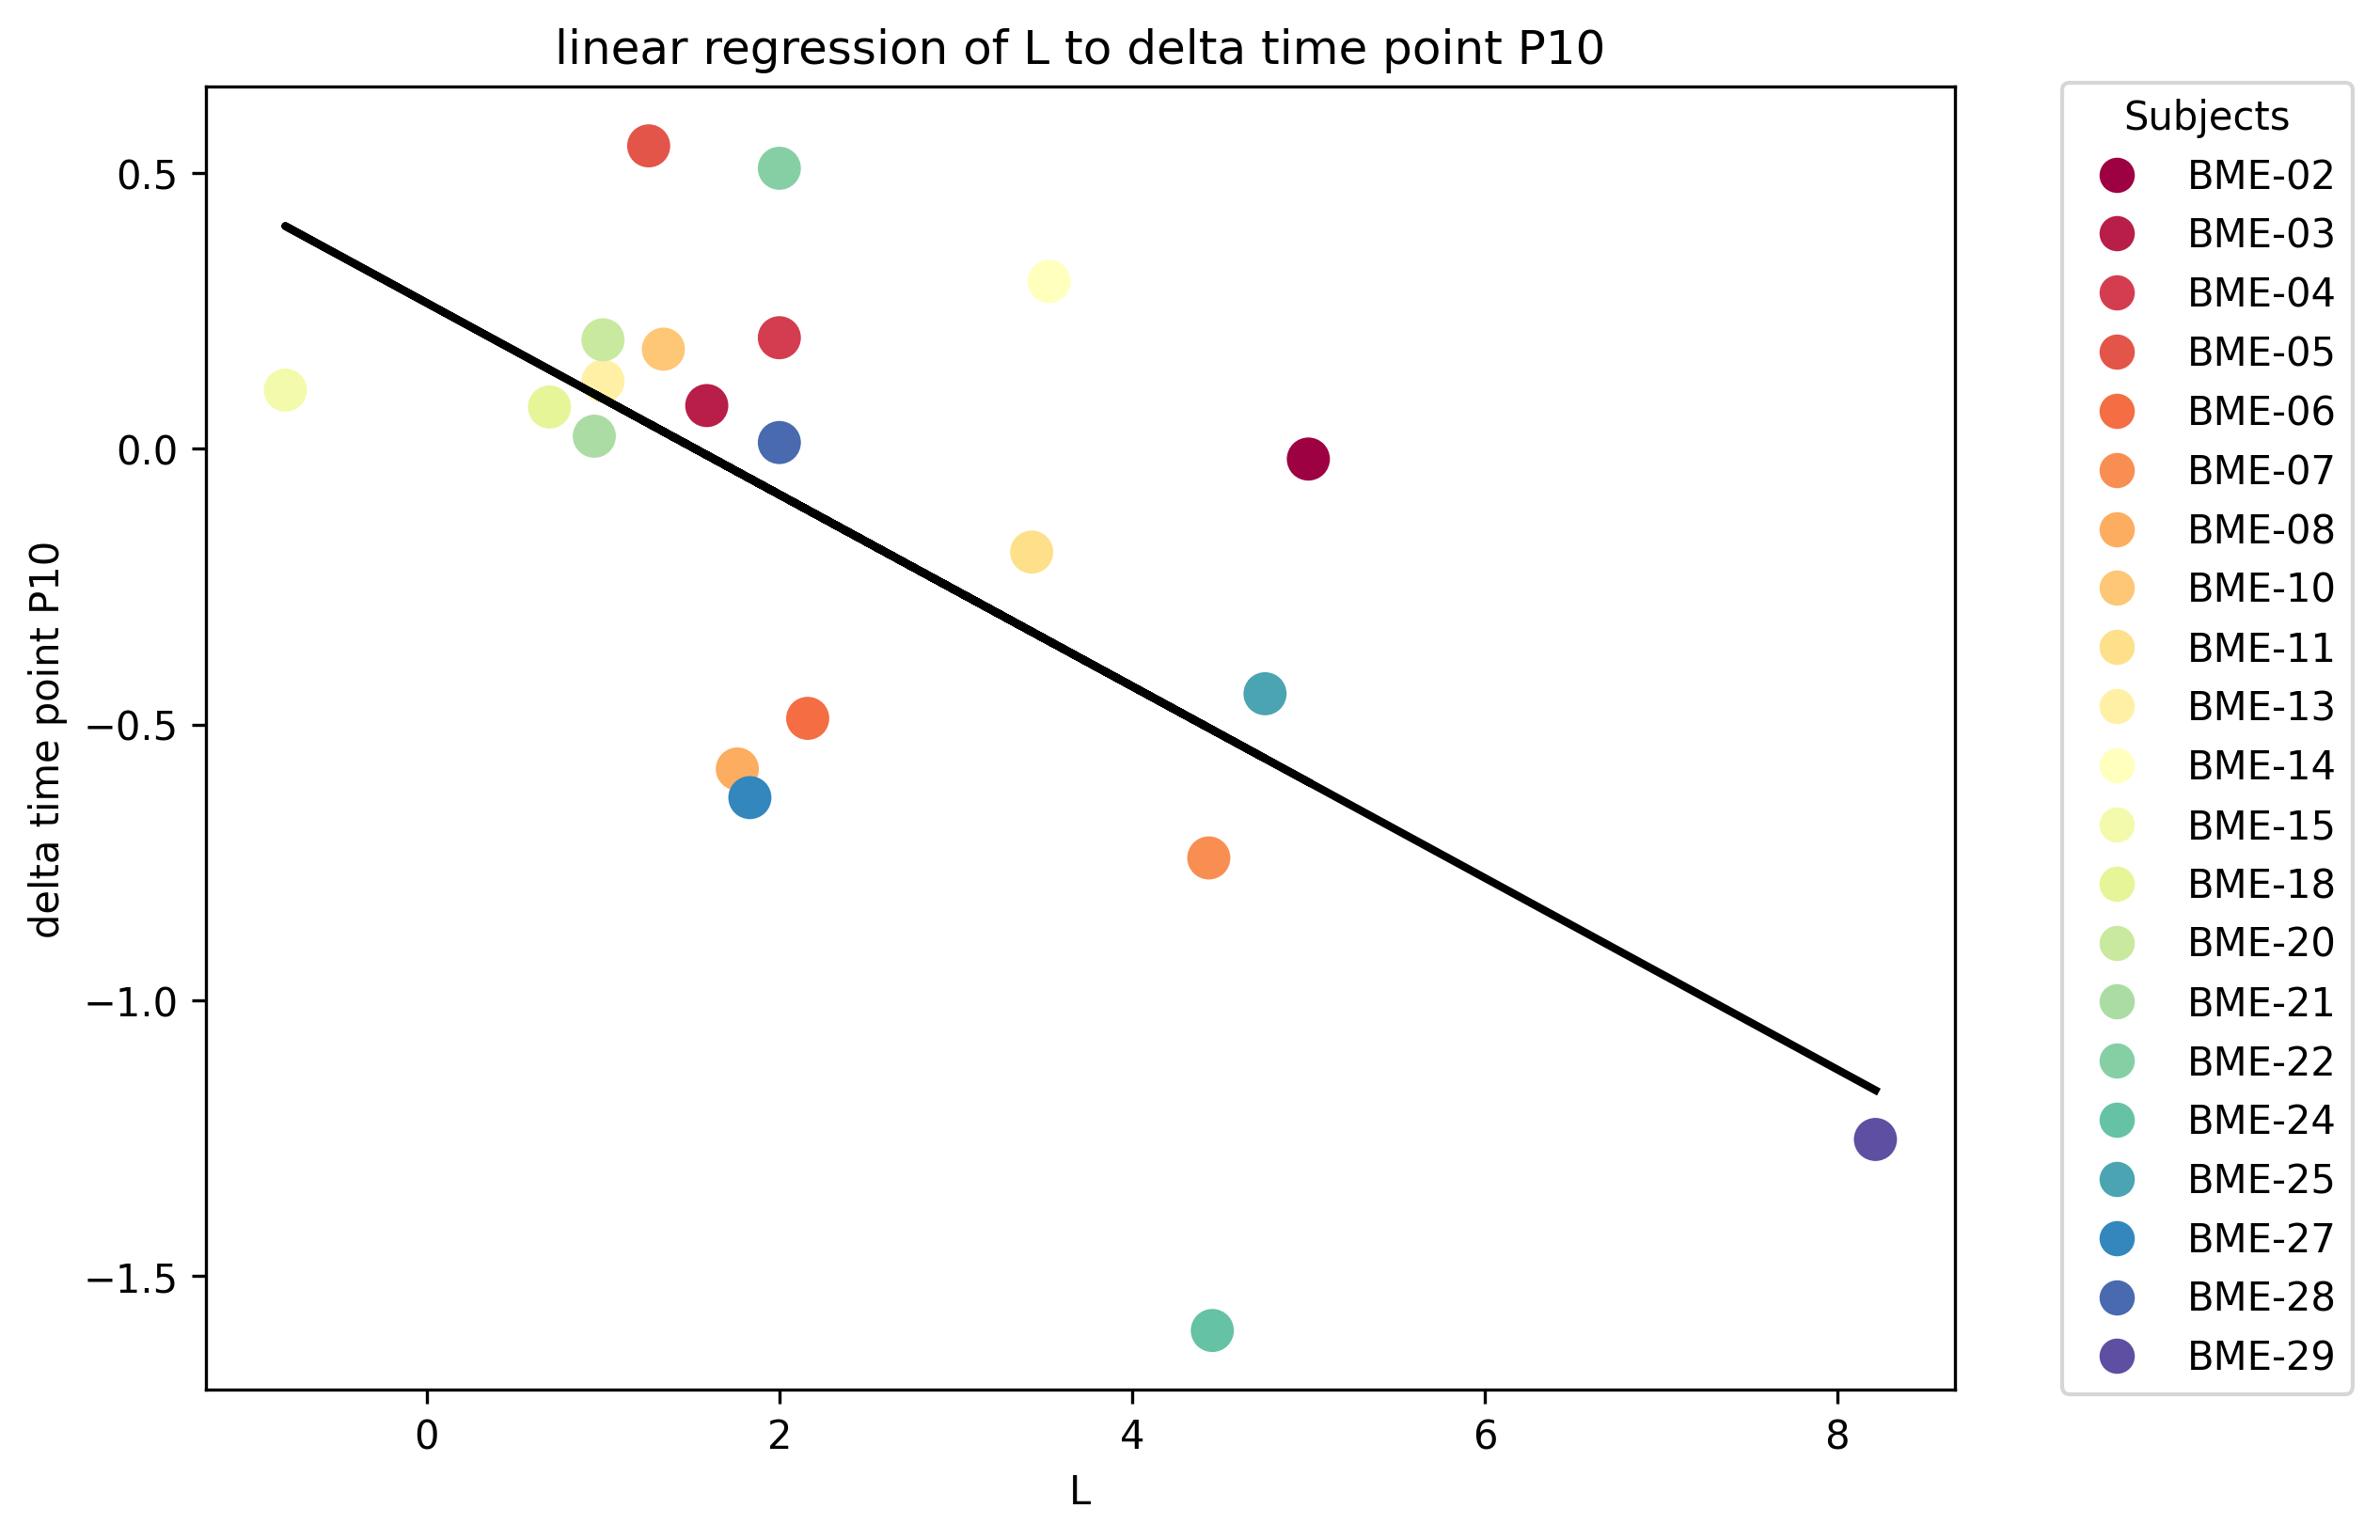

In [ ]:
#plot the linear fit of L with P10
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = L
y = P10
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('L')
plt.ylabel('delta time point P10')
plt.title('linear regression of L to delta time point P10')
plt.show()

R-squared: 0.5033929452008767
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     19.26
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           0.000316
Time:                        03:28:59   Log-Likelihood:                -13.430
No. Observations:                  21   AIC:                             30.86
Df Residuals:                      19   BIC:                             32.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3723 

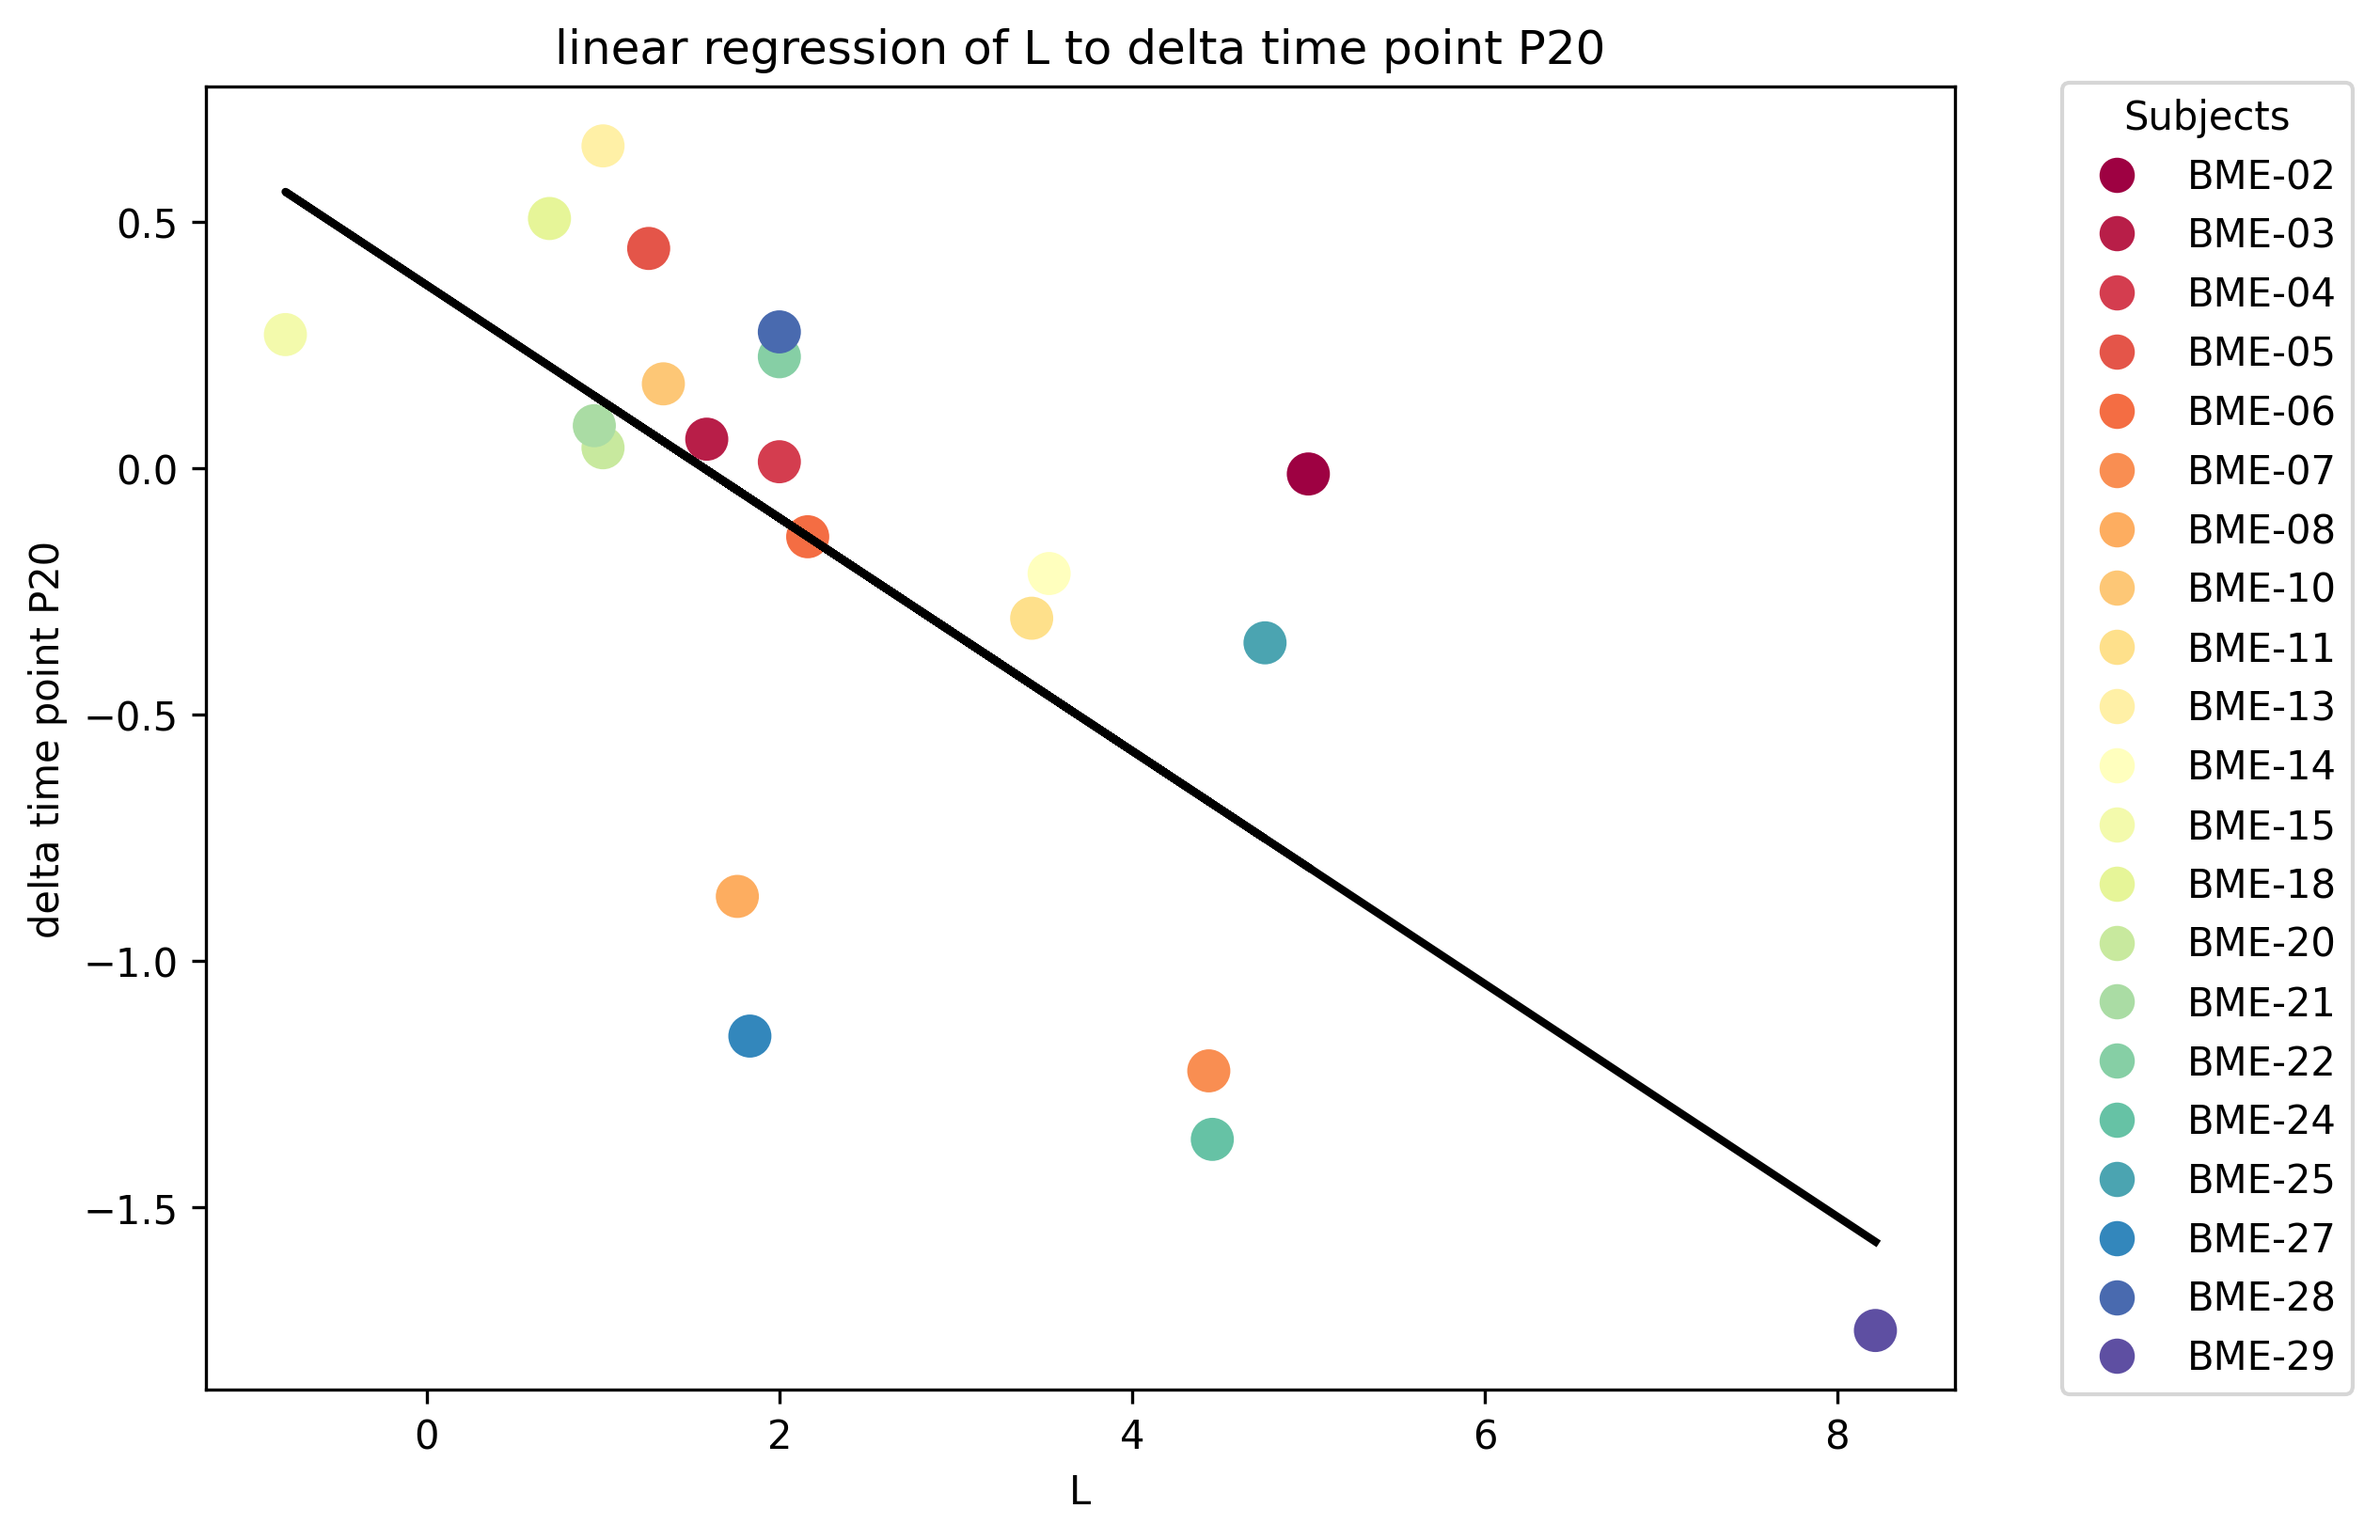

In [ ]:
#plot the linear fit of L with P20
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = L
y = P20
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('L')
plt.ylabel('delta time point P20')
plt.title('linear regression of L to delta time point P20')
plt.show()

R-squared: 0.25307179063985885
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     6.438
Date:                Sat, 14 Dec 2024   Prob (F-statistic):             0.0201
Time:                        03:29:00   Log-Likelihood:                -17.349
No. Observations:                  21   AIC:                             38.70
Df Residuals:                      19   BIC:                             40.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2680

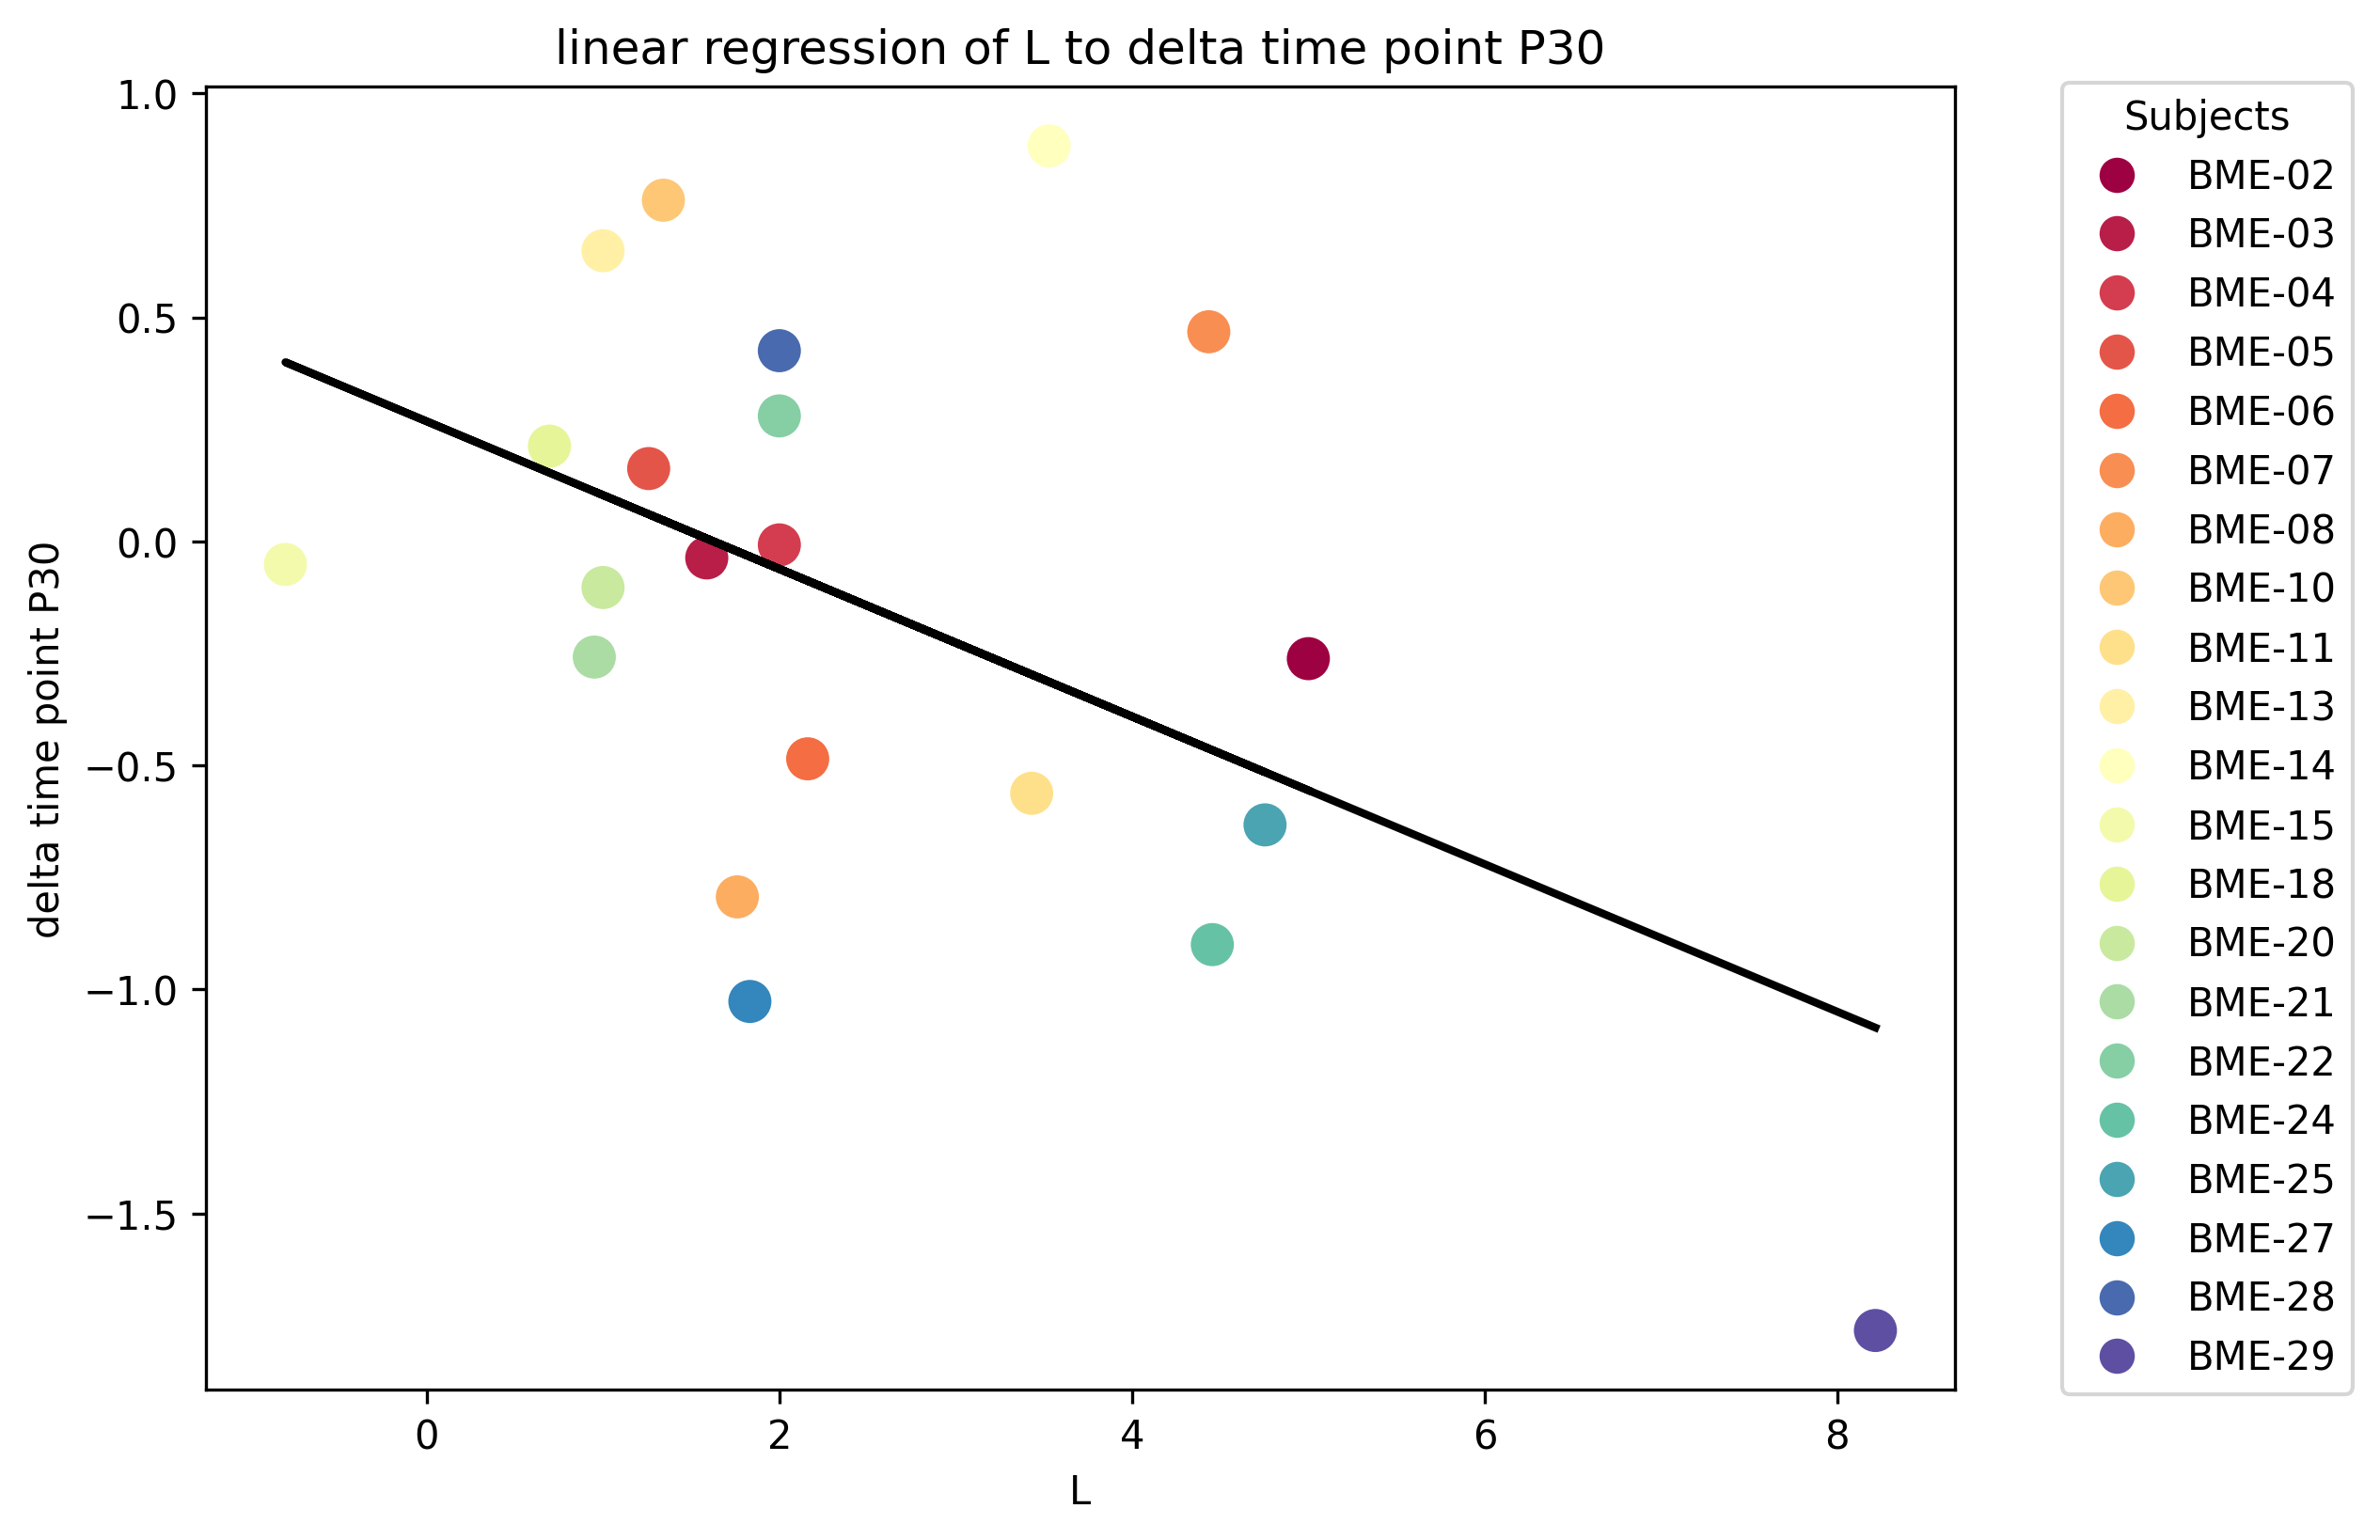

In [ ]:
#plot the linear fit of L with P30
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = L
y = P30
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('L')
plt.ylabel('delta time point P30')
plt.title('linear regression of L to delta time point P30')
plt.show()

R-squared: 0.0022627239289952916
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                   0.04309
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.838
Time:                        03:29:01   Log-Likelihood:                -23.600
No. Observations:                  21   AIC:                             51.20
Df Residuals:                      19   BIC:                             53.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.23

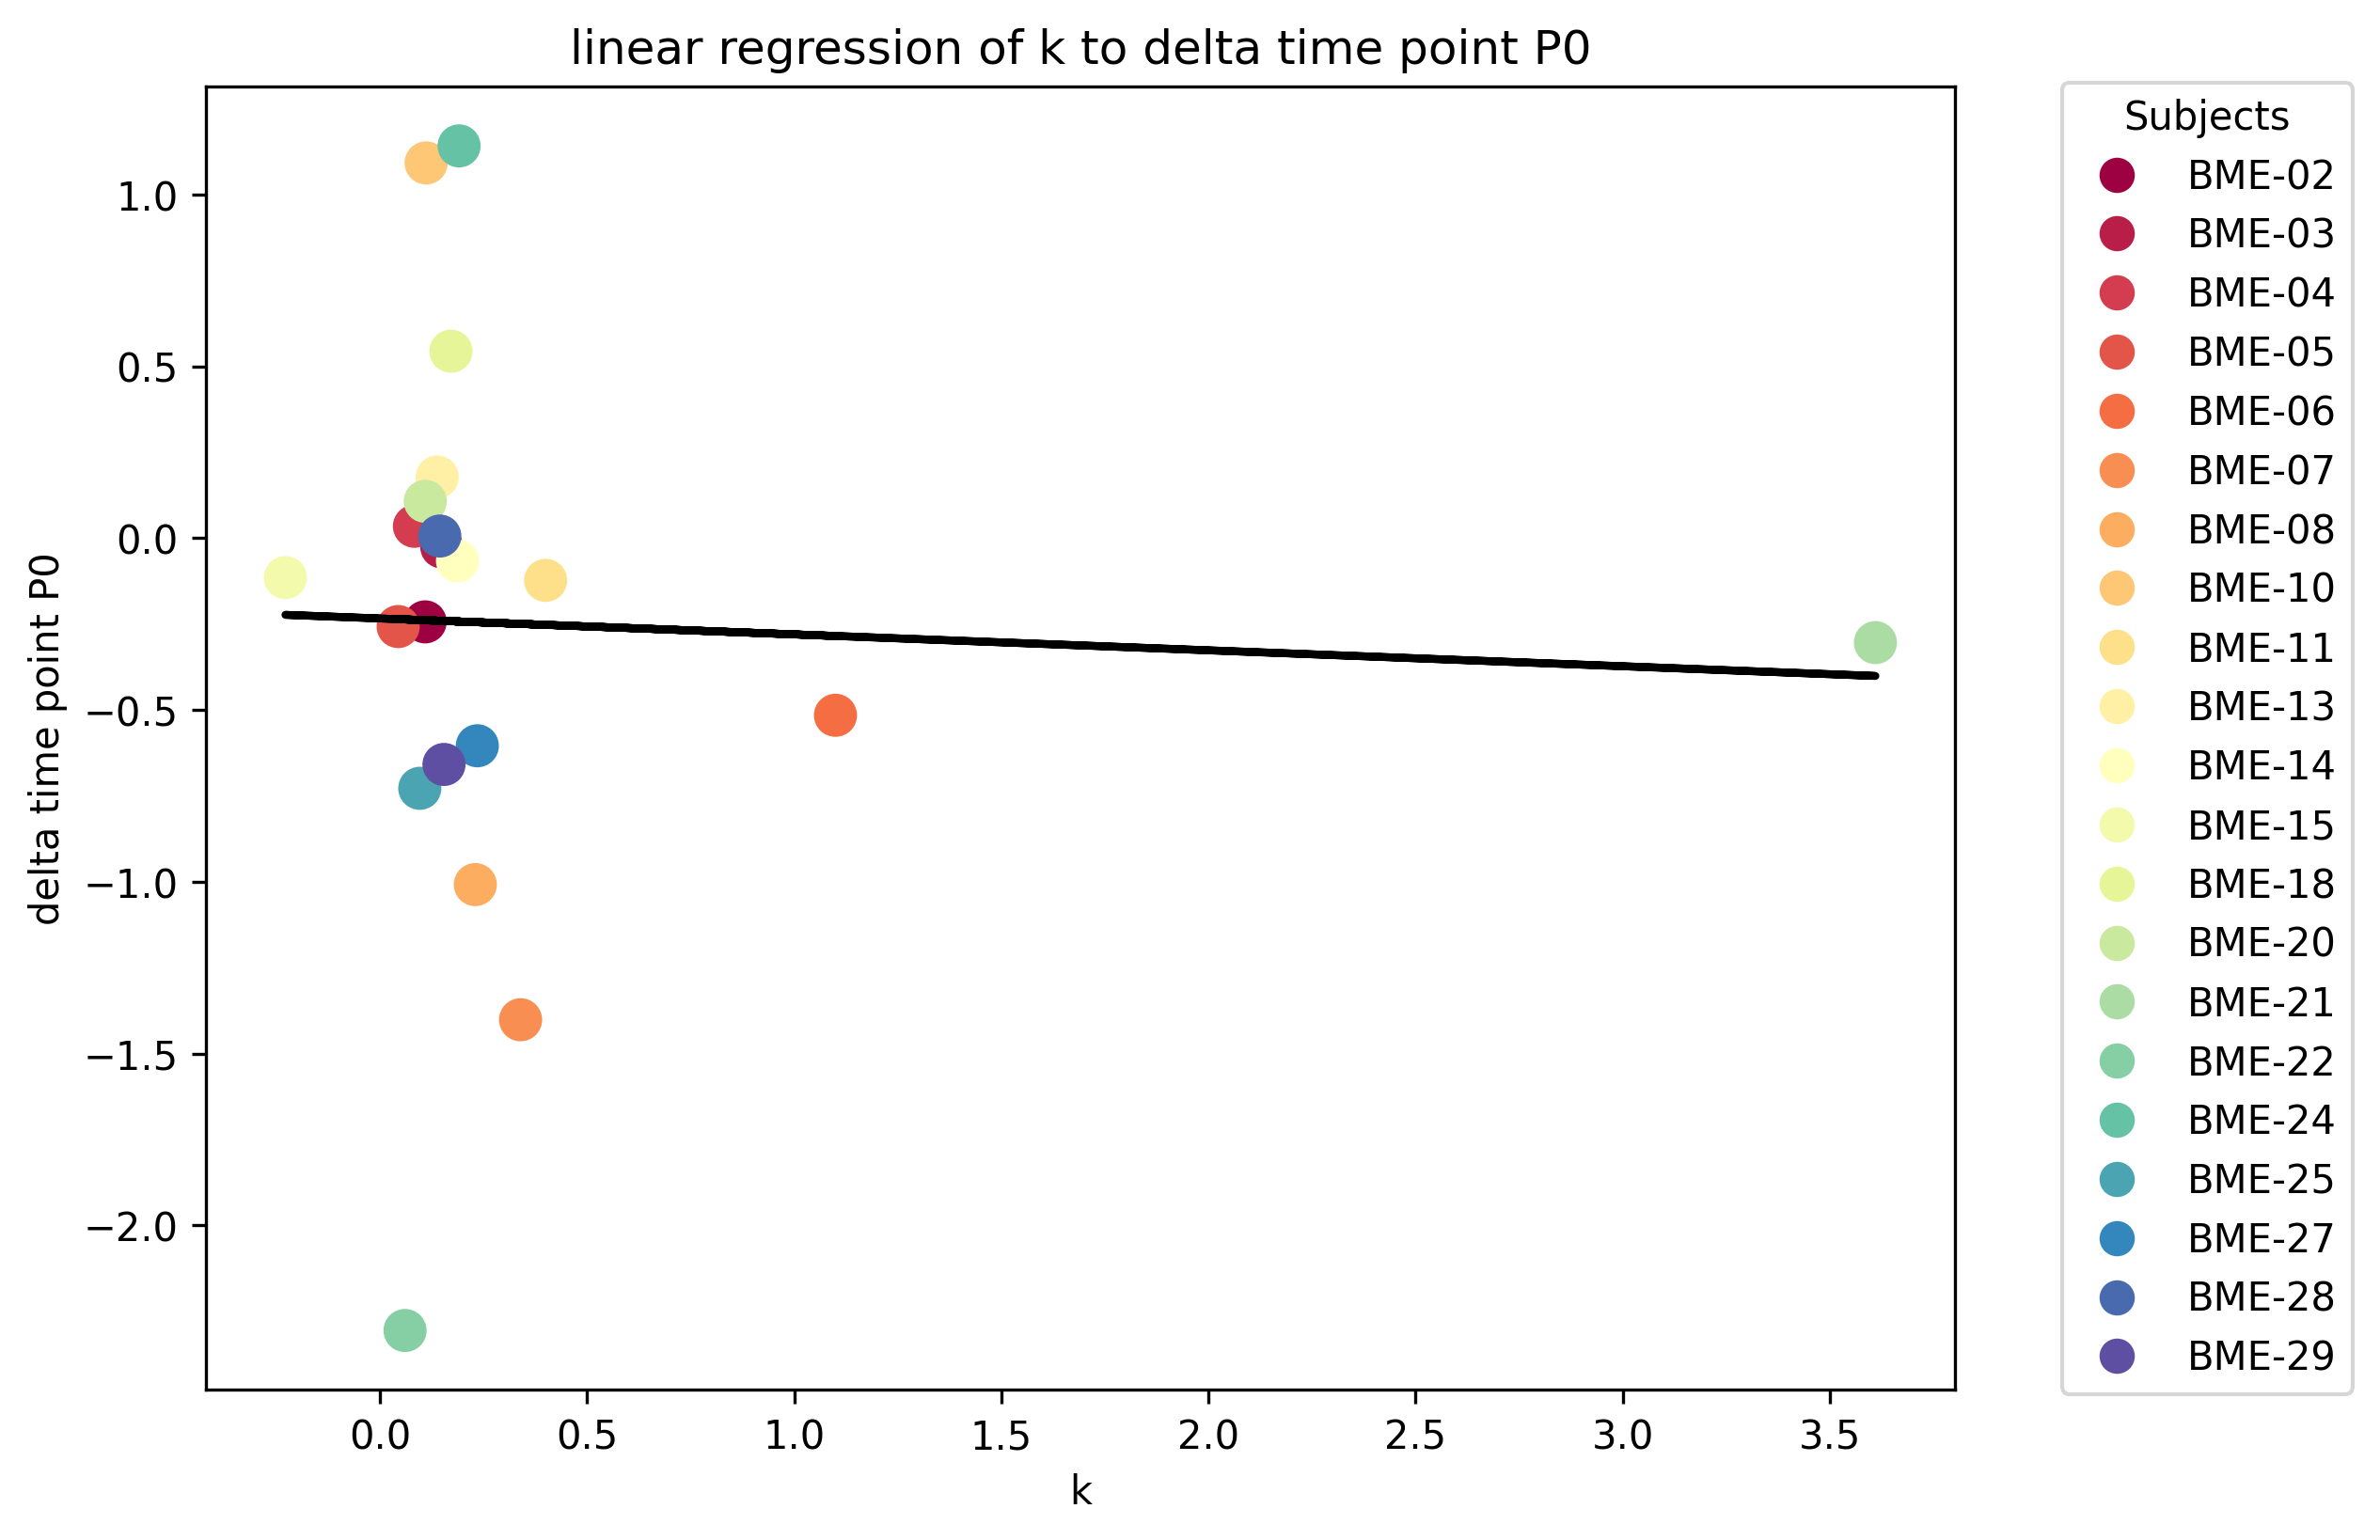

In [ ]:
#plot the linear fit of k with P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = k
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('k')
plt.ylabel('delta time point P0')
plt.title('linear regression of k to delta time point P0')
plt.show()

R-squared: 0.0002958033577999952
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                  0.005622
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.941
Time:                        03:29:02   Log-Likelihood:                -16.766
No. Observations:                  21   AIC:                             37.53
Df Residuals:                      19   BIC:                             39.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.16

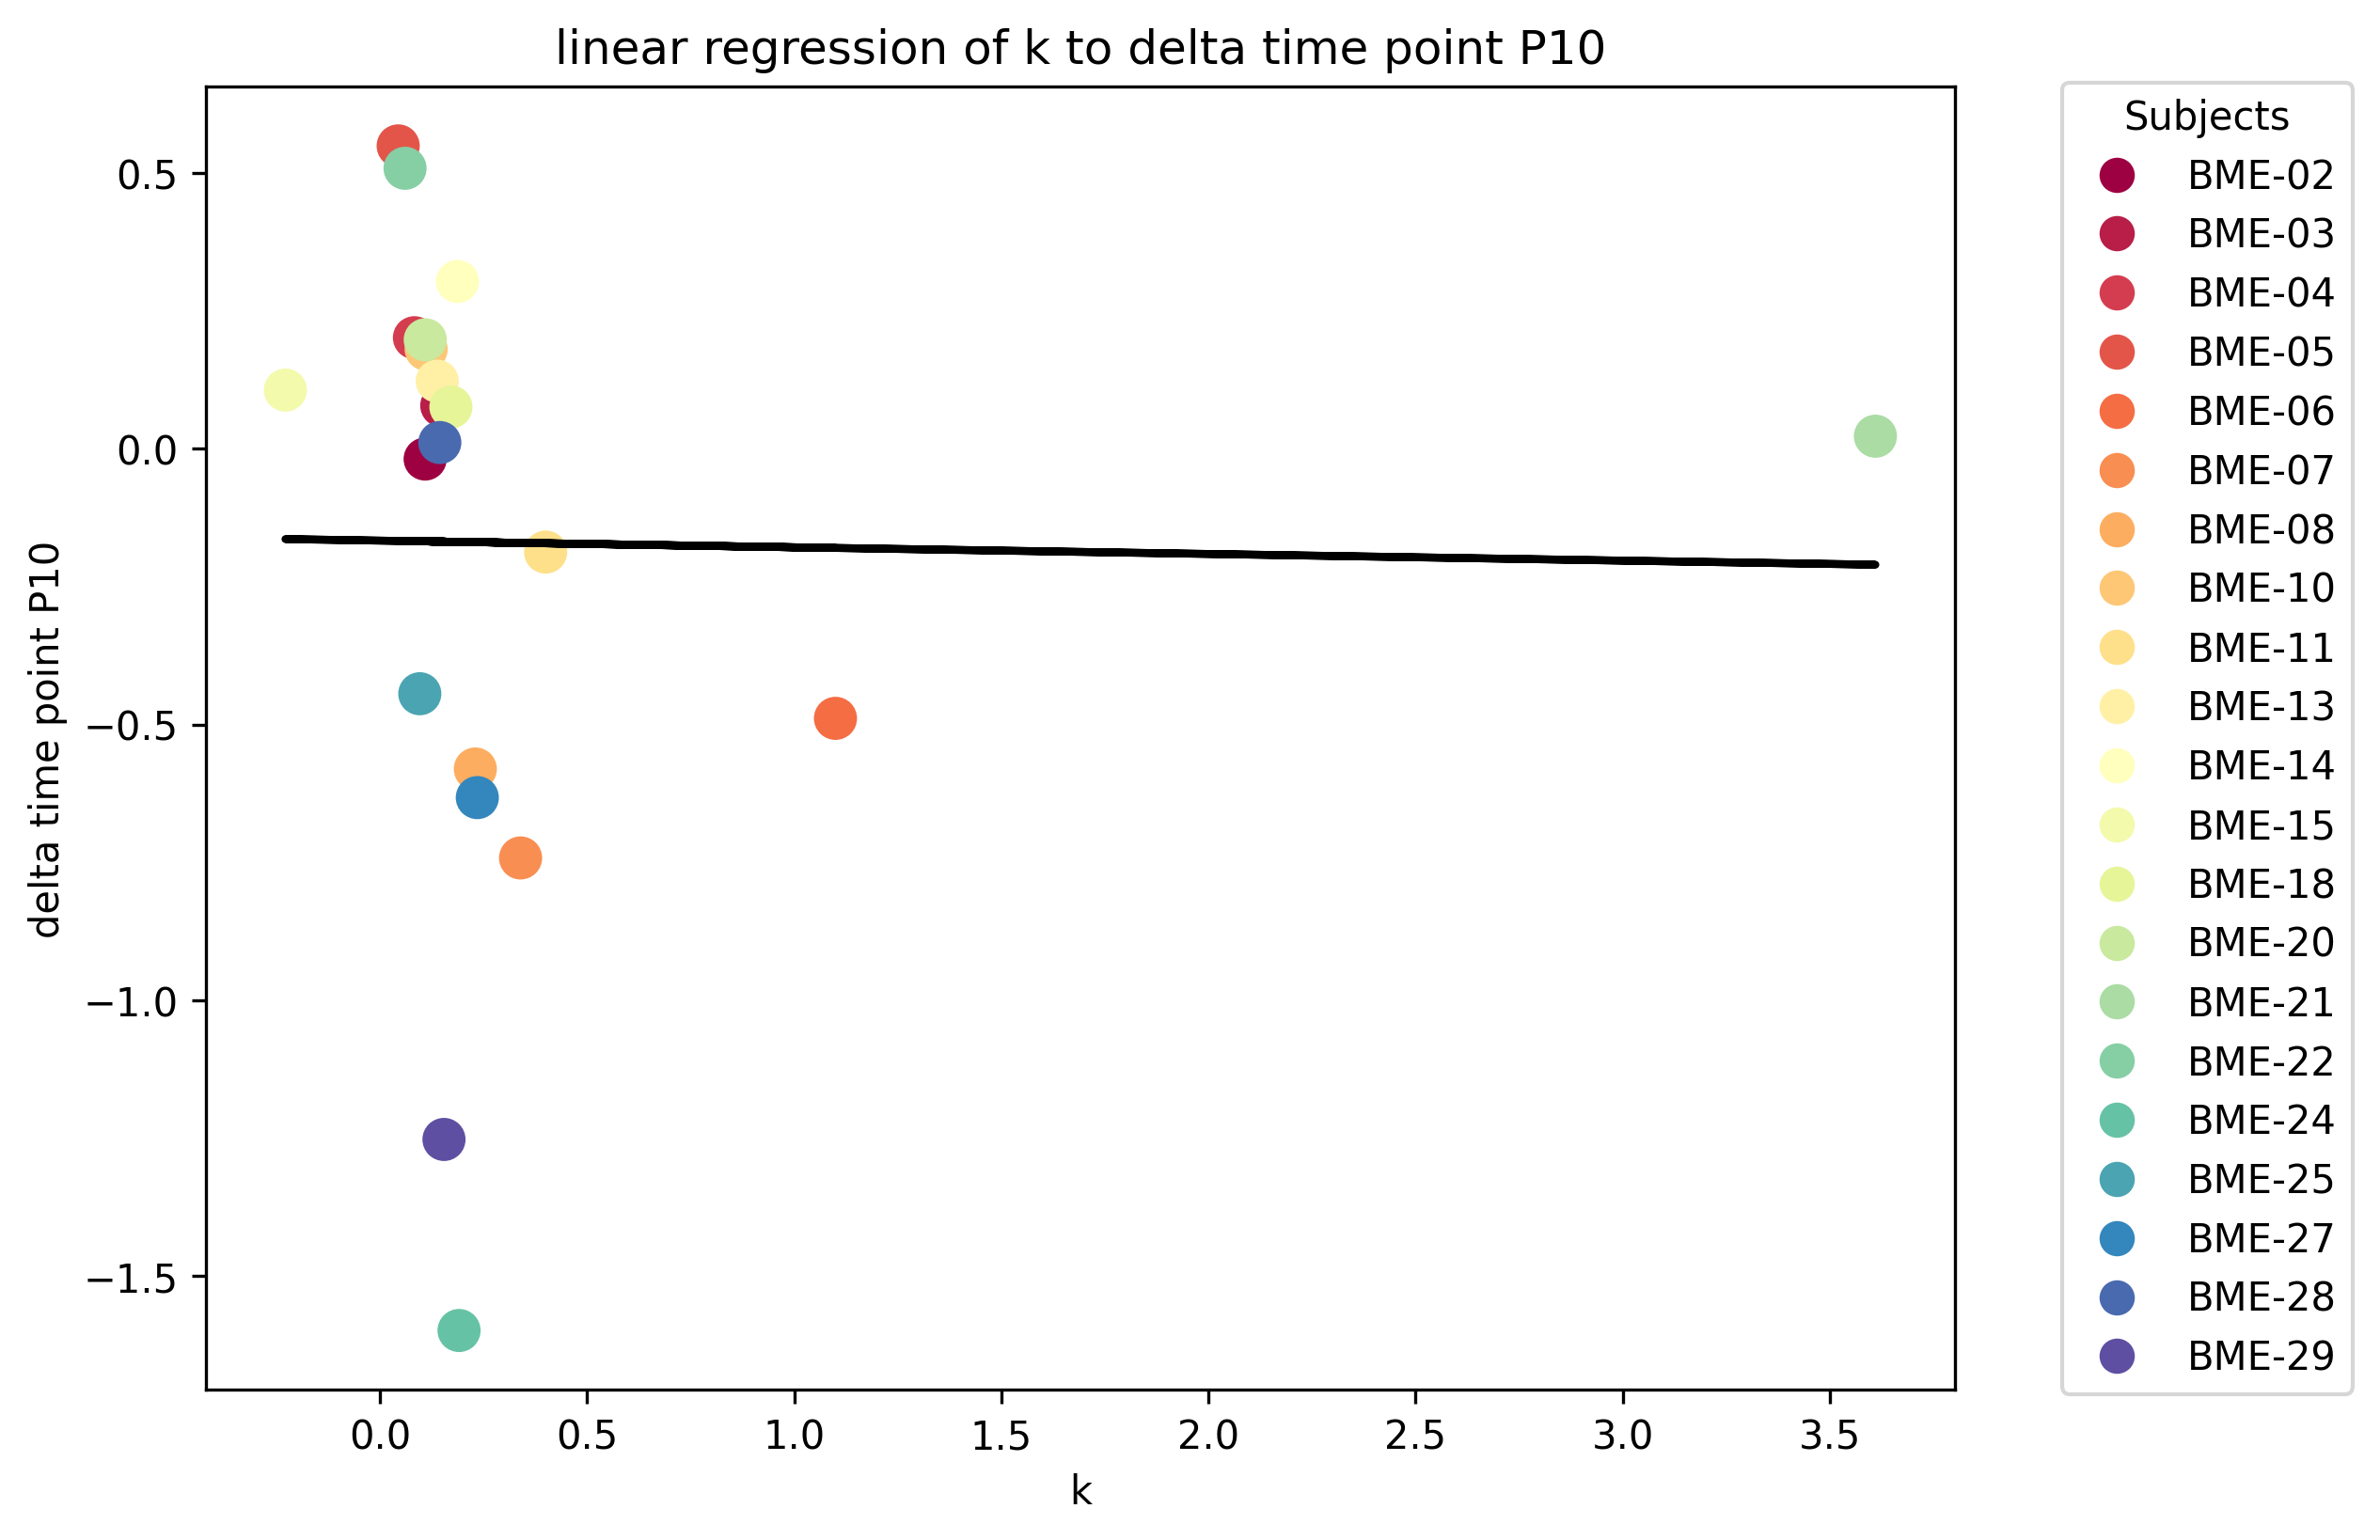

In [ ]:
#plot the linear fit of k with P10
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = k
y = P10
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('k')
plt.ylabel('delta time point P10')
plt.title('linear regression of k to delta time point P10')
plt.show()

R-squared: 0.0015067169247194867
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.02867
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.867
Time:                        03:29:03   Log-Likelihood:                -20.764
No. Observations:                  21   AIC:                             45.53
Df Residuals:                      19   BIC:                             47.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.23

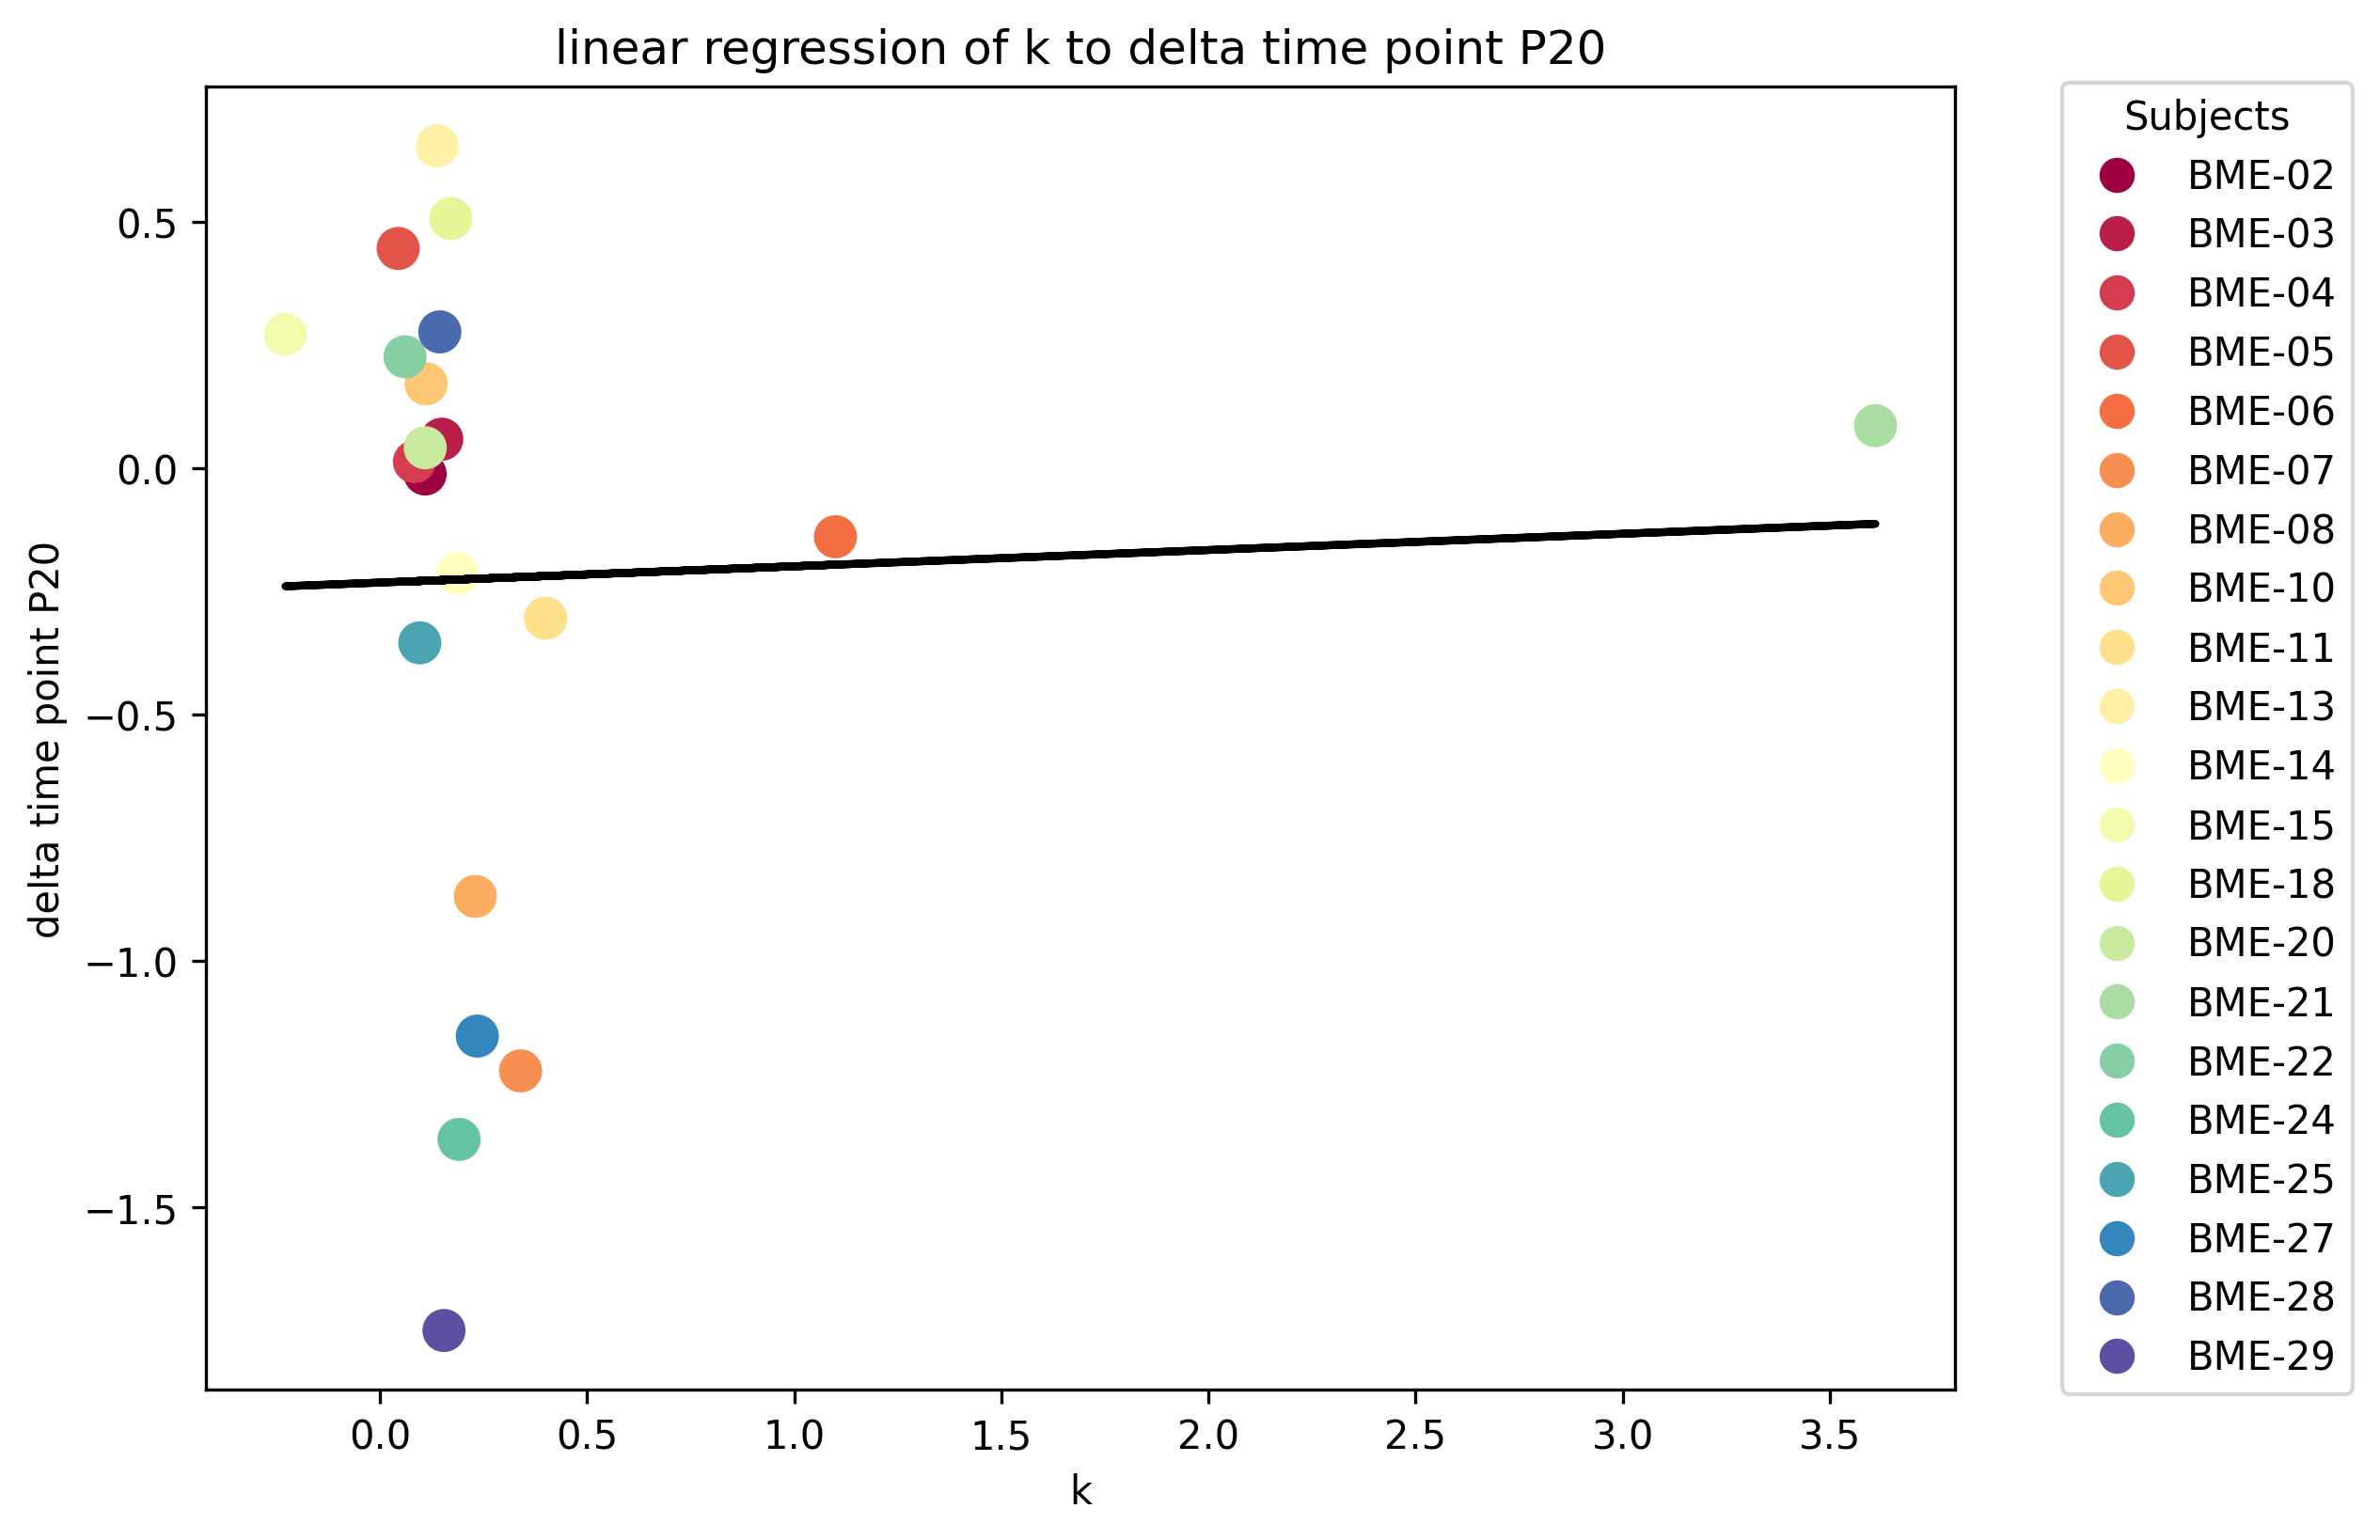

In [ ]:
#plot the linear fit of k with P20
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = k
y = P20
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('k')
plt.ylabel('delta time point P20')
plt.title('linear regression of k to delta time point P20')
plt.show()

R-squared: 0.008678376749397088
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.1663
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.688
Time:                        03:29:04   Log-Likelihood:                -20.321
No. Observations:                  21   AIC:                             44.64
Df Residuals:                      19   BIC:                             46.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.117

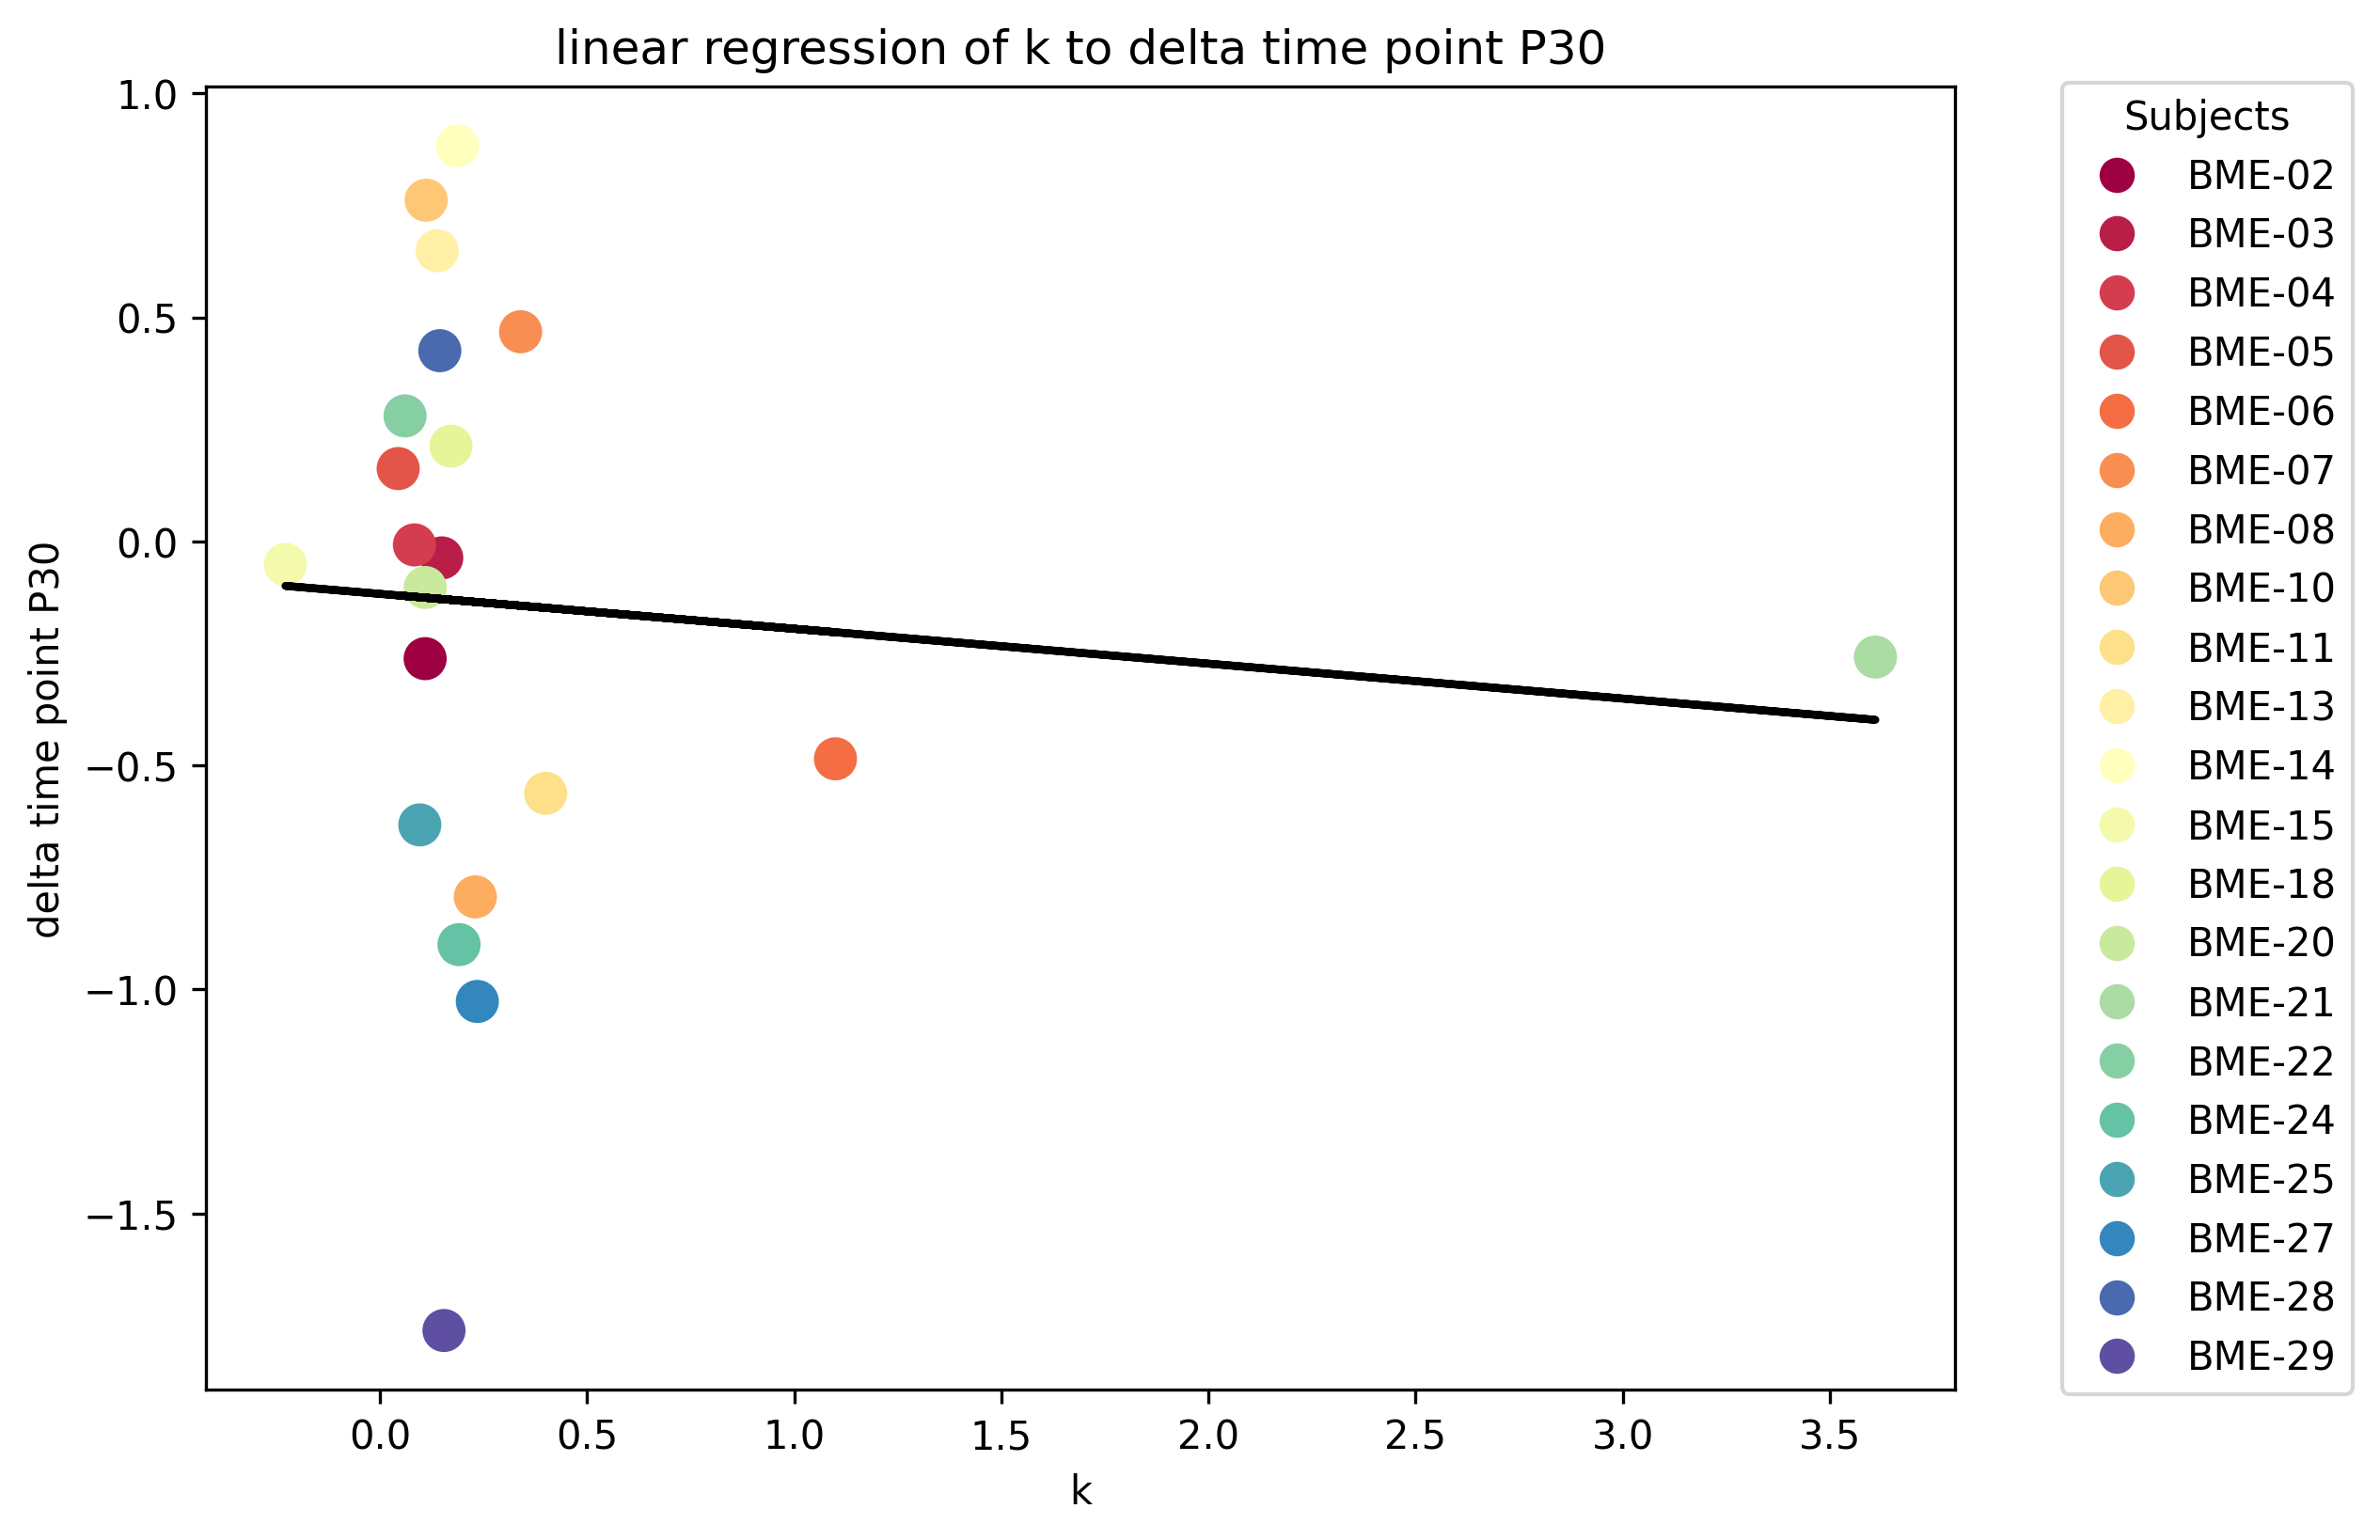

In [ ]:
#plot the linear fit of k with P30
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = k
y = P30
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('k')
plt.ylabel('delta time point P30')
plt.title('linear regression of k to delta time point P30')
plt.show()

R-squared: 0.0032595168811911934
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.06213
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.806
Time:                        03:29:05   Log-Likelihood:                -23.590
No. Observations:                  21   AIC:                             51.18
Df Residuals:                      19   BIC:                             53.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.29

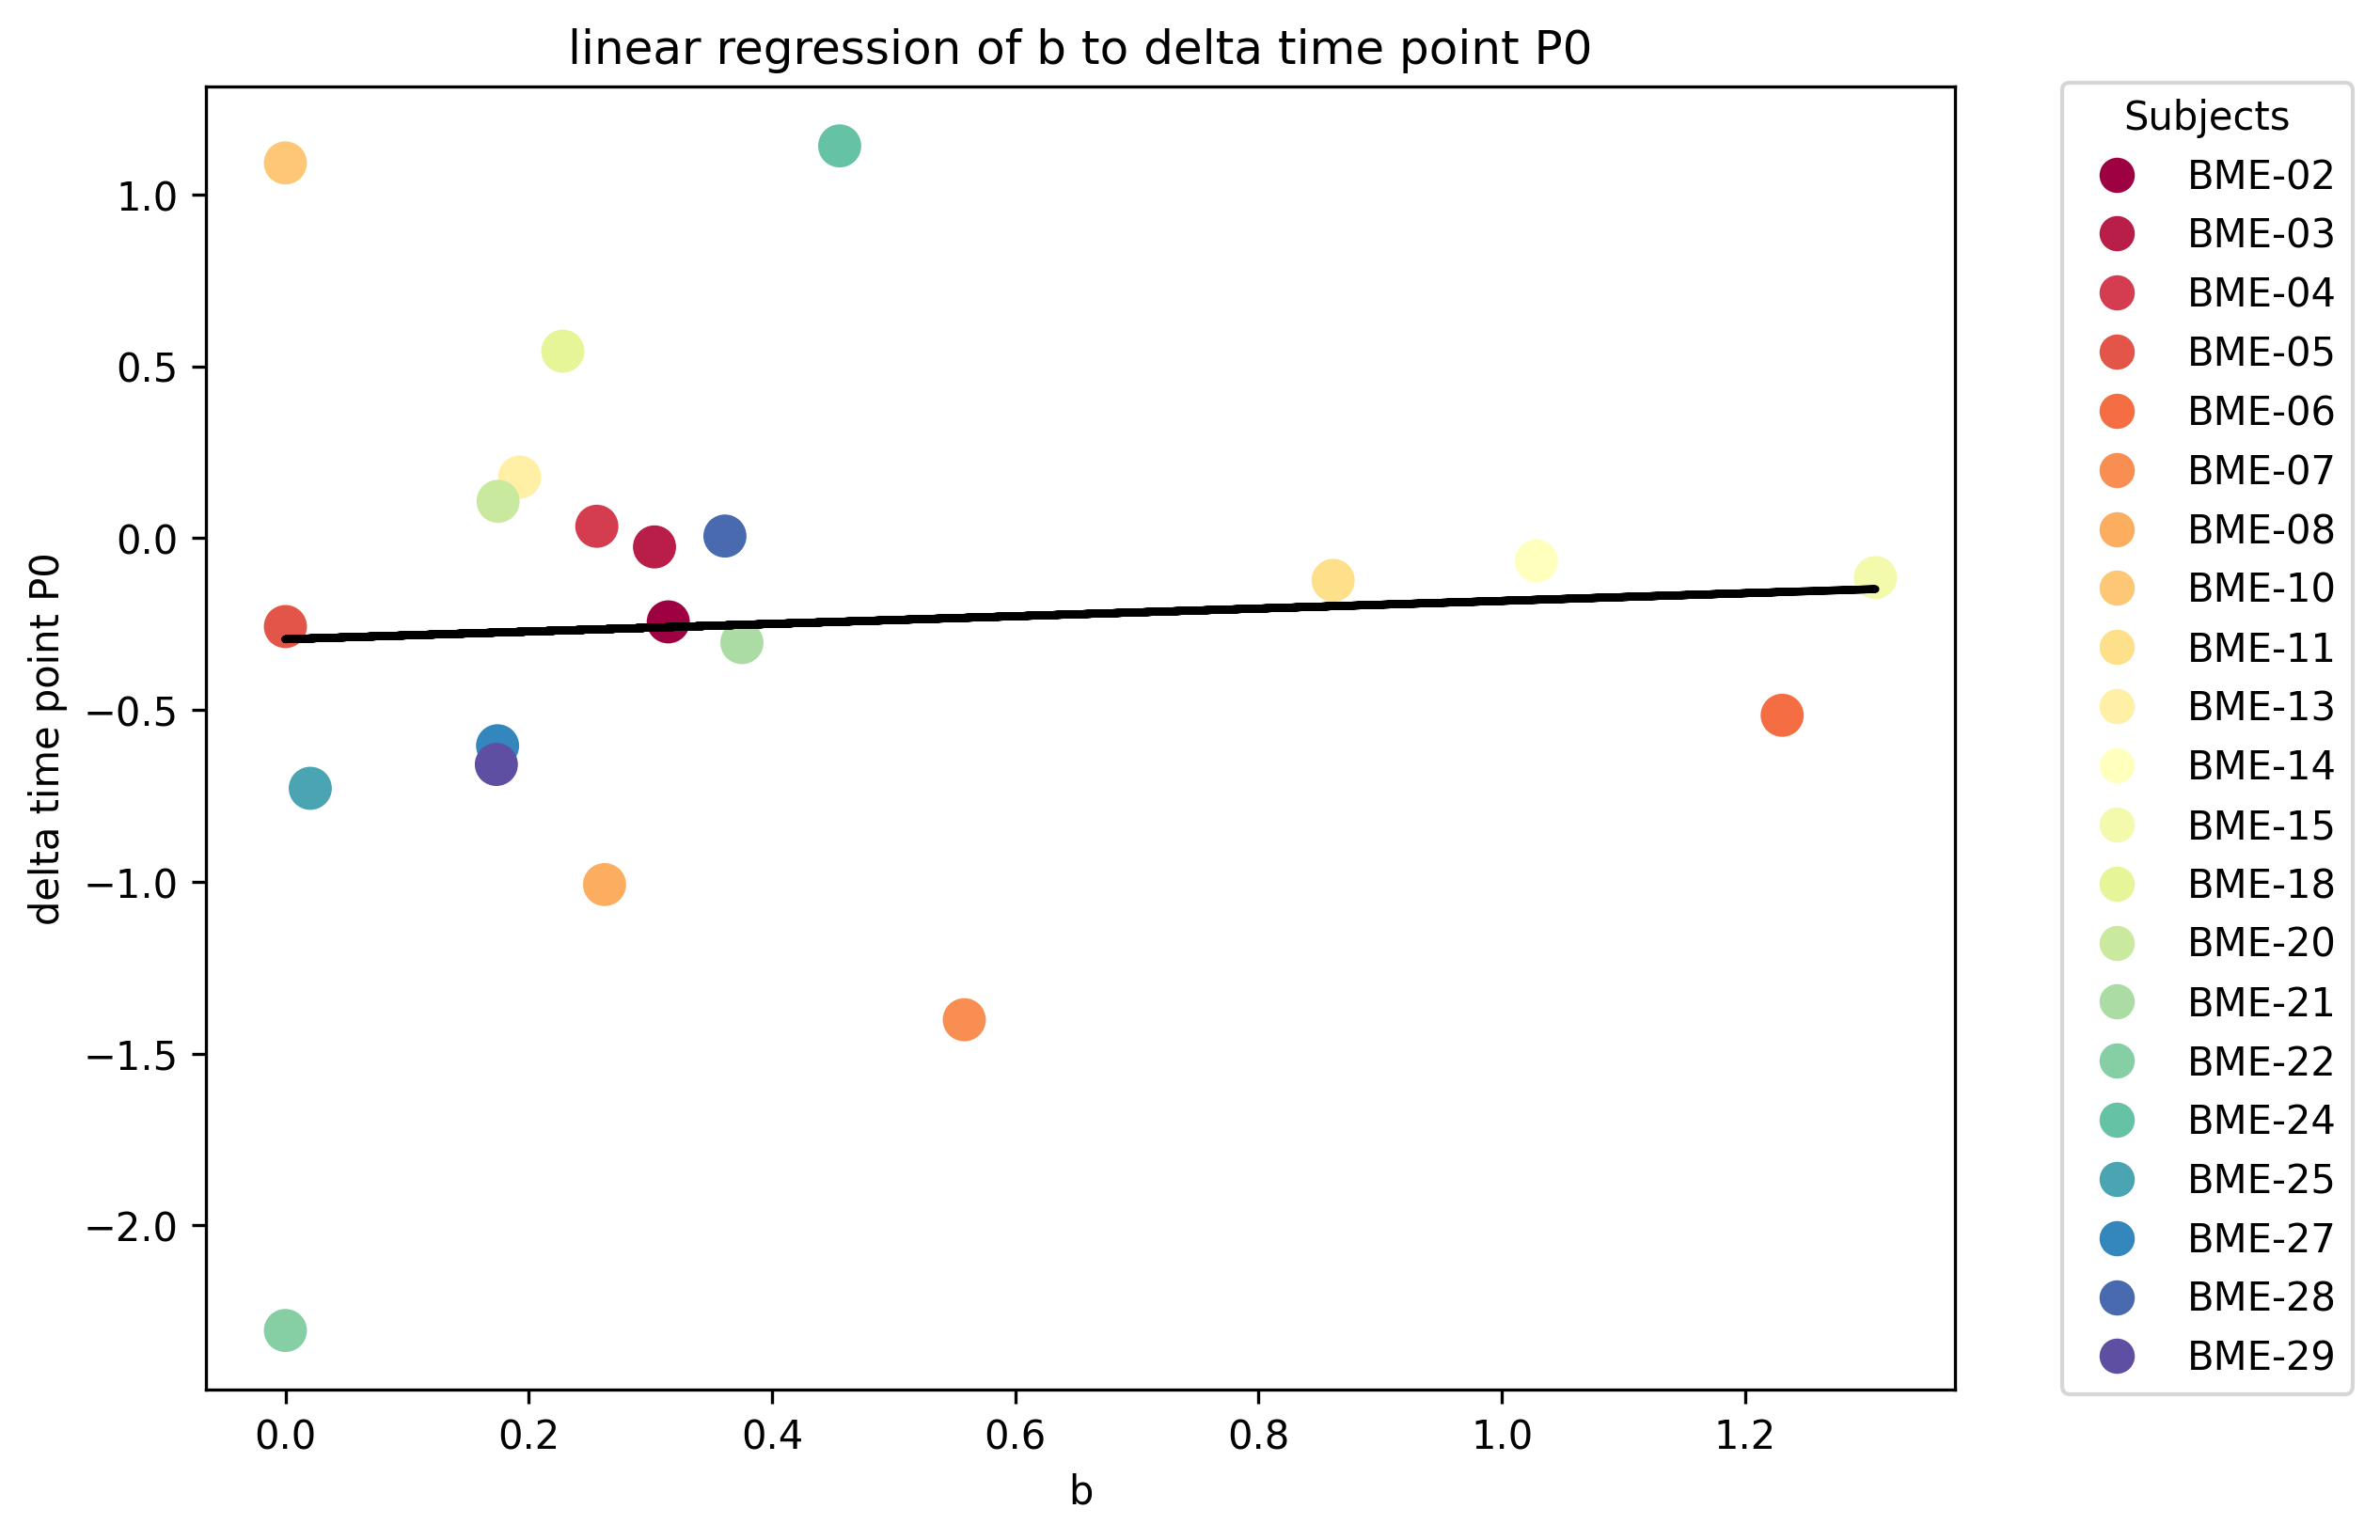

In [ ]:
#plot the linear fit of b with P0
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = b
y = P0
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('b')
plt.ylabel('delta time point P0')
plt.title('linear regression of b to delta time point P0')
plt.show()

R-squared: 0.00744369594909533
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.1425
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.710
Time:                        03:29:06   Log-Likelihood:                -16.690
No. Observations:                  21   AIC:                             37.38
Df Residuals:                      19   BIC:                             39.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1231

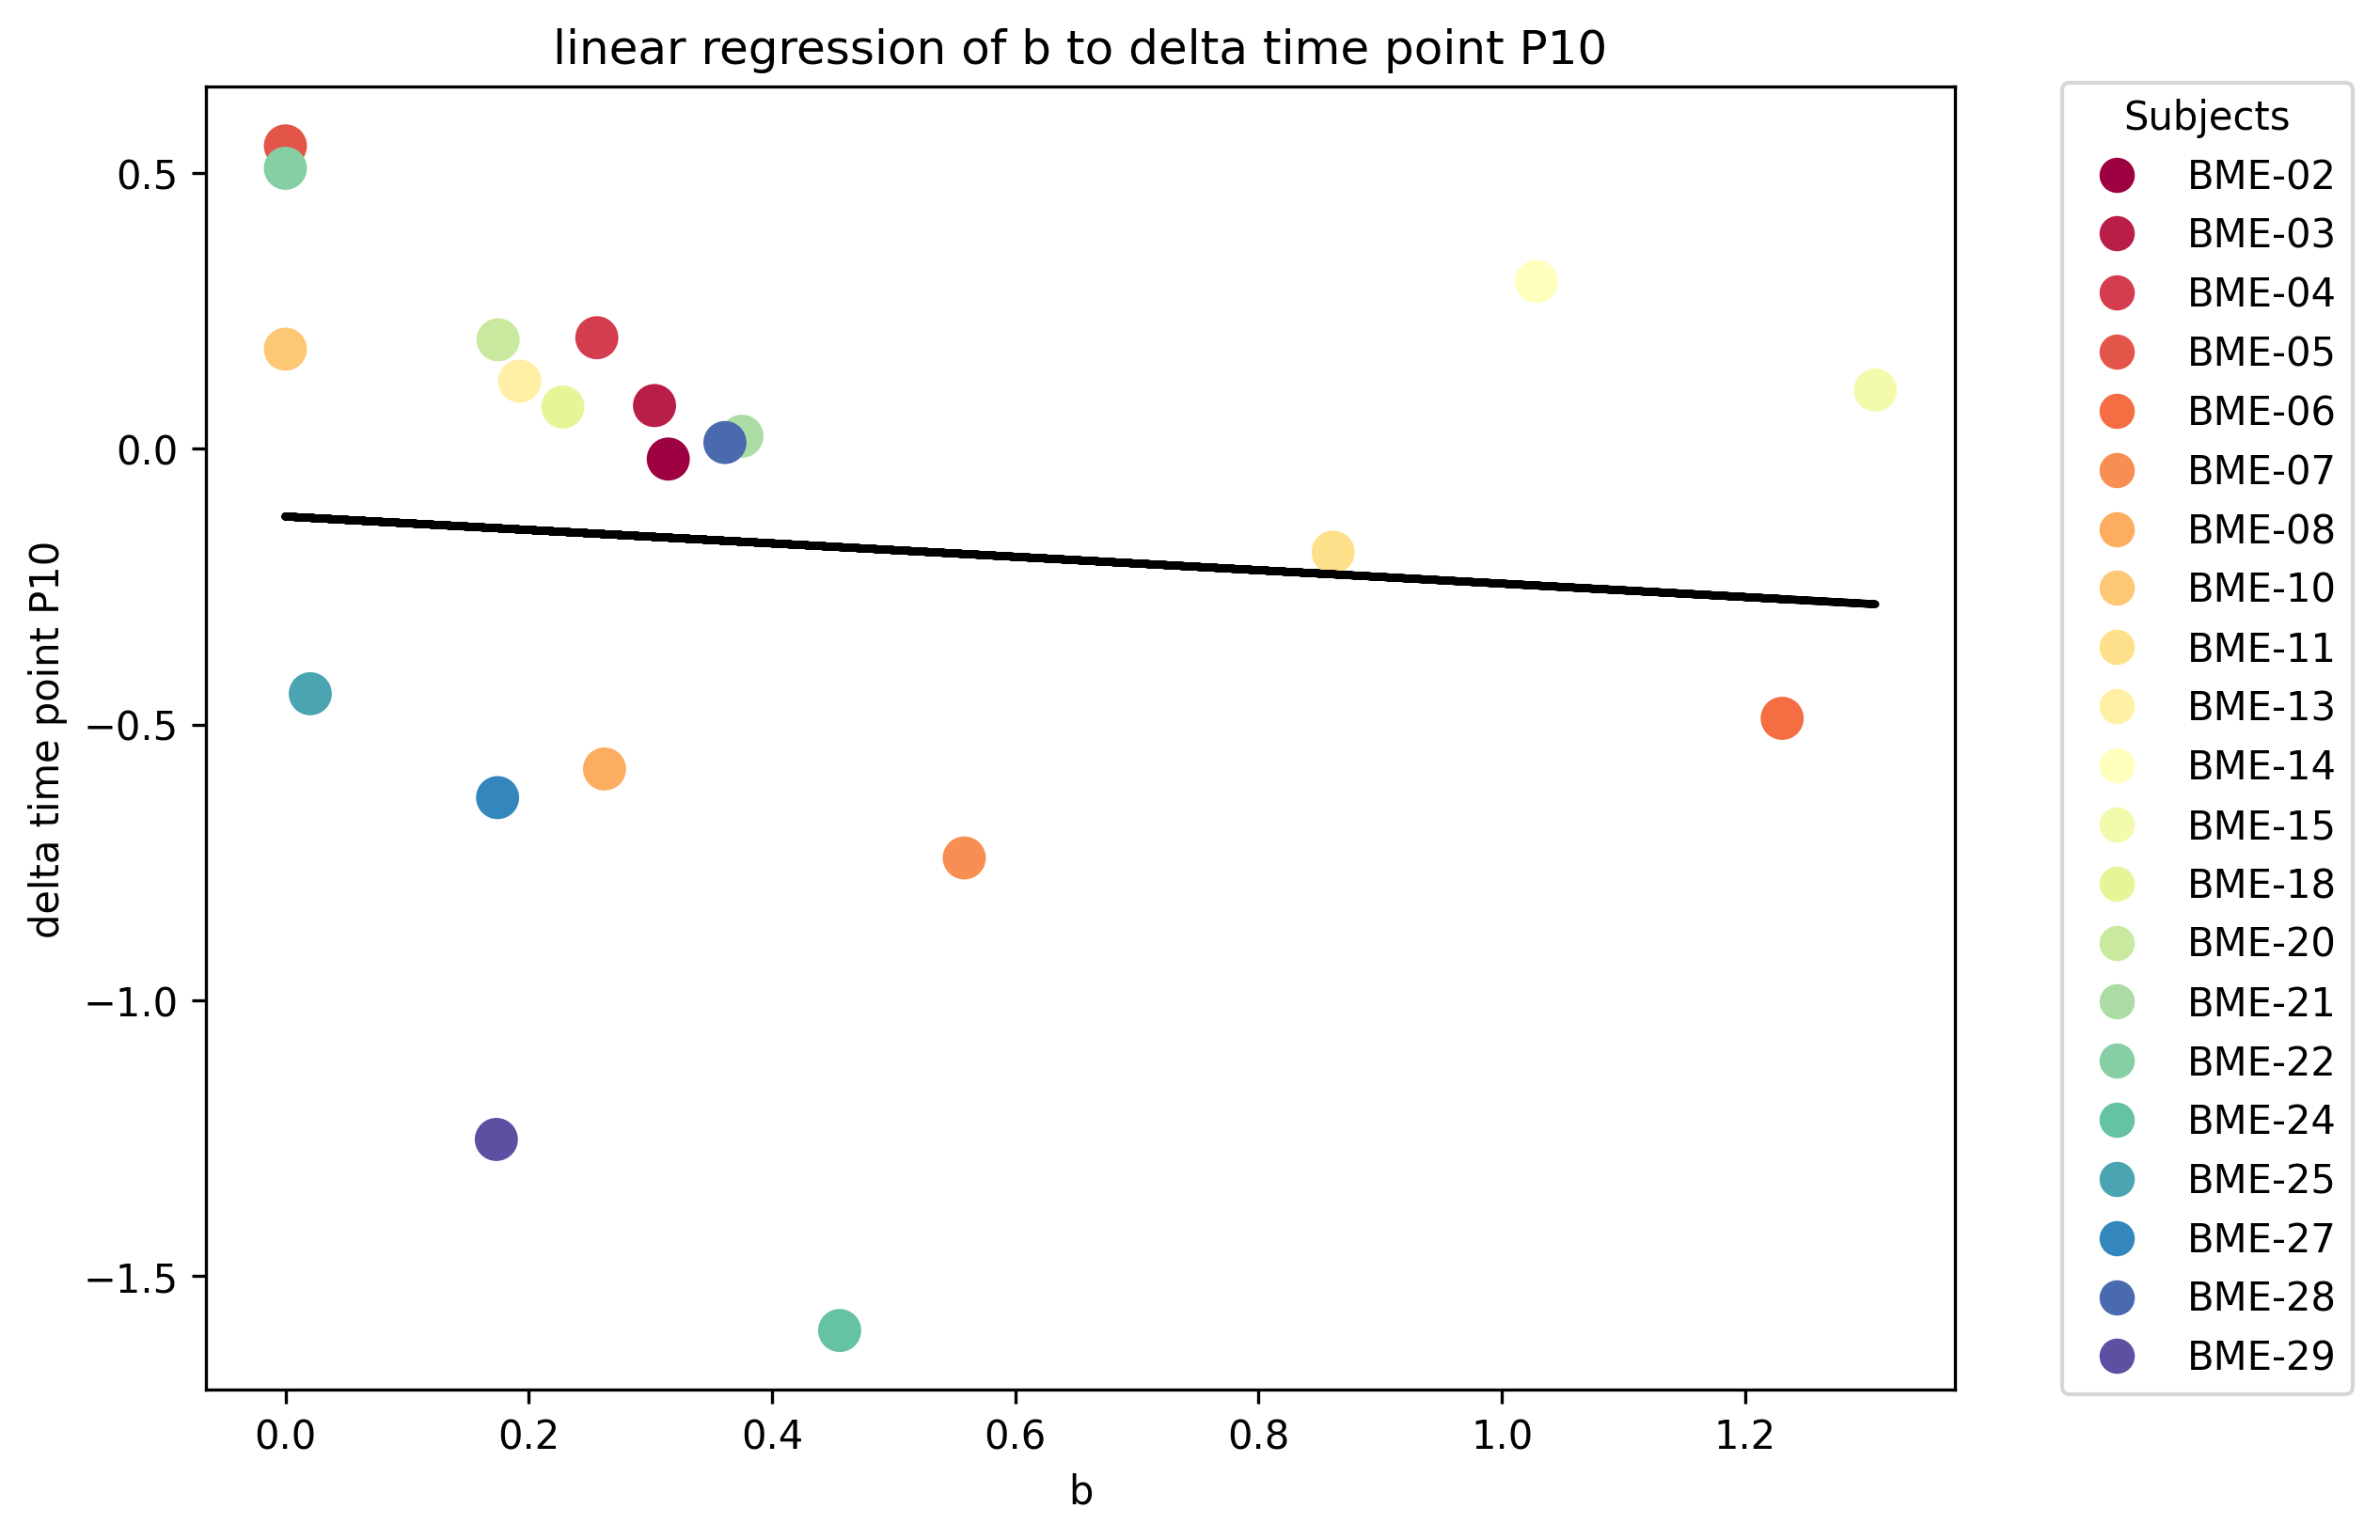

In [ ]:
#plot the linear fit of b with P10
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = b
y = P10
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('b')
plt.ylabel('delta time point P10')
plt.title('linear regression of b to delta time point P10')
plt.show()


R-squared: 0.0005190644827354207
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                  0.009867
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.922
Time:                        03:29:07   Log-Likelihood:                -20.774
No. Observations:                  21   AIC:                             45.55
Df Residuals:                      19   BIC:                             47.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.20

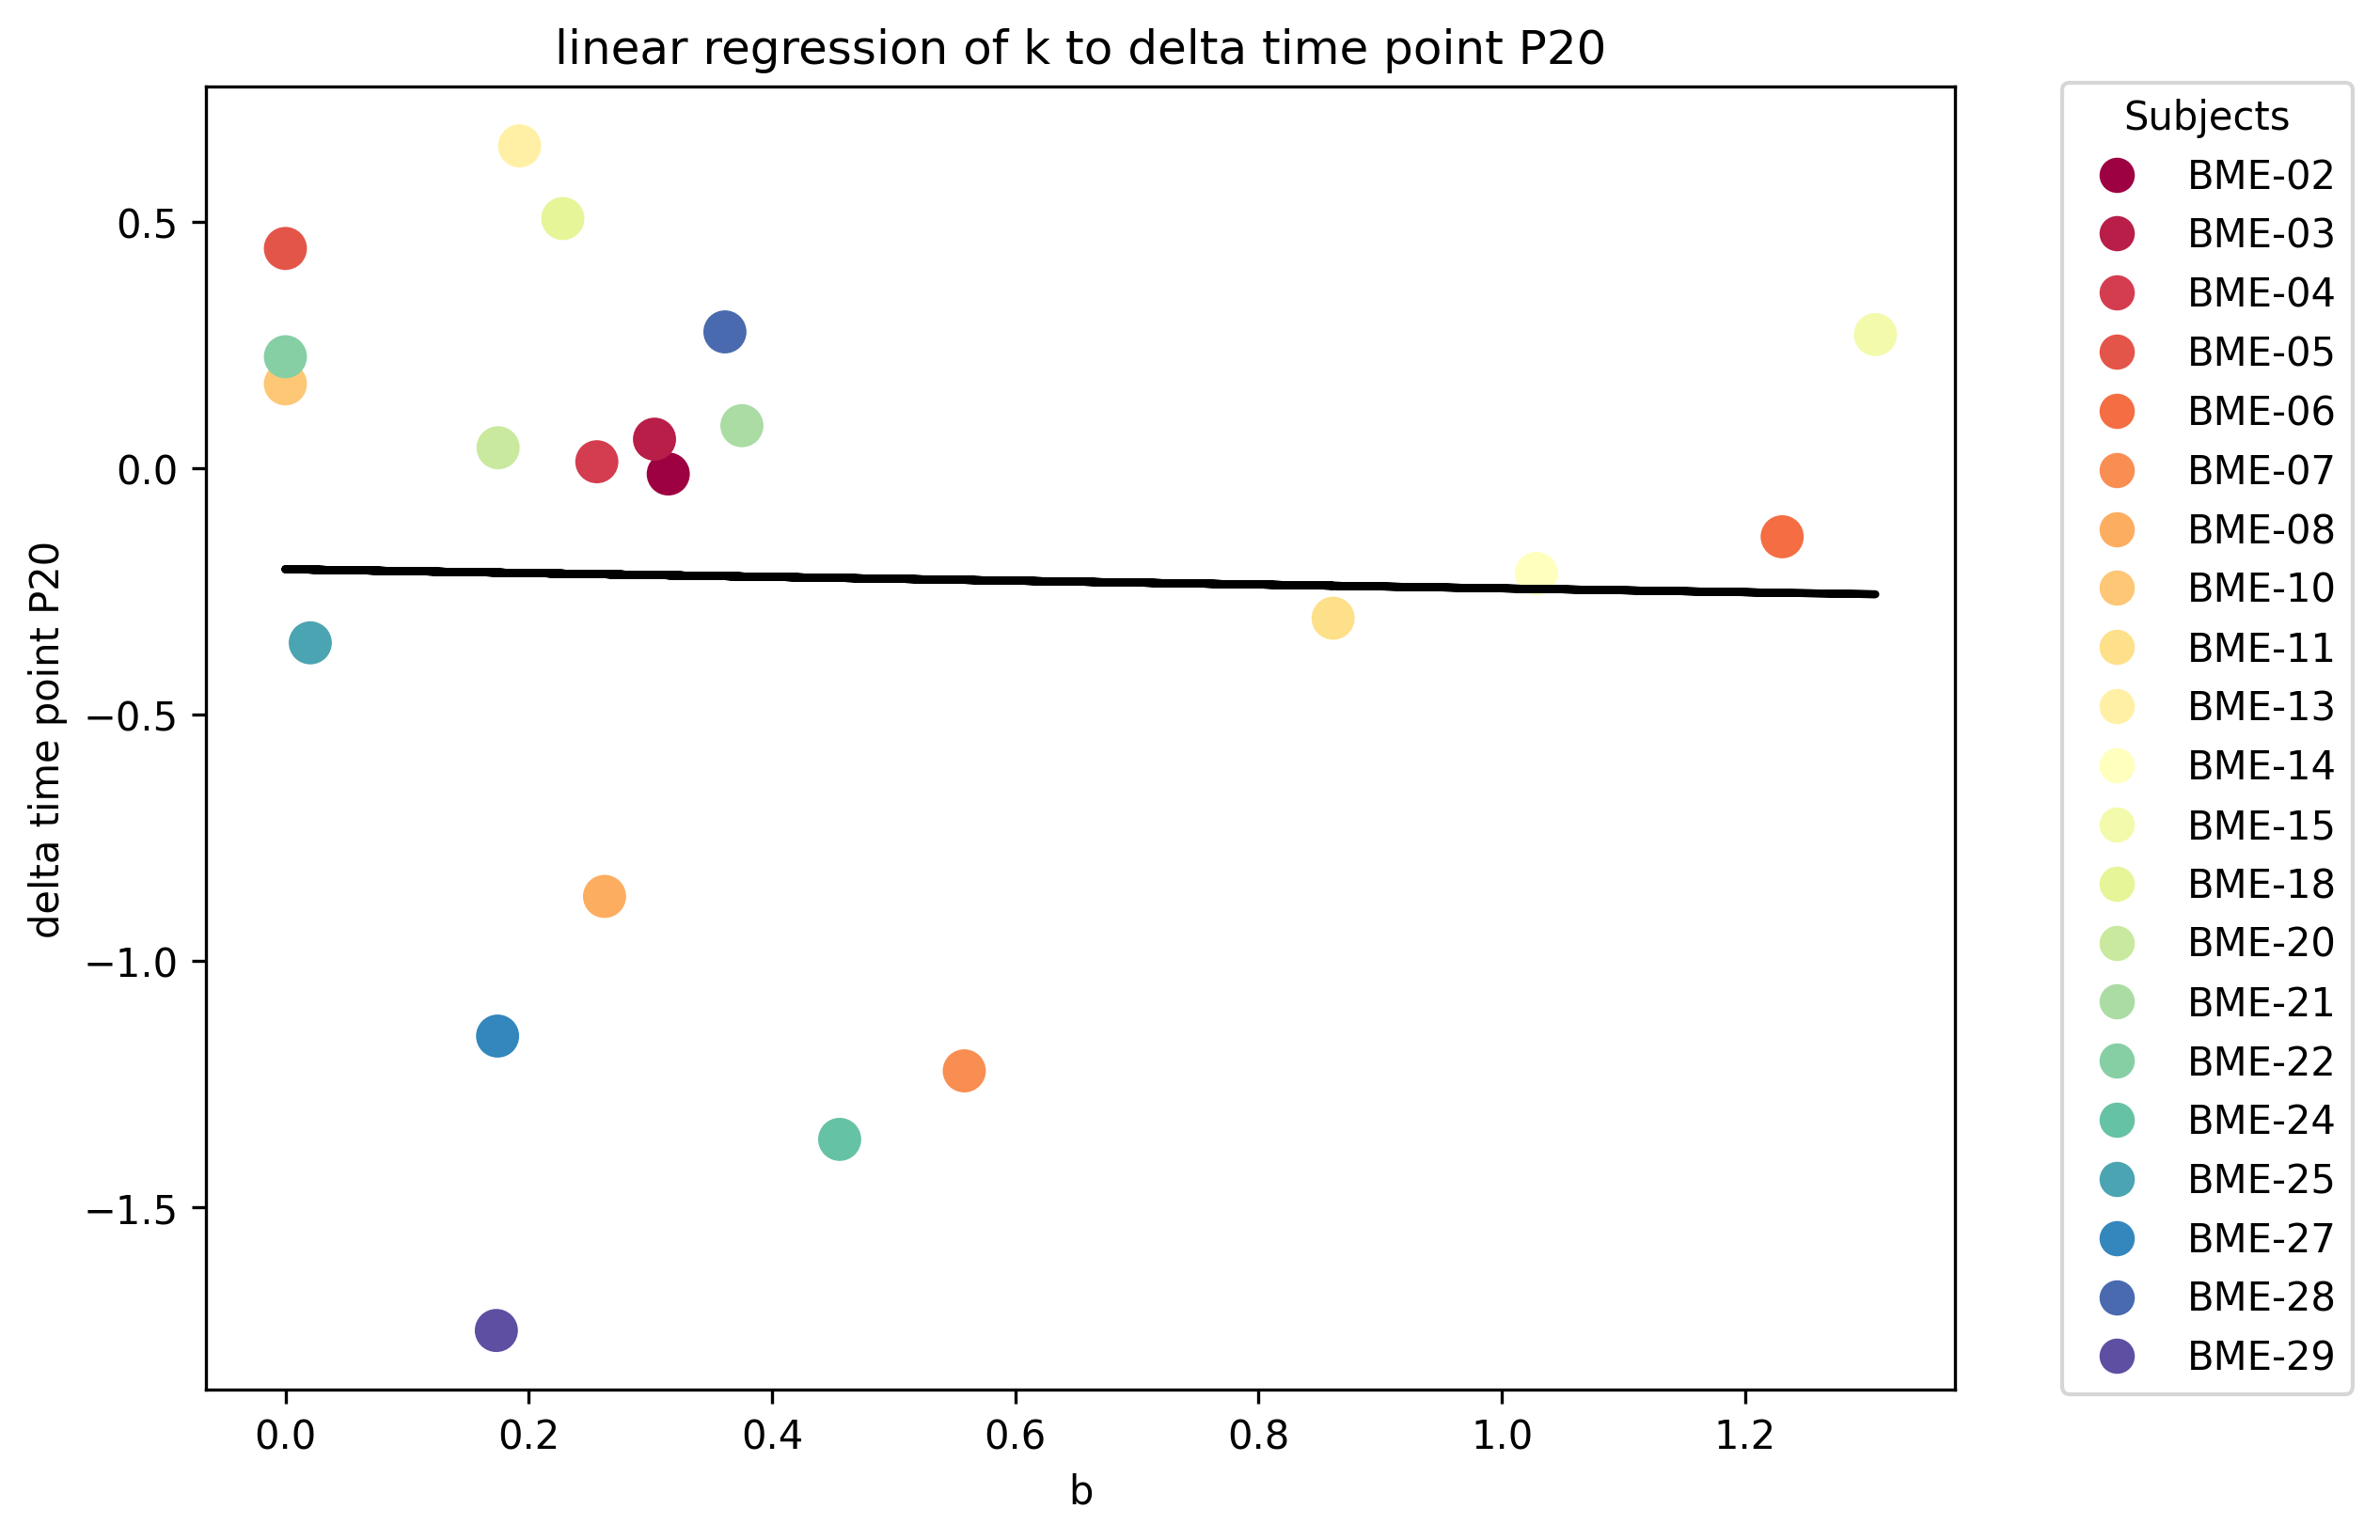

In [ ]:
#plot the linear fit of b with P20
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = b
y = P20
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('b')
plt.ylabel('delta time point P20')
plt.title('linear regression of k to delta time point P20')
plt.show()

R-squared: 0.0018328677444718888
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.03489
Date:                Sat, 14 Dec 2024   Prob (F-statistic):              0.854
Time:                        03:29:08   Log-Likelihood:                -20.394
No. Observations:                  21   AIC:                             44.79
Df Residuals:                      19   BIC:                             46.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.17

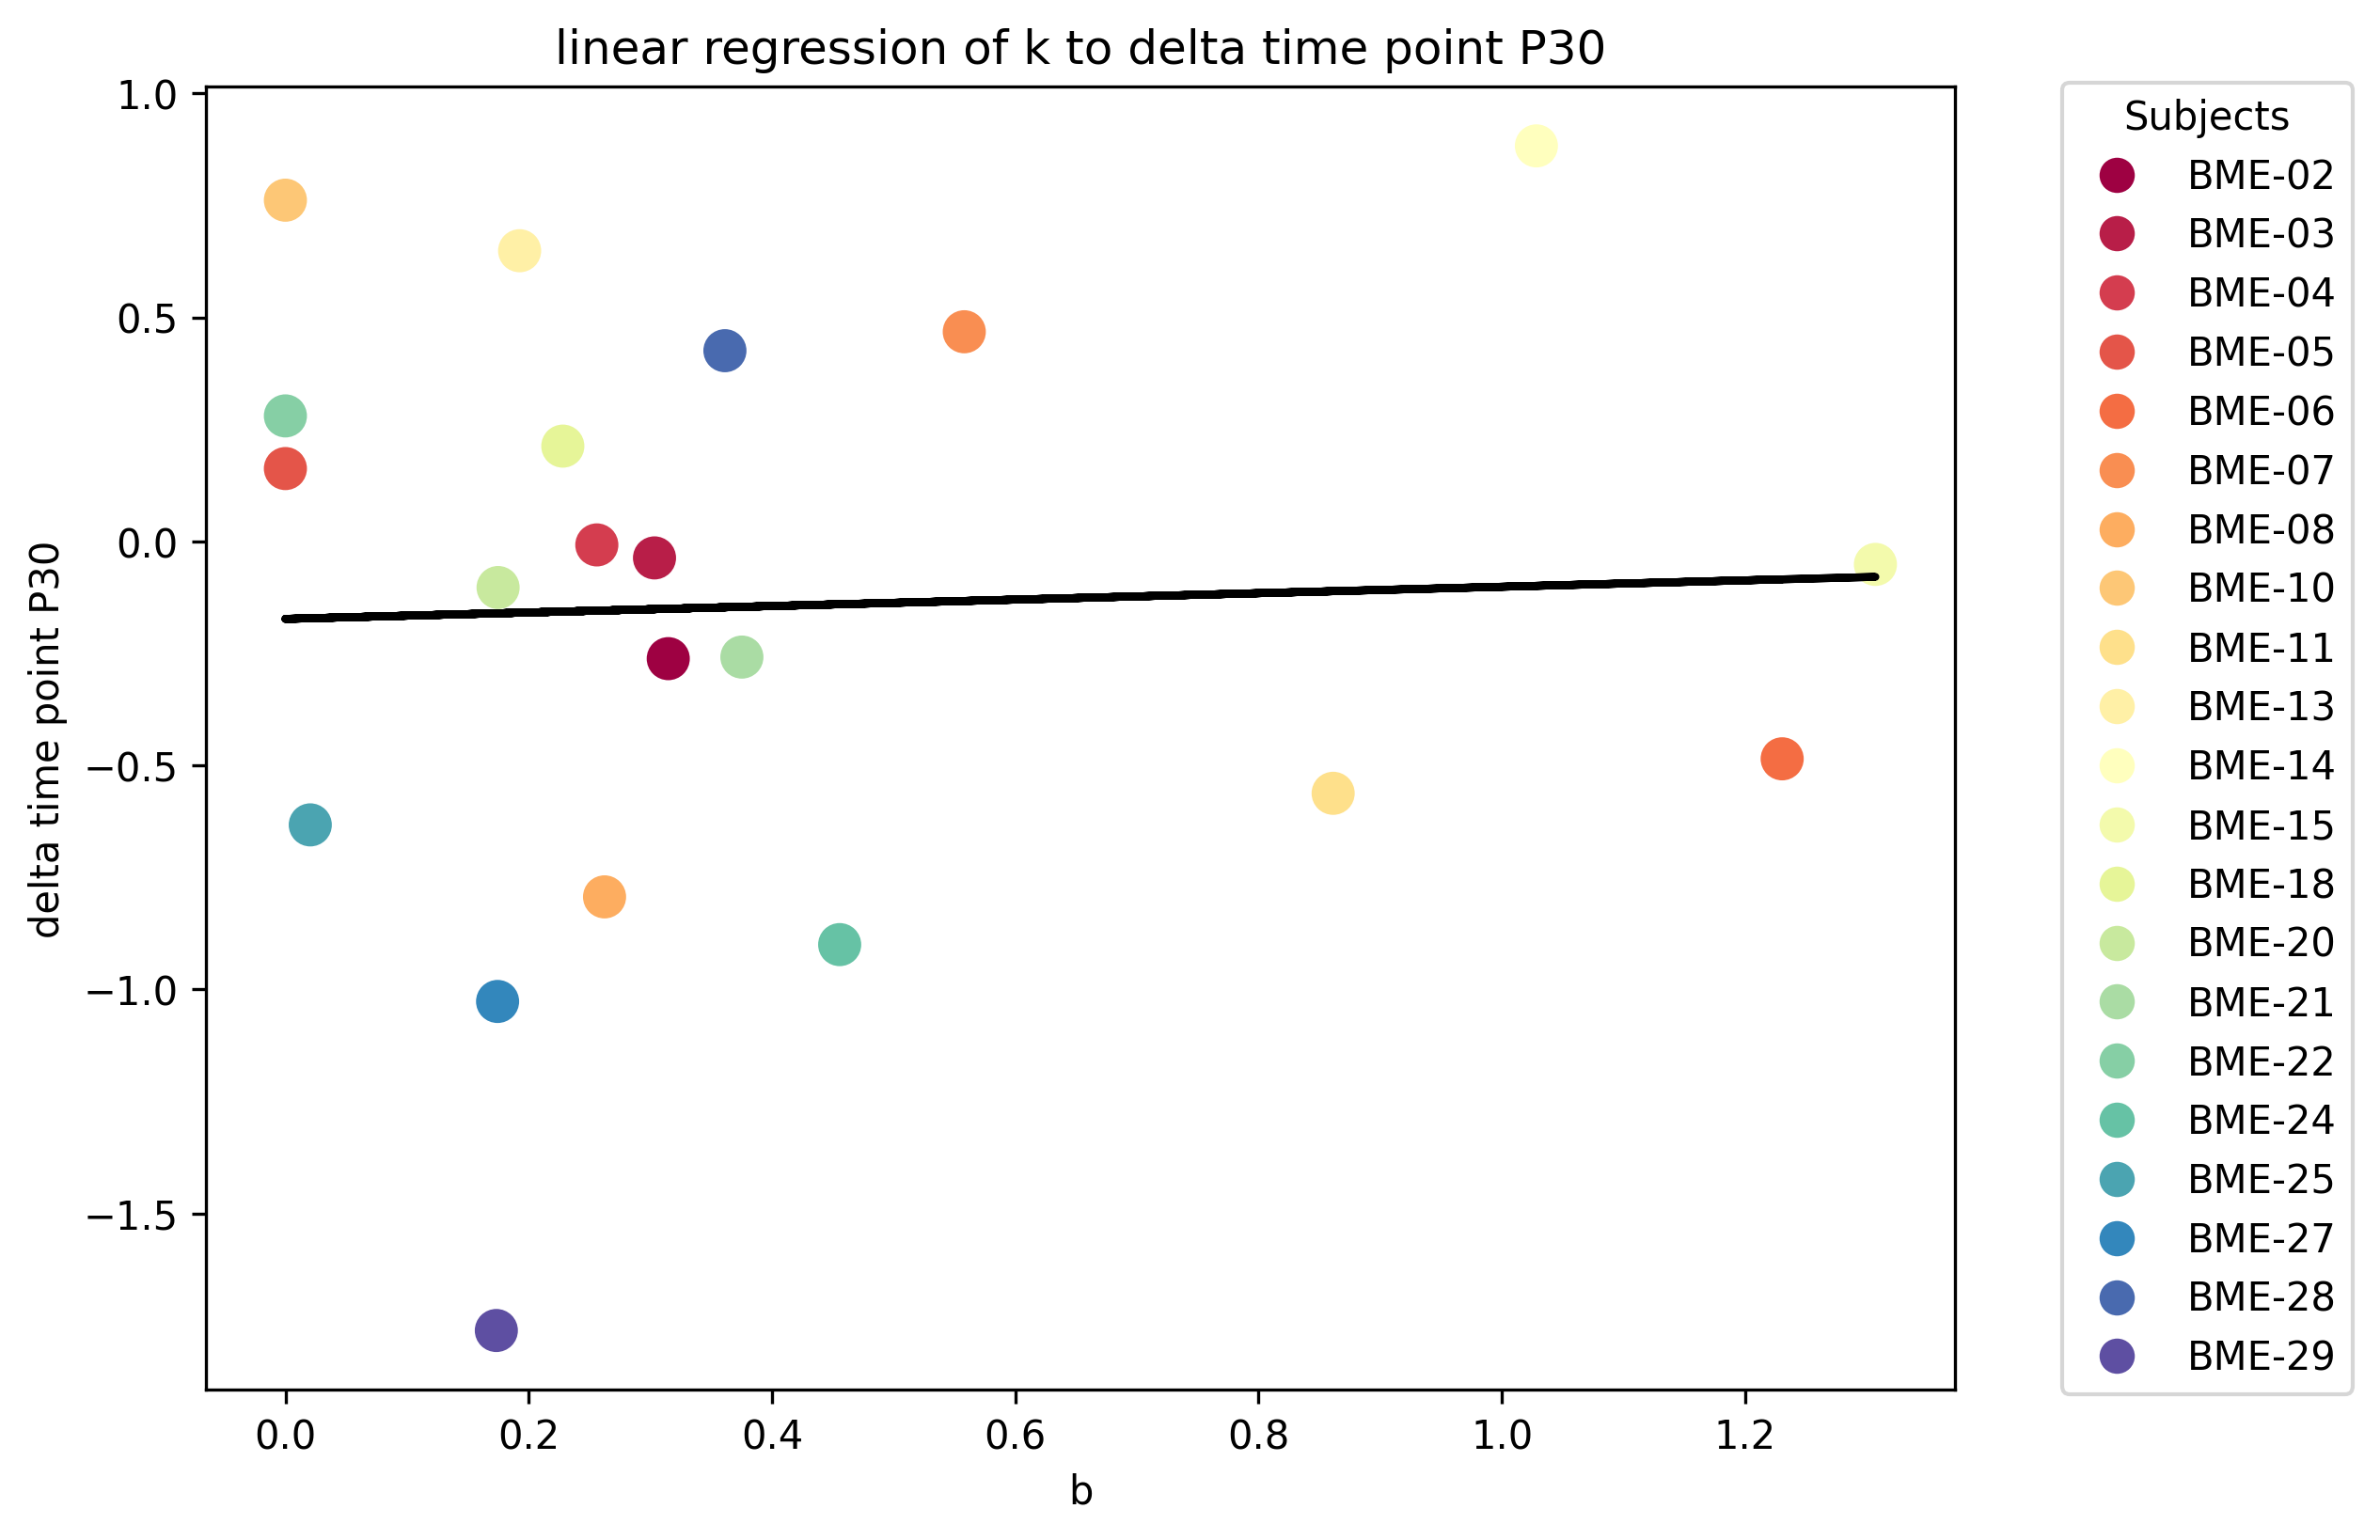

In [ ]:
#plot the linear fit of b with P30
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()

x = b
y = P30
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# Perform Linear Regression

reg = LinearRegression().fit(x, y)
reg.score(x, y)
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
y_predict = reg.predict(x)
r_squared = reg.score(x, y)
print(f'R-squared: {r_squared}')
print(est2.summary())
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x,y_predict,color='black',linewidth=2)

colors = plt.cm.Spectral(np.linspace(0, 1, 21))

scatter = ax.scatter(x, y, c=colors, s=100, label=labels)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=labels[i])
    for i in range(21)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), title="Subjects")
plt.xlabel('b')
plt.ylabel('delta time point P30')
plt.title('linear regression of k to delta time point P30')
plt.show()